# Informe Hito 1

## Grupo 1

Integrantes | Sección:
- Javiera Romero | 1  
- Patricio Espinoza | 2
- Rodrigo Díaz | 1
- Scarlett Plaza | 2
- Vicente Thiele | 2


## Motivación

La industria musical ha estado en ascenso por décadas, últimamente la forma más popular para consumir música es a través de plataformas tales como Spotify, Apple Music, Soundcloud, etc. Siendo el más popular de estas Spotify, es interesante ver cómo el éxito de ciertos géneros/artistas ha cambiado gracias a esta forma de consumo, siendo importantes los algoritmos de recomendación a usuarios, las playlists hechas por la plataforma para destacar artistas de cierto género y el compartir tu música con los demás.

Es impresionante ver cómo las playlists mencionadas anteriormente creadas por Spotify tales como "Viva Latino" "Rock Classics" "K-Pop ON!", etc. Cuentan cada una con más de cinco millones de likes otorgados por usuarios que disfrutan de dichos específicos géneros, esta forma de categorización de la música es incluso tan importante para la plataforma que en el menú de exploración principal es el filtro recomendado para buscar tu música preferida, sugiriéndolo por sobre una búsqueda por artista o década.

Creemos que, dado esto y la gran cantidad de datos disponibles de la plataforma, es posible estudiar una conexión entre características cuantificables de las canciones y el género al que estas pertenecerán.


## Análisis exploratorio

Antes de comenzar, es importante mencionar que en el dataset cada género presente en este aparece 1000 veces, por lo tanto, no hay un género predilecto que pueda crear sesgos en la exploración de datos.

### Género de las canciones más populares

Cada canción en el dataset posee un porcentaje de popularidad como atributo (siendo 100 la más popular). Este es calculado por un algoritmo basado en su mayoría en el número total de reproducciones y cuán recientes estas son.

En el gráfico "género de las 300 canciones más populares" (ver en código análisis exploratorio) se muestra la cantidad de apariciones de los géneros musicales en las 300 canciones con la popularidad más alta. De aquí se elegirían los géneros musicales a estudiar, ya que nos muestra los más relevantes y exitosos en términos de popularidad en la actual industria musical. Debido a que son los más escuchados, nos gustaría poder clasificar canciones de estos géneros para poder recomendar las canciones de dichas características adecuadamente a los usuarios.

Se contempló la idea de elegir géneros basados en el promedio de popularidad de estos tomando en cuenta todas las canciones del dataset, pero se concluyó que no es la información que buscamos, pues al ser un promedio, puede haber géneros con unas pocas canciones con popularidad muy alta que eleven el resultado por el hecho de promediar. Además, como podemos ver, hay géneros que apelan a grupos muy específicos de gente con la que siempre les va bien, por lo que el promedio de popularidad se dispara a pesar de no ser un género popular con las masas. Un ejemplo de esto es el sertanejo, que es el noveno en el gráfico, pero no es conocido.

### Matrices de correlación por género

Las matrices de correlación por géneros musicales (ver en la parte de código análisis exploratorio) se hacen con el objetivo de ver diferencias en las características musicales que nos puedan ayudar a diferenciar a través de métricas un género del otro.

Con esto nos damos cuenta de que entre los 30 géneros más populares hay unos que se comportan de manera similar a otros y algunos que son todo lo contrario. Por ejemplo, alt-rock se comporta de manera similar al género rock. Es por esto que decidimos no elegir a los géneros a trabajar de acuerdo a nuestro criterio, sino más bien crear un modelo que los agrupe según lo parecido que son, para no tener sesgos en el proyecto.

### Cantidad de canciones explicitas y no explicitas por género

Al analizar el gráfico de canciones explícitas/no explícitas por género musical es posible observar que existen géneros sin canciones con palabras explícitas, así como también al comparar entre canciones explícitas y no explícitas para un mismo género es común que existan más canciones no explícitas; sin embargo, hay excepciones (en particular las que alcanzan 'no explícitas' mayores a 5 para log en base e) en donde la cantidad de canciones explícitas es similar a las no explícitas (emo, j-dance, sad), en donde incluso se tiene que para el género comedy hay más canciones explícitas que no explícitas.

Esto indica que la característica 'explicit' puede ser un fuerte criterio para identificar estos géneros al momento de querer realizar el modelo.

### Duración promedio por género

Al analizar el gráfico, es posible observar que los géneros chicago-house, minimal-techno y detroit-techno son los que poseen una mayor duración (sobre los 5 minutos), mientras que grindcore, children y study son los de menor duración (bajo los 2 minutos). Además, la mayoría de los géneros se encuentran en el rango de los 3 a los 4 minutos de duración.

A partir de estas observaciones, se puede analizar que para canciones con una duración entre 3 y 4 minutos será más difícil clasificar a qué género pertenecen basándose en este criterio. Sin embargo, resultará más útil para las canciones cuyos géneros correspondan a una duración promedio muy corta o muy larga.

### Análisis mediante funcionalidad describe()

Dentro de las medidas que nos interesa analizar, se encuentran el mínimo y máximo para conocer el rango de valores, además del promedio y la concentración de datos mediante los percentiles.

Este análisis estará centrado en las características musicales 'popularity' y 'loudness' que no se han estudiado antes mediante las matrices de correlación.

Para el caso de 'popularity', el promedio de los datos es 33 de 100, siendo una medida relativamente baja, y al observar los percentiles comprobamos esto, pues la popularidad es menor o igual a 17, 35 y 50 para los percentiles p25, p50 y p75, respectivamente. Esto nos indica que hay una gran concentración de datos con popularidad baja y que, por ende, el criterio de 'popularity' podría no ser un buen indicador para clasificar correctamente los géneros.

Para 'loudness', el rango va desde -49.53 hasta 4.53, y a través de los percentiles se observa que hay una mejor distribución para este parámetro. Por ejemplo, un 25% de los datos varían entre un rango alto como lo es desde -49.53 hasta -10.01. Mientras que los otros cuartiles toman rangos menores con diferencias de 3, 2 y 9 en la escala de 'loudness'. Con esto y junto con la medida de la desviación estándar (5.029), observamos que los valores varían considerablemente para este criterio, y que por ello, podría resultar útil para la clasificación de géneros.

## Preguntas y problemas

(1) ¿Es posible predecir el género al que pertenece una canción de acuerdo a las variables musicales tales como el tempo, la valencia musical, cantidad de beats, entre otros?

Utilidad: Es de utilidad para que dadas las características musicales provenientes de la canción de una persona, esta sea capaz de identificar cómo será generalmente clasificada su canción con respecto a otras similares.

(2) ¿Existen géneros que, pese a ser distintos, sus canciones tienen atributos similares? ¿Y viceversa?

Utilidad: Gracias a esto se podrán agrupar los 114 géneros del dataset en clusters para así obtener los grupos de géneros más importantes del dataset, es decir, aquellos que aportan una característica diferente notoria a una canción.

(3) ¿Los géneros con más canciones explícitas comparten características entre ellos?

Utilidad: Permitirá saber si es un criterio de utilidad para identificar géneros con esta característica en común, y en dicho caso indagar en otros atributos musicales que permitan construir modelos, como por ejemplo los árboles de decisión.

## Código análisis exploratorio

### Código

In [ ]:
%%capture
!pip install datasets

#### Paquetes

In [ ]:
# Dataset
from datasets import load_dataset
# pandas
import pandas as pd
# numpy
import numpy as np
# graficos
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px

#### Cargar dataset

In [ ]:
# load dataset from url
%%capture
dataset = load_dataset("maharshipandya/spotify-tracks-dataset")
df = pd.DataFrame(dataset['train'])

In [ ]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

### Cantidad de canciones por género

In [ ]:
# cantidad de géneros del dataset
genre_most_repeat = df['track_genre'].value_counts(dropna=False).reset_index()
genre_most_repeat.columns = ['genre', 'count']
genre_most_repeat

genre  count
0             acoustic   1000
1            punk-rock   1000
2    progressive-house   1000
3            power-pop   1000
4                  pop   1000
..                 ...    ...
109               folk   1000
110                emo   1000
111         electronic   1000
112            electro   1000
113        world-music   1000

[114 rows x 2 columns]

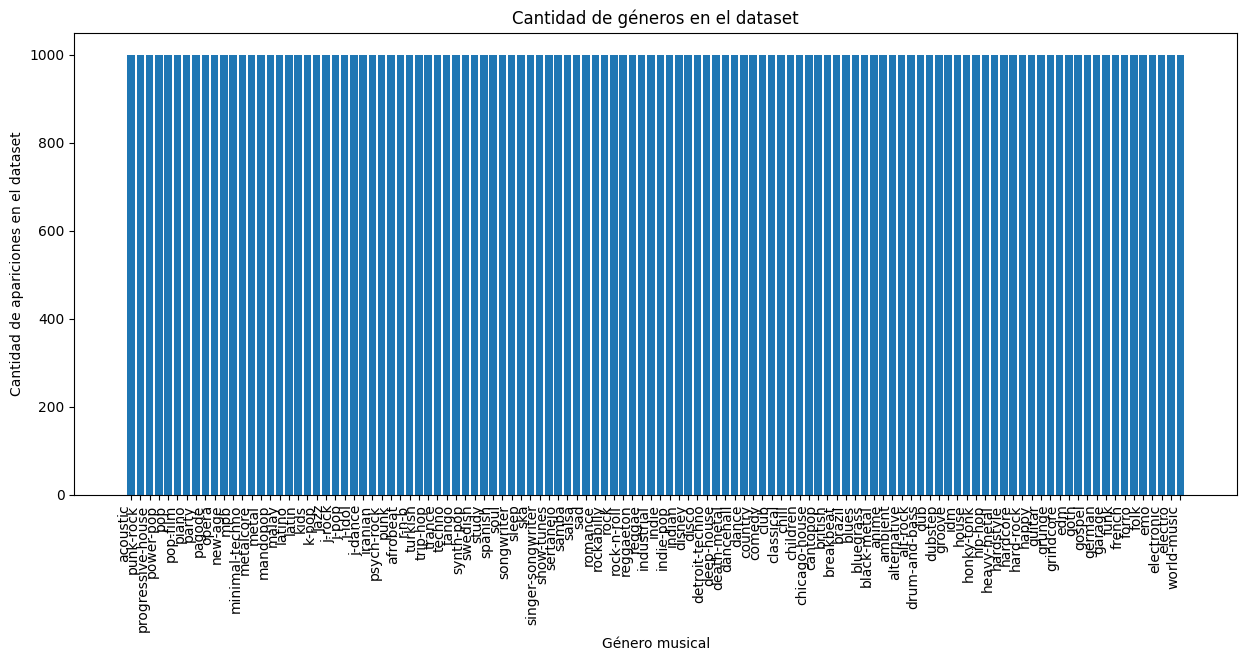

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(genre_most_repeat['genre'], genre_most_repeat['count'])

# Establecer etiquetas de los ejes
plt.xlabel('Género musical')
plt.ylabel('Cantidad de apariciones en el dataset')

# Establecer título
plt.title('Cantidad de géneros en el dataset')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.show()

### Género de las canciones más populares

#### Géneros de las 300 canciones más populares del dataset

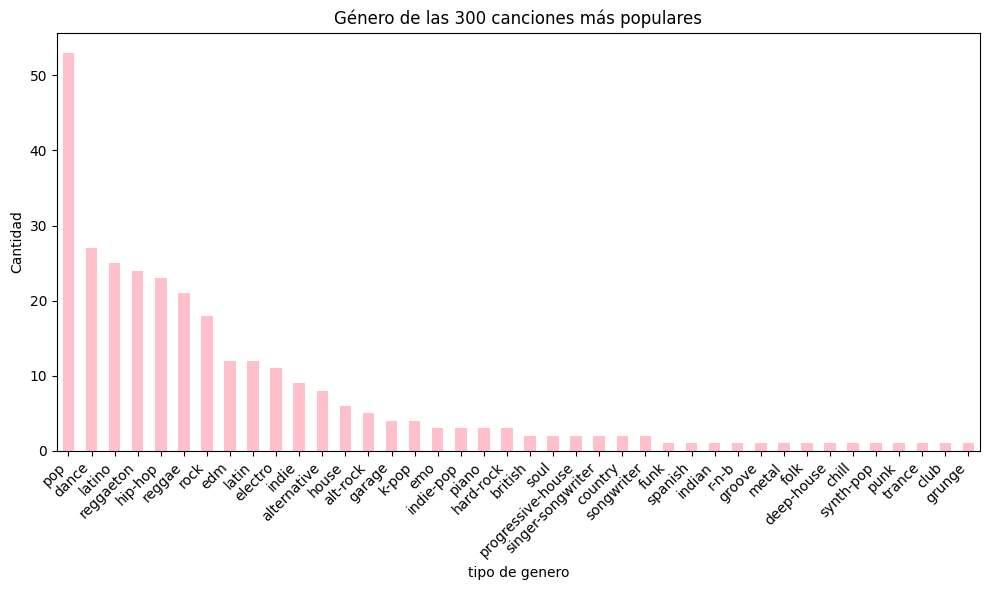

In [ ]:
#tomar los 300 mas populares
top_100 = df.nlargest(300, 'popularity')
#grafico de los generos de los 300 mas populares
genre_counts = top_100['track_genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color= 'pink')
plt.xlabel('tipo de genero')
plt.ylabel('Cantidad')
plt.title('Género de las 300 canciones más populares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Promedio de popularidad por género

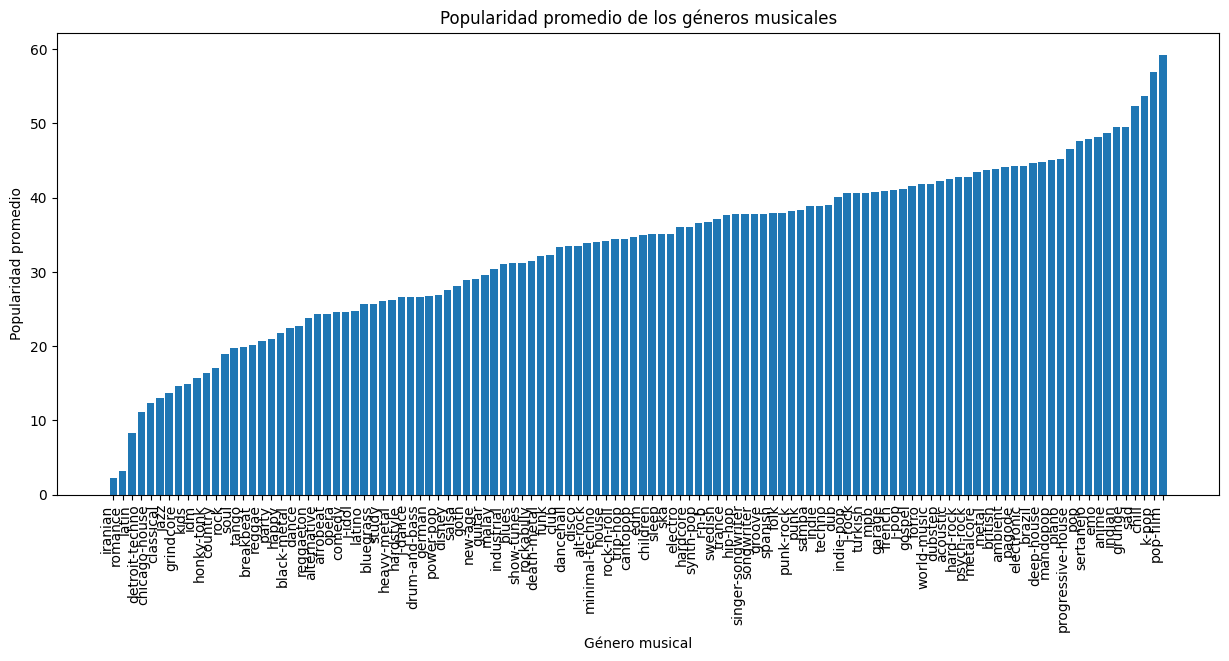

In [ ]:
# Promedio de la popularidad por género musical
popularity_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
popularity_genre = popularity_genre.sort_values(by='popularity')

# Crear un gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(popularity_genre['track_genre'], popularity_genre['popularity'])

# Establecer etiquetas de los ejes
plt.xlabel('Género musical')
plt.ylabel('Popularidad promedio')

# Establecer título
plt.title('Popularidad promedio de los géneros musicales')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.show()

### Matrices de correlación por género


#### Matriz de correlacion para género pop

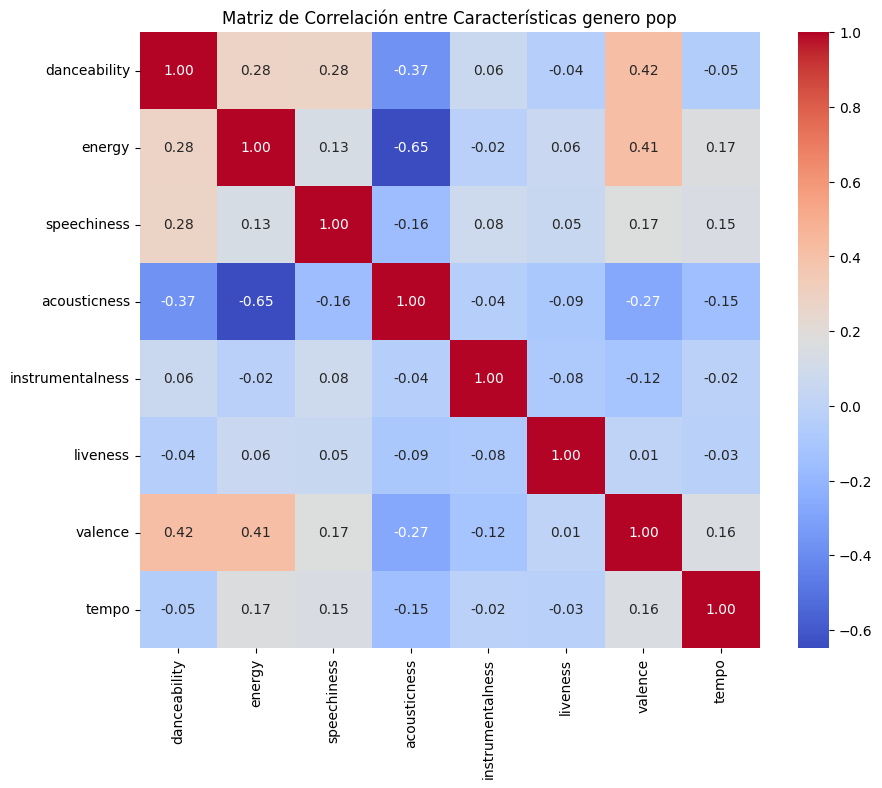

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, pop)
pop_df = df[df['track_genre'] == 'pop']

# Calcular la matriz de correlación para el género "pop"
correlation_matrix = pop_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero pop')
plt.show()

#### Matriz de correlacion para género dance

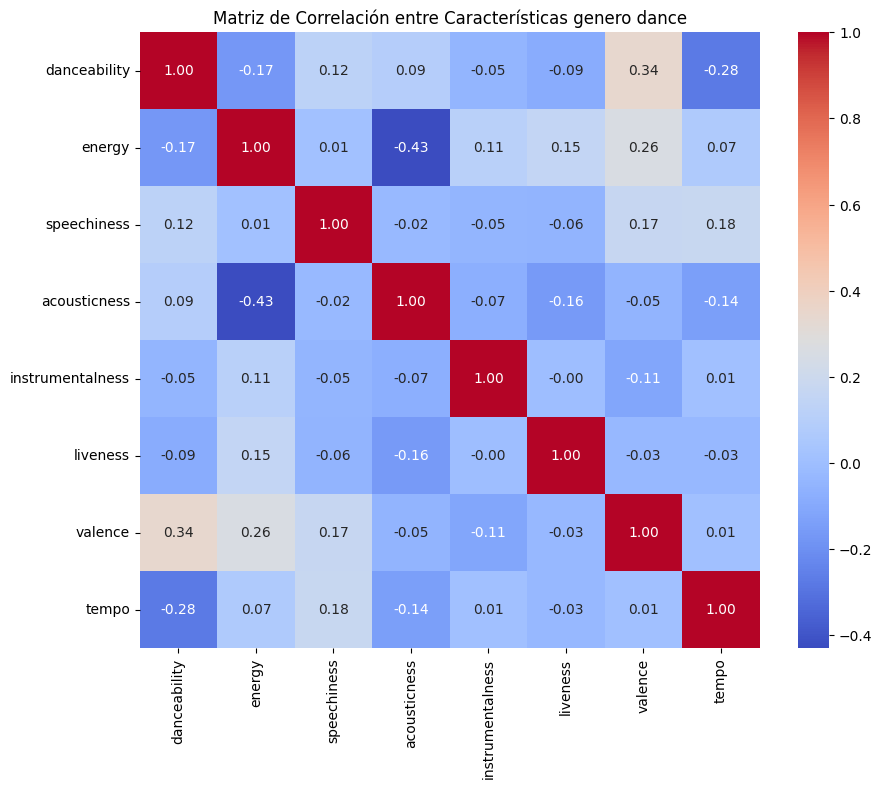

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, dance)
dance_df = df[df['track_genre'] == 'dance']

# Calcular la matriz de correlación para el género "dance"
correlation_matrix = dance_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero dance')
plt.show()

#### Matriz de correlación de género latino

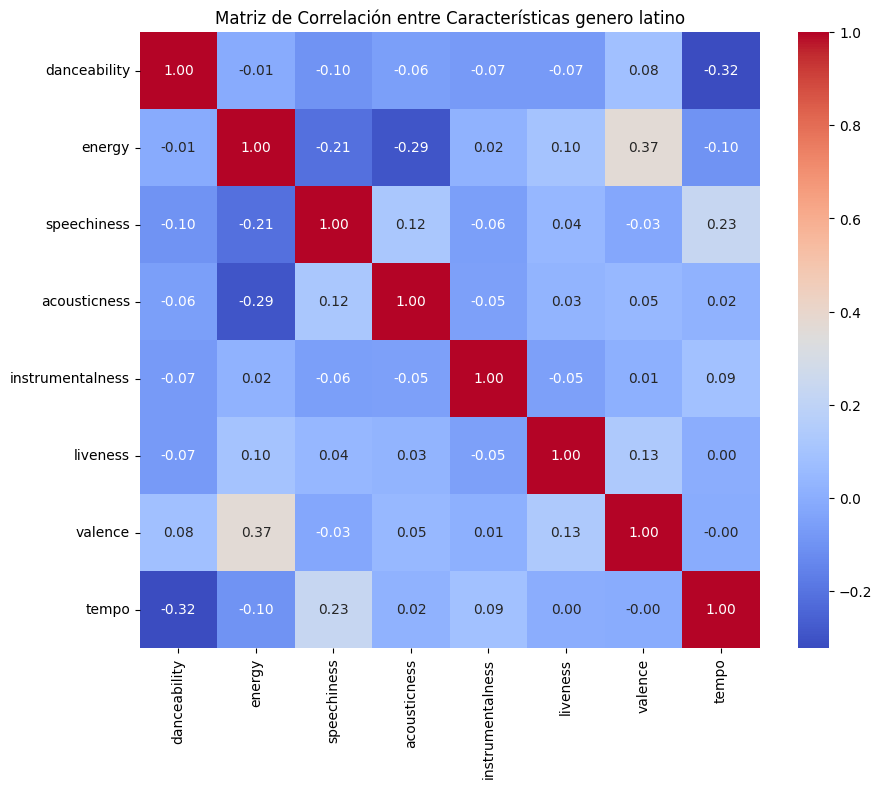

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, latino)
latino_df = df[df['track_genre'] == 'latino']

# Calcular la matriz de correlación para el género "latino"
correlation_matrix = latino_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero latino')
plt.show()

#### Matriz de correlación de género reggaeton

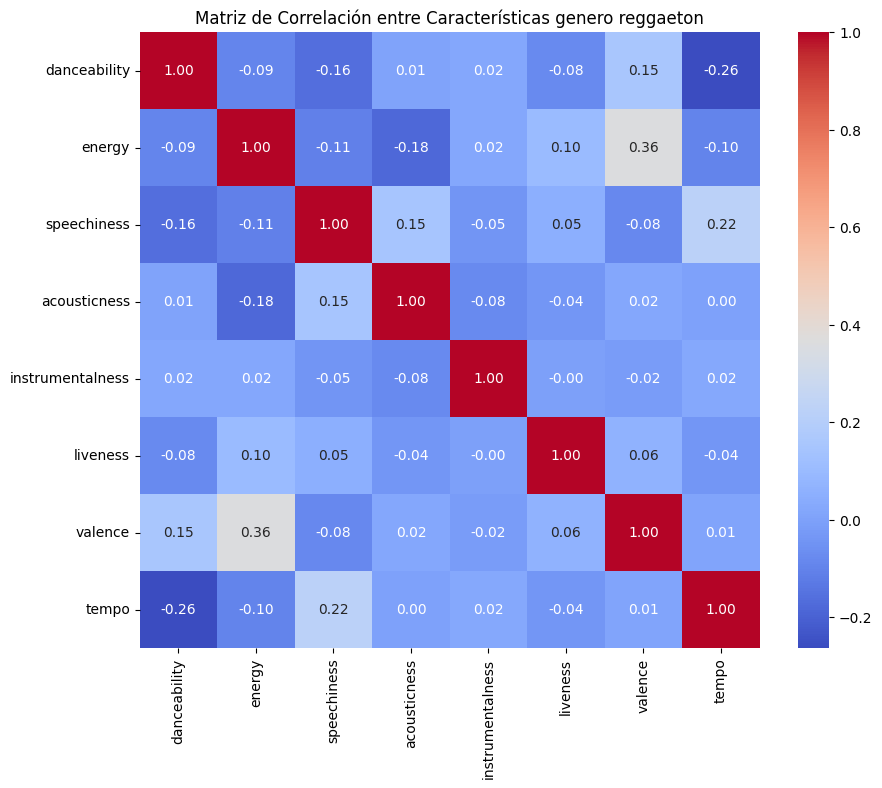

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, reggaeton)
reggaeton_df = df[df['track_genre'] == 'reggaeton']

# Calcular la matriz de correlación para el género "reggaeton"
correlation_matrix = reggaeton_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero reggaeton')
plt.show()

#### Matriz de correlacion de género hip-hop

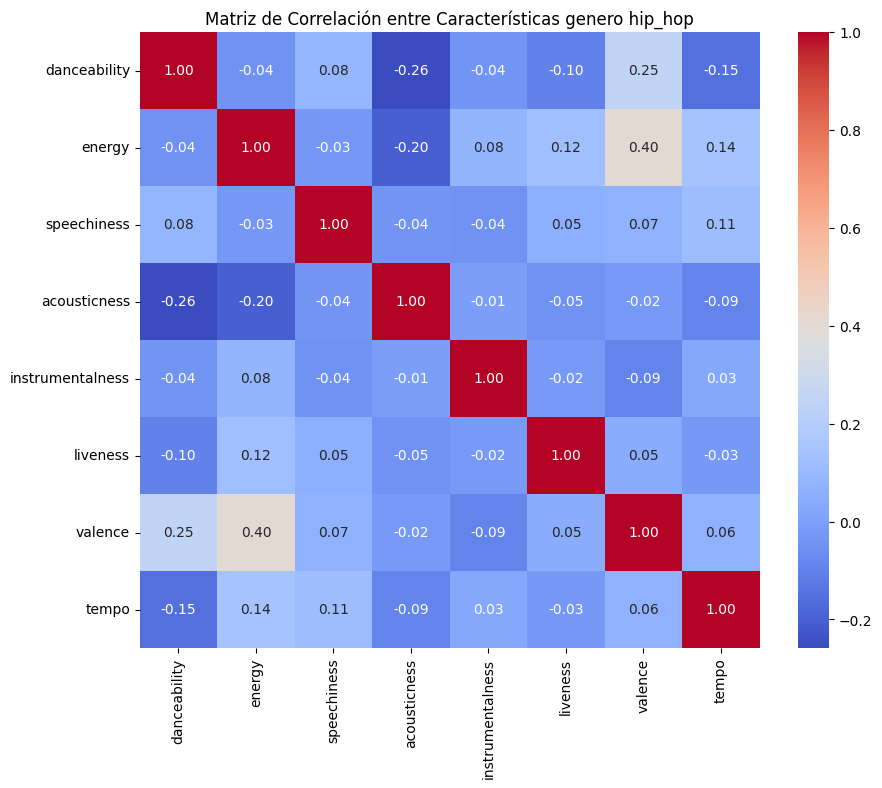

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, hip-hop)
hip_hop_df = df[df['track_genre'] == 'hip-hop']

# Calcular la matriz de correlación para el género "hip-hop"
correlation_matrix = hip_hop_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero hip_hop')
plt.show()

#### Matriz de correlacion de género reggae

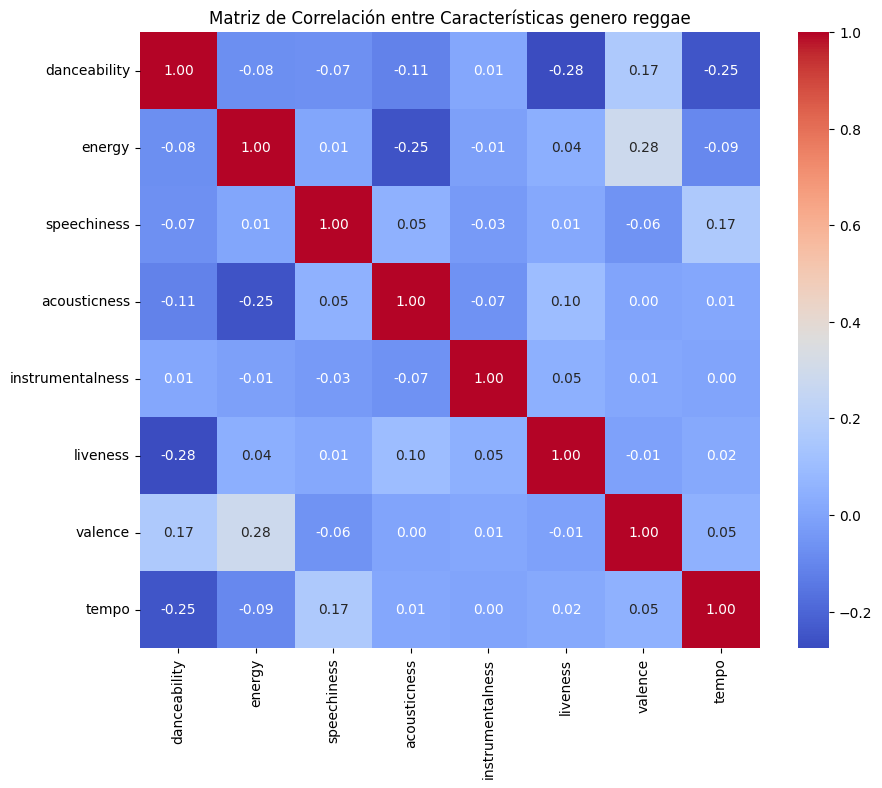

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, reggae)
reggae_df = df[df['track_genre'] == 'reggae']

# Calcular la matriz de correlación para el género "reggae"
correlation_matrix = reggae_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero reggae')
plt.show()

#### Matriz de correlacion de género rock

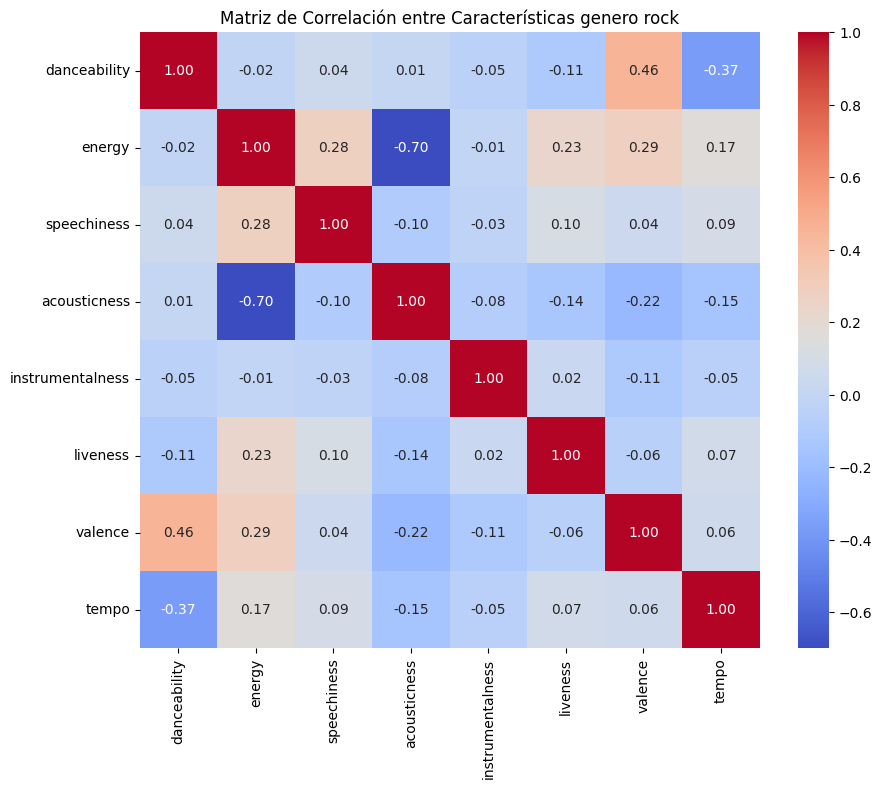

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, rock)
rock_df = df[df['track_genre'] == 'rock']

# Calcular la matriz de correlación para el género "rock"
correlation_matrix = rock_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero rock')
plt.show()

#### Matriz de correlacion de género edm

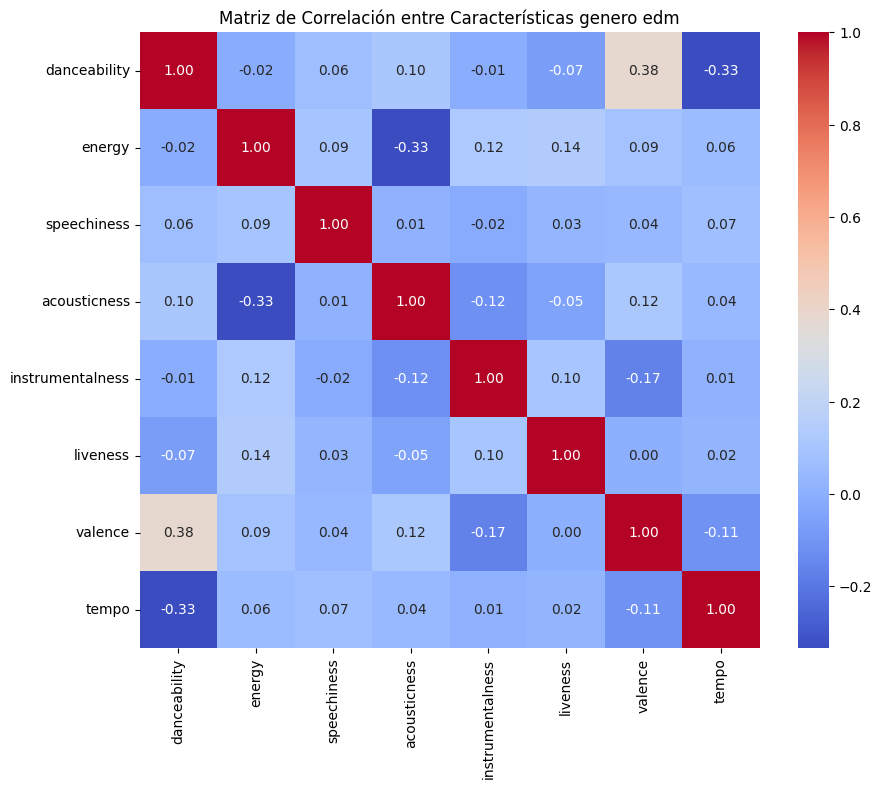

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, edm)
edm_df = df[df['track_genre'] == 'edm']

# Calcular la matriz de correlación para el género "edm"
correlation_matrix = edm_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero edm')
plt.show()

#### Matriz de correlación de género latin

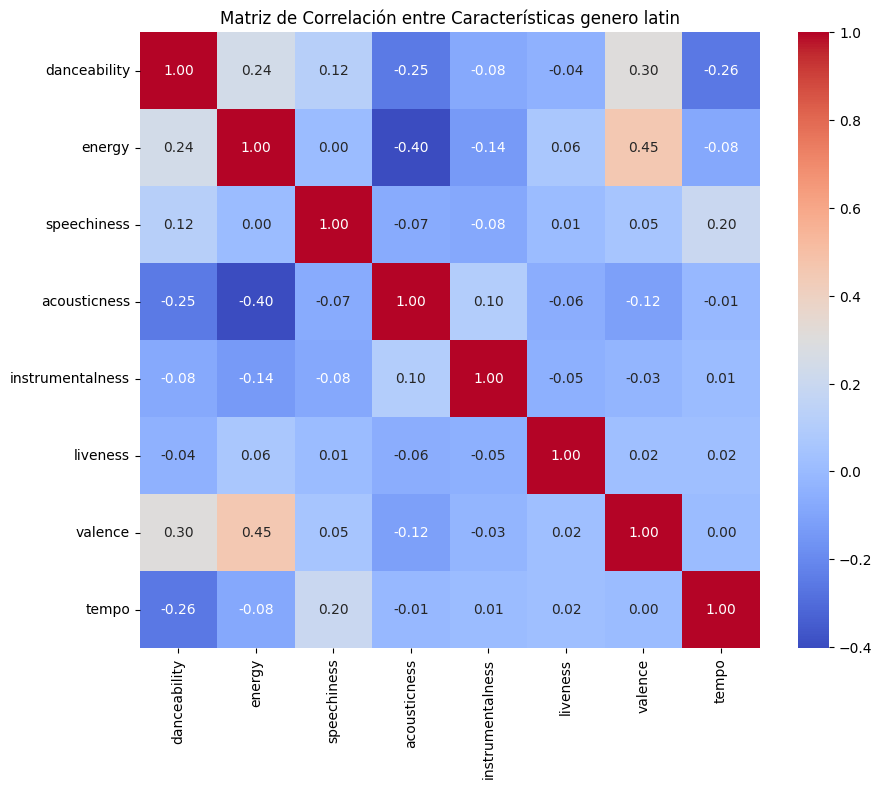

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, latin)
latin_df = df[df['track_genre'] == 'latin']

# Calcular la matriz de correlación para el género "latin"
correlation_matrix = latin_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero latin')
plt.show()

#### Matriz de correlacion de género electro

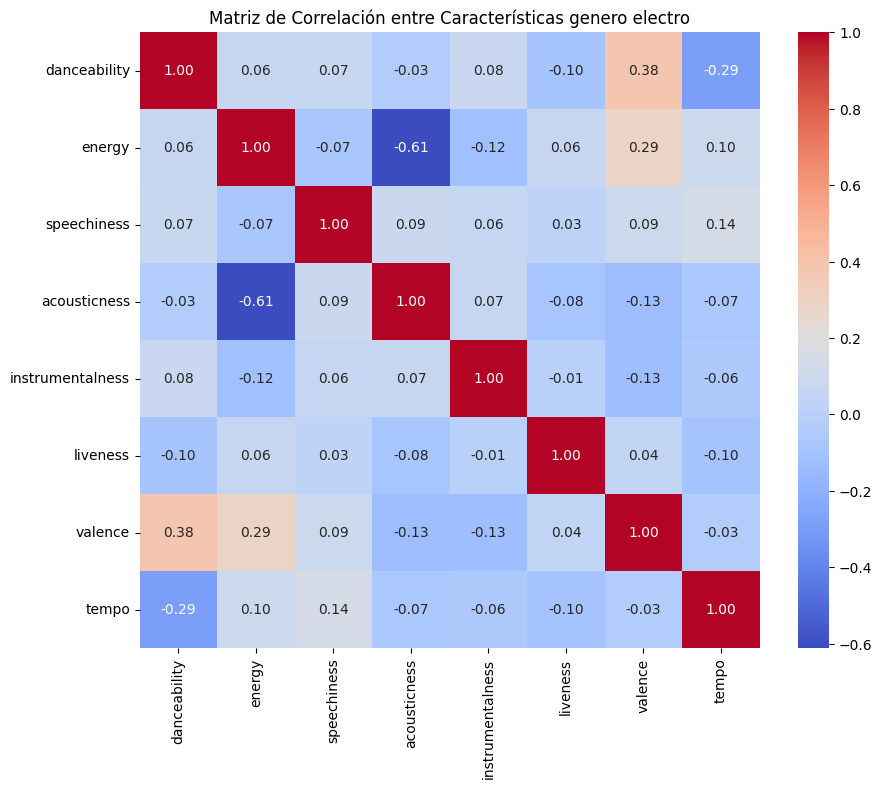

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, electro)
electro_df = df[df['track_genre'] == 'electro']

# Calcular la matriz de correlación para el género "electro"
correlation_matrix = electro_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero electro')
plt.show()

#### Matriz de correlación de género indie

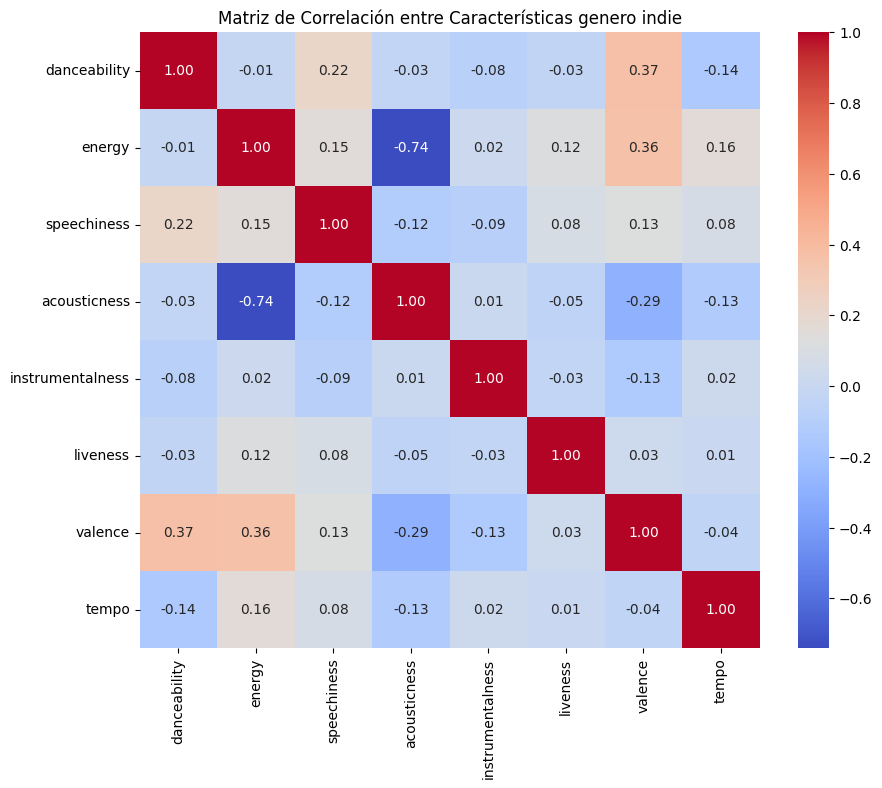

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indie)
indie_df = df[df['track_genre'] == 'indie']

# Calcular la matriz de correlación para el género "indie"
correlation_matrix = indie_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indie')
plt.show()

#### Matriz de correlacion de género alternative

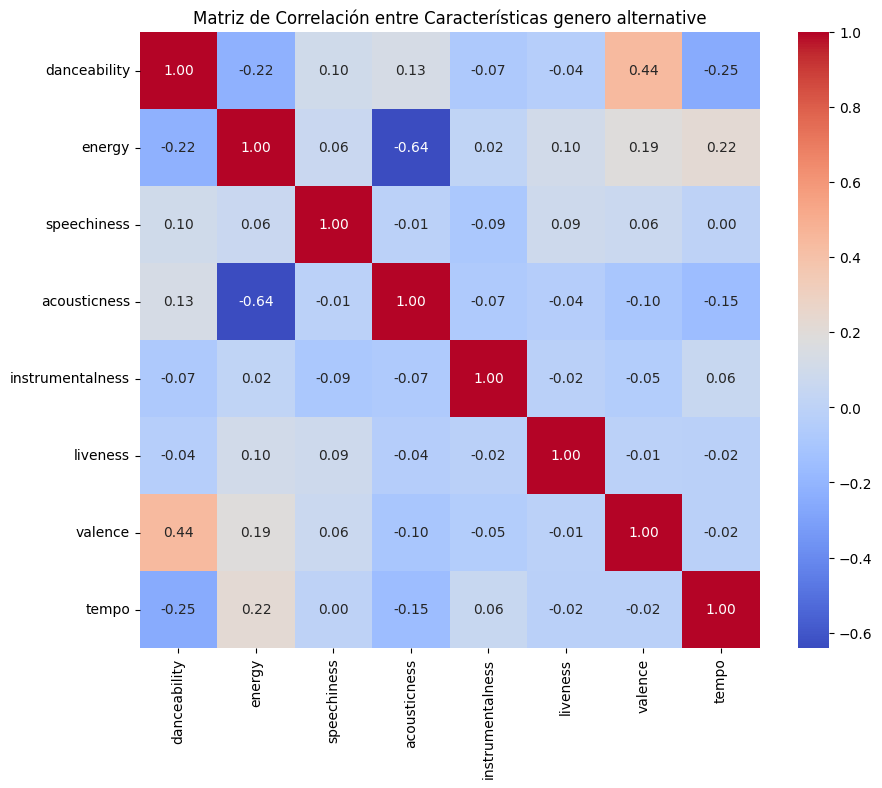

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, alternative)
alternative_df = df[df['track_genre'] == 'alternative']

# Calcular la matriz de correlación para el género "alternative"
correlation_matrix = alternative_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero alternative')
plt.show()

#### Matriz de correlacion de género house

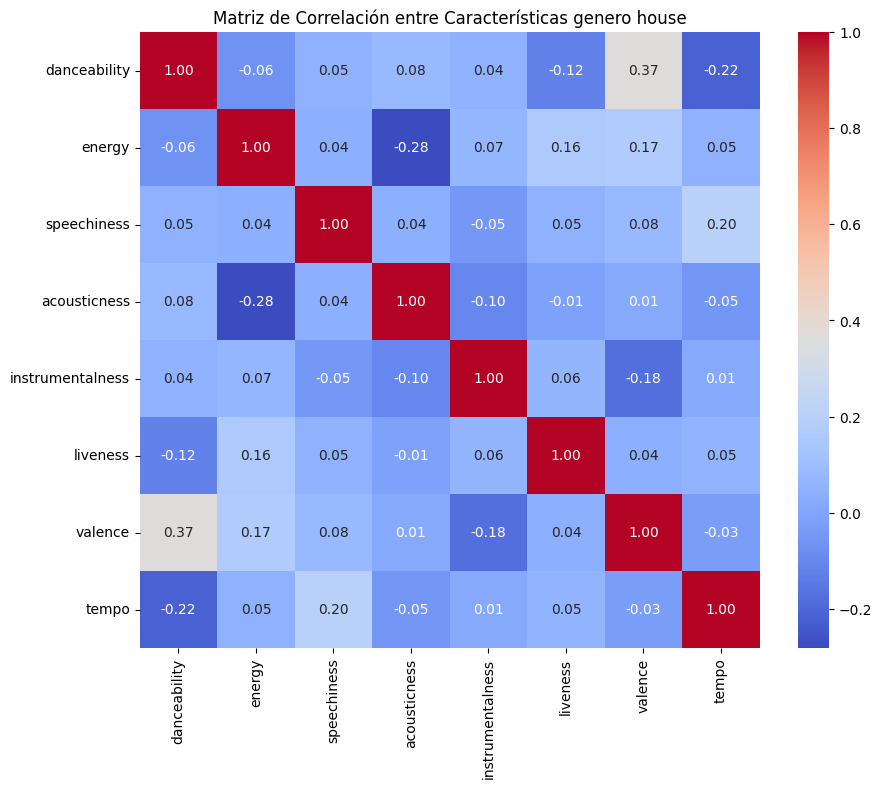

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, house)
house_df = df[df['track_genre'] == 'house']

# Calcular la matriz de correlación para el género "house"
correlation_matrix = house_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero house')
plt.show()

#### Matriz de correlación de género alt-rock

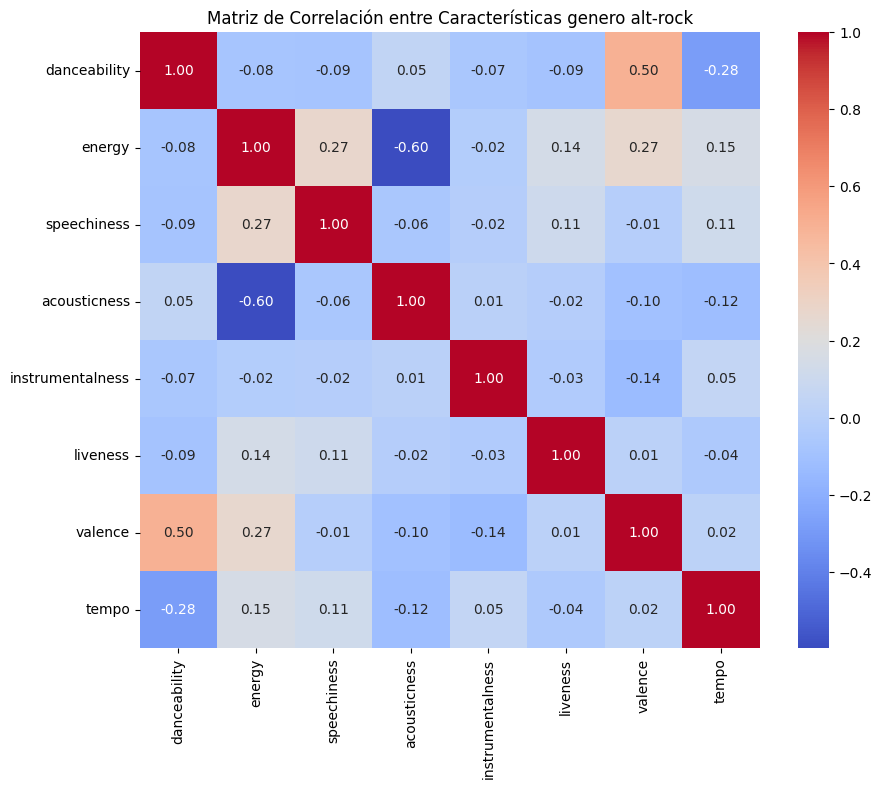

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, alt-rock)
rock_df = df[df['track_genre'] == 'alt-rock']

# Calcular la matriz de correlación para el género "alt-rock"
correlation_matrix = rock_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero alt-rock')
plt.show()

#### Matriz de correlación de género garage

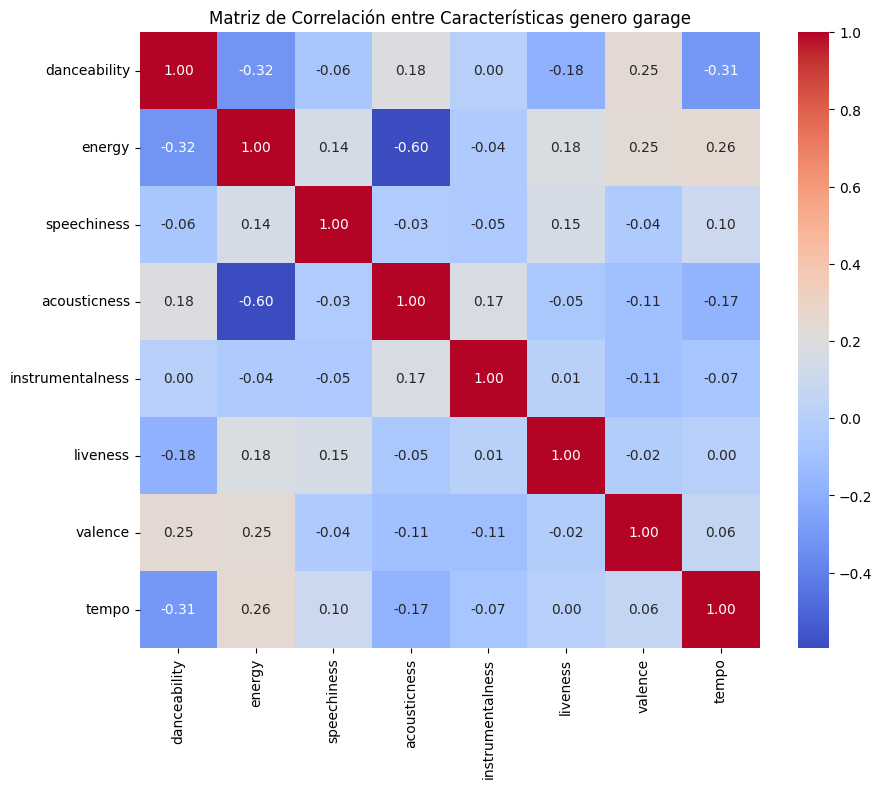

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, garage)
garage_df = df[df['track_genre'] == 'garage']

# Calcular la matriz de correlación para el género "garage"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero garage')
plt.show()

#### Matriz de correlación género k-pop

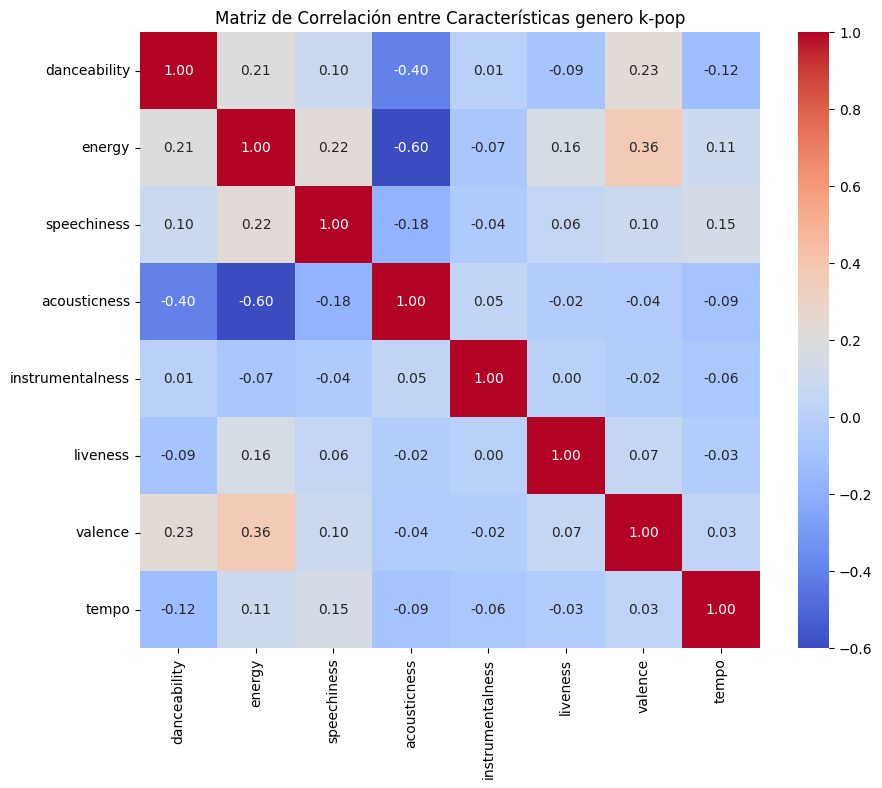

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, k-pop)
garage_df = df[df['track_genre'] == 'k-pop']

# Calcular la matriz de correlación para el género "k-pop"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero k-pop')
plt.show()

#### Matriz de correlación género emo

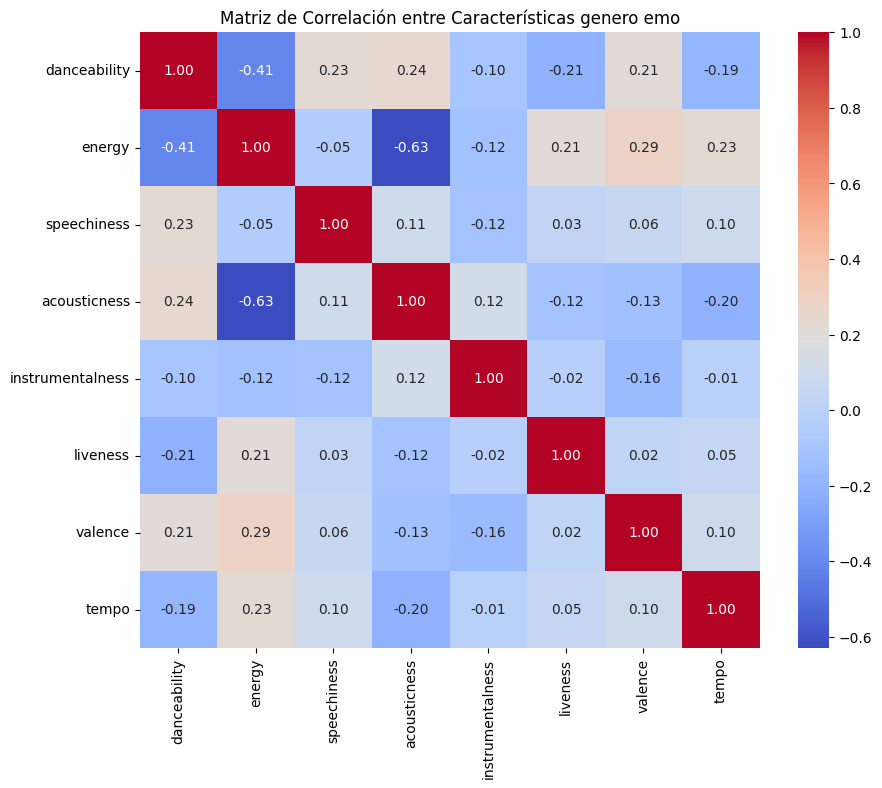

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, emo)
garage_df = df[df['track_genre'] ==  'emo']

# Calcular la matriz de correlación para el género emo"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero emo')
plt.show()

#### Matriz de correlación género indie-pop

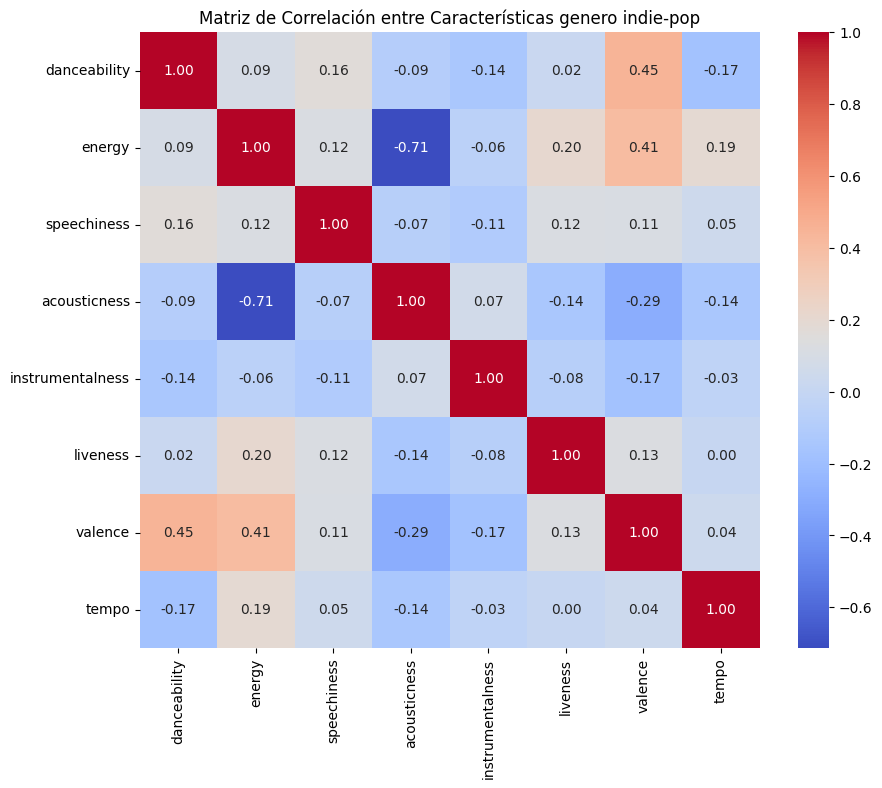

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indie-pop)
garage_df = df[df['track_genre'] == 'indie-pop']

# Calcular la matriz de correlación para el género "indie-pop"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indie-pop')
plt.show()

#### Matriz de correlación género piano

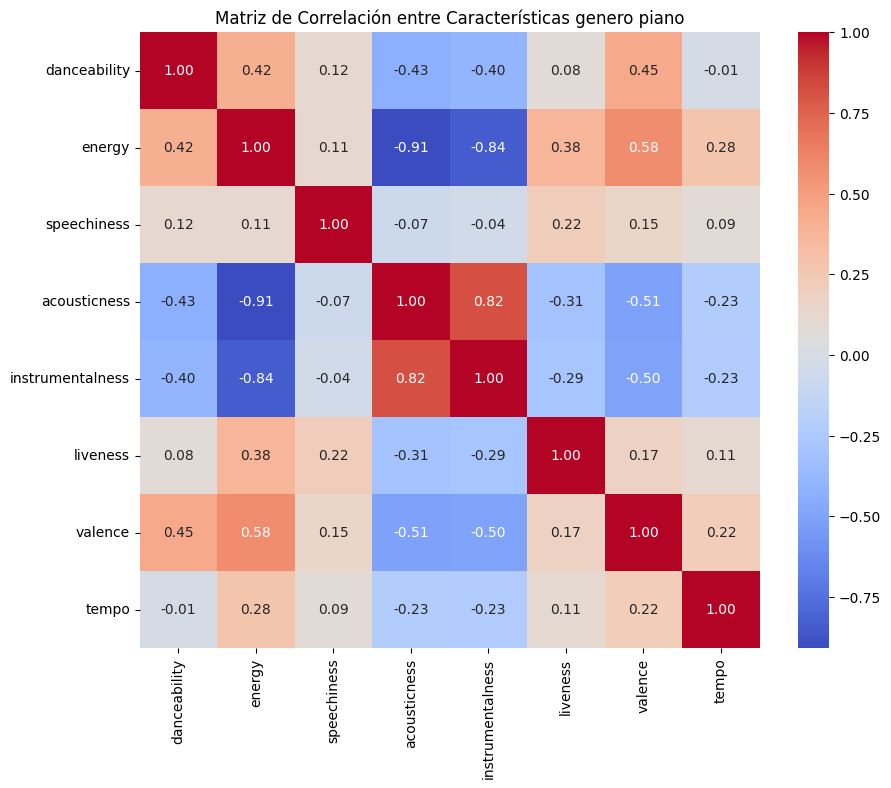

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, piano)
garage_df = df[df['track_genre'] == 'piano']

# Calcular la matriz de correlación para el género "piano"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero piano')
plt.show()

#### Matriz de correlación género hard-rock

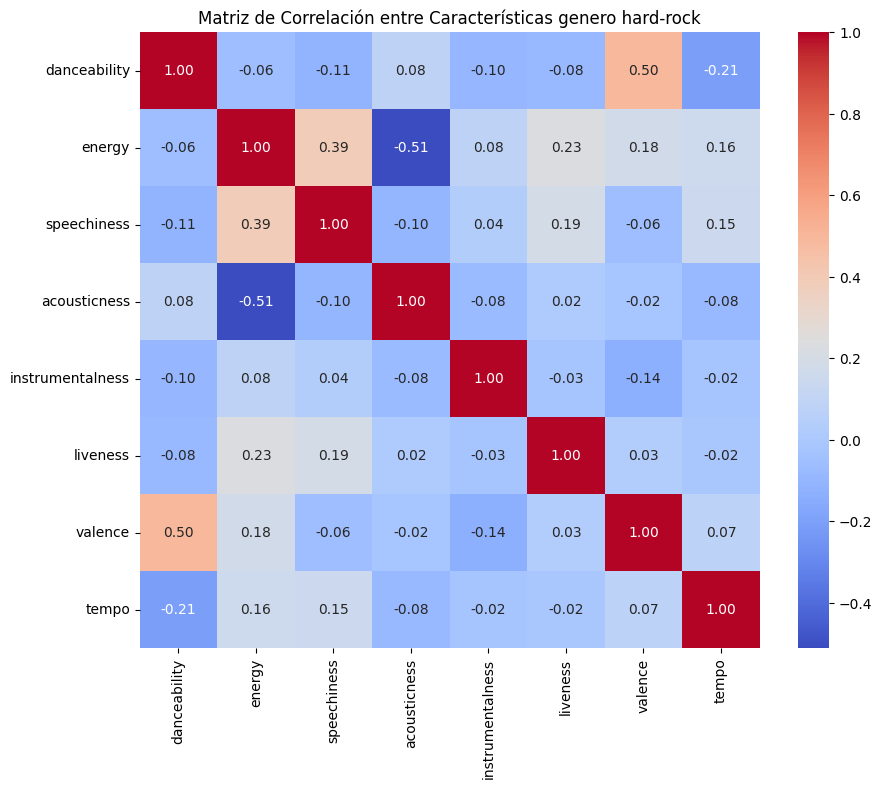

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, hard-rock)
garage_df = df[df['track_genre'] == 'hard-rock']

# Calcular la matriz de correlación para el género "hard-rock"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero hard-rock')
plt.show()

#### Matriz de correlación género british

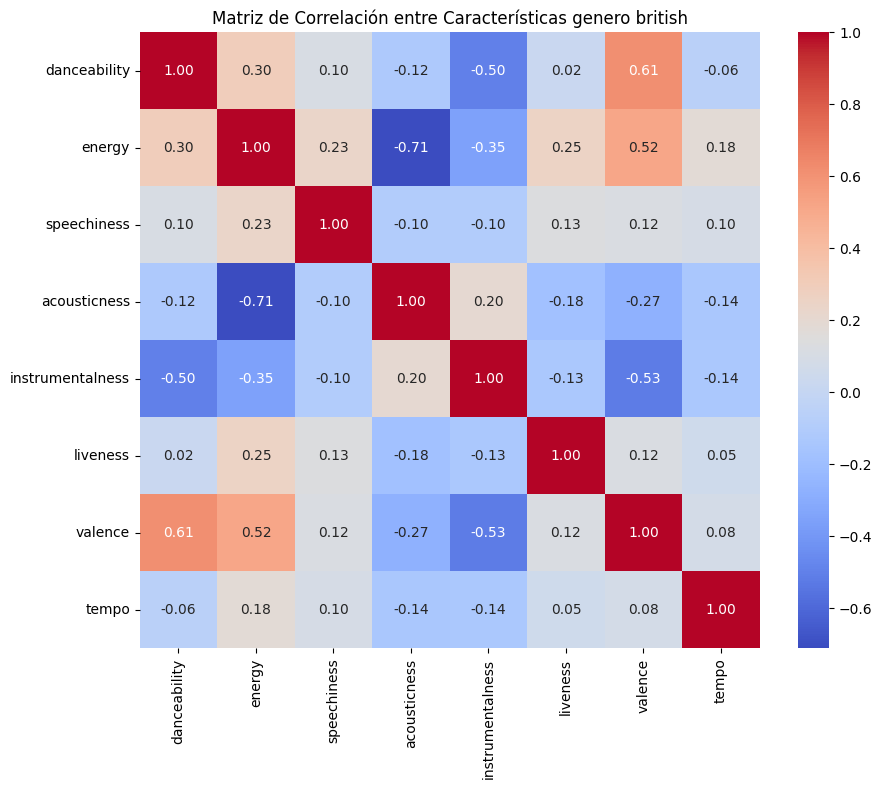

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, british)
garage_df = df[df['track_genre'] == 'british']

# Calcular la matriz de correlación para el género "british"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero british')
plt.show()

#### Matriz de correlación género soul

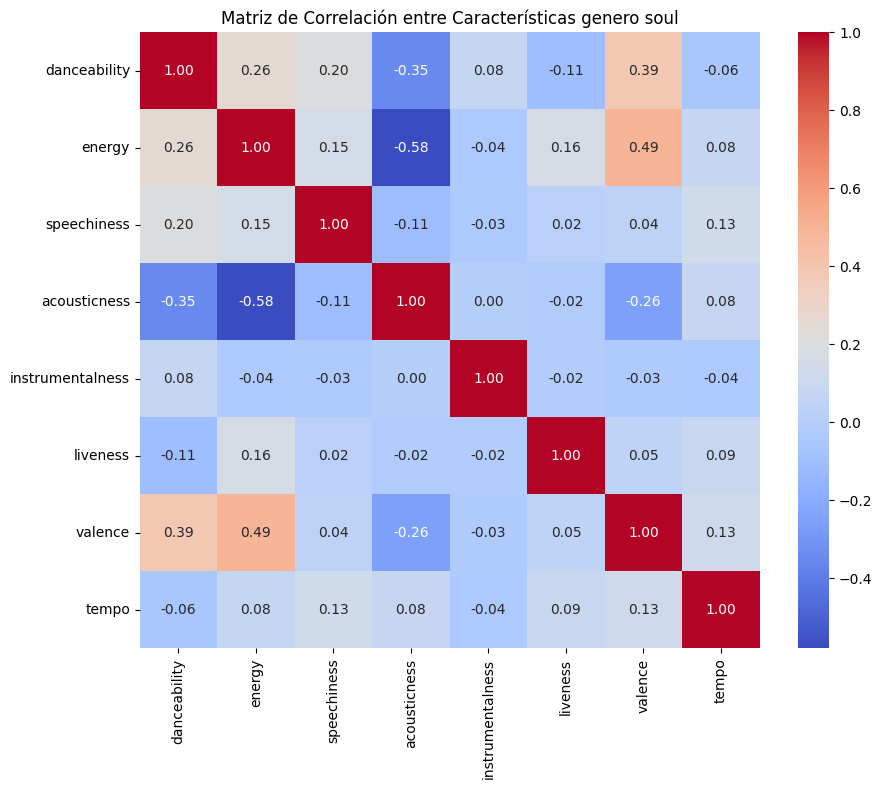

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, soul)
garage_df = df[df['track_genre'] == 'soul']

# Calcular la matriz de correlación para el género "soul"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero soul')
plt.show()

#### Matriz de correlación género progressive-house

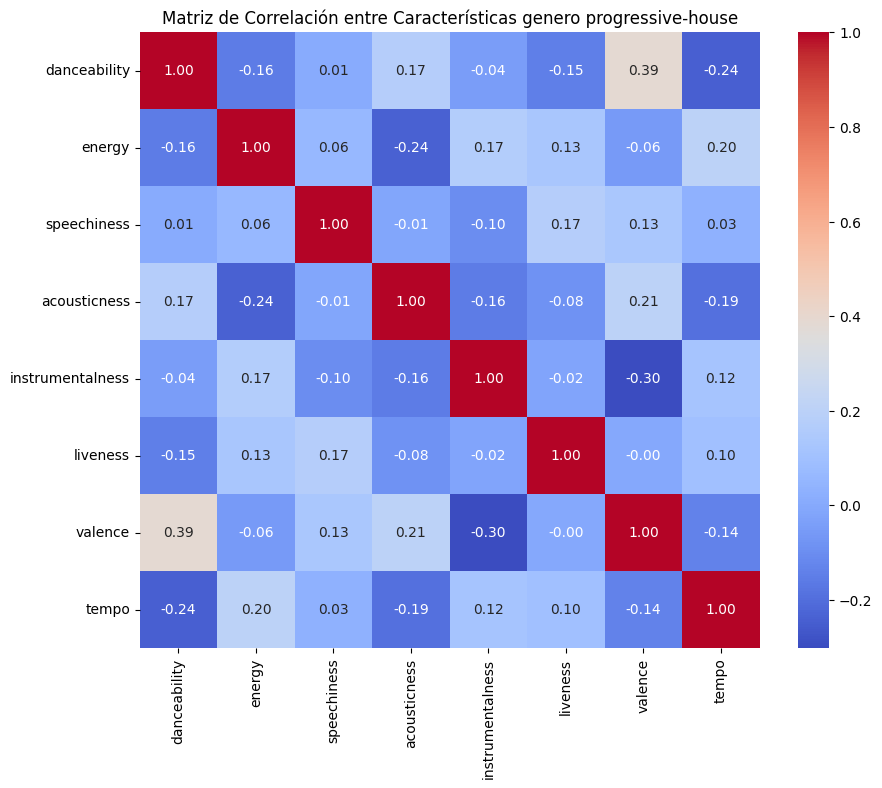

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, progressive-house)
garage_df = df[df['track_genre'] == 'progressive-house']

# Calcular la matriz de correlación para el género "progressive-house"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero progressive-house')
plt.show()

#### Matriz de correlación género singer-songwriter

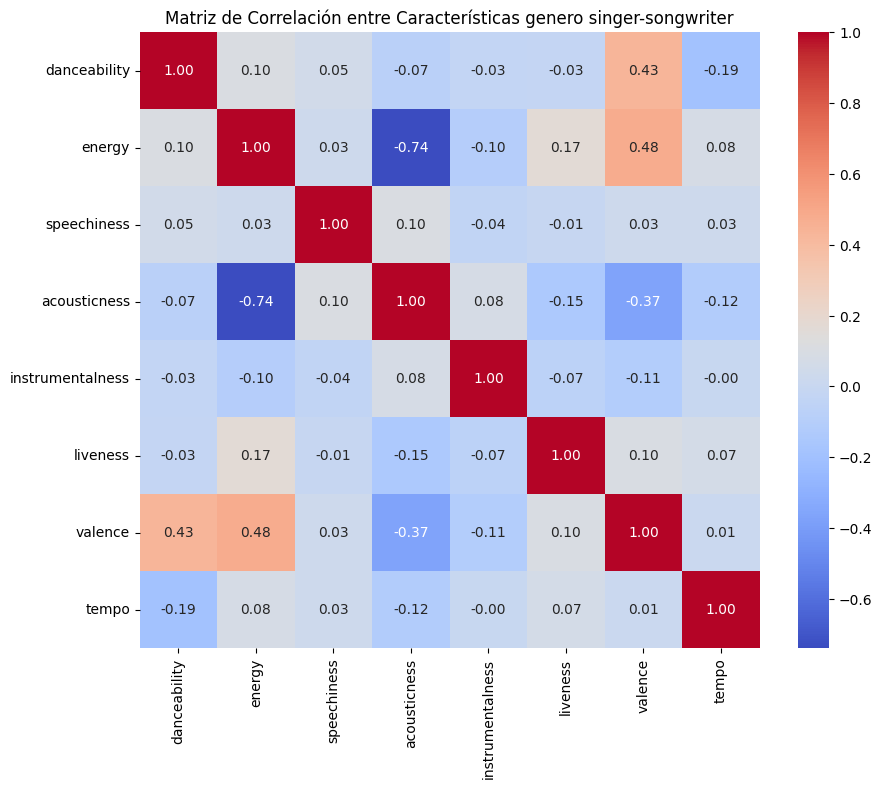

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, singer-songwriter)
garage_df = df[df['track_genre'] == 'singer-songwriter']

# Calcular la matriz de correlación para el género "singer-songwriter"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero singer-songwriter')
plt.show()

#### Matriz de correlación género country

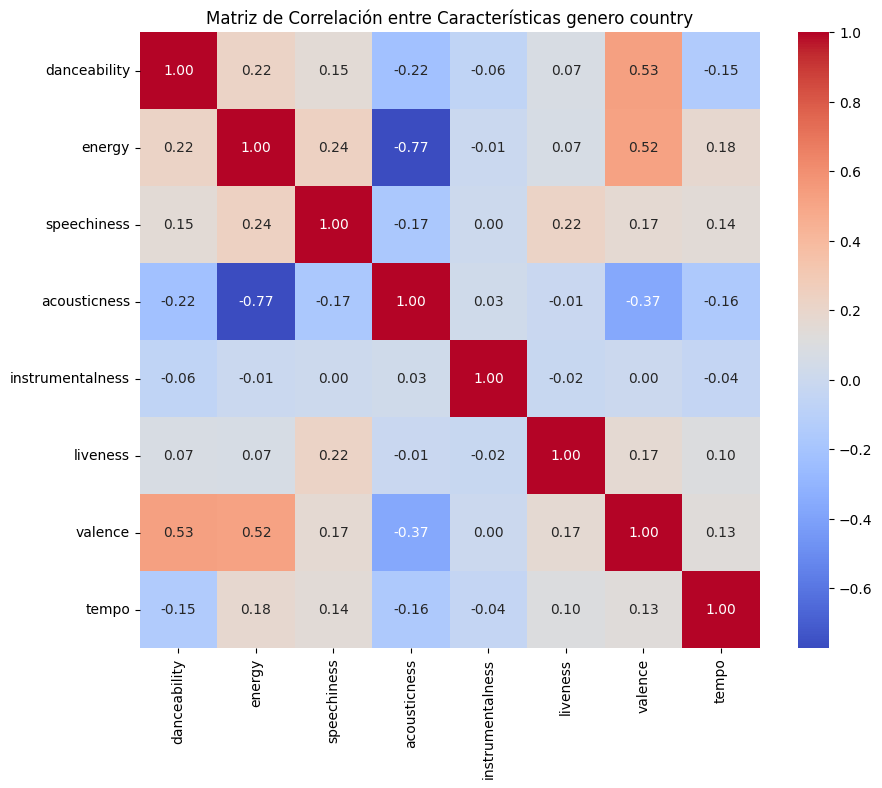

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, country)
garage_df = df[df['track_genre'] == 'country']

# Calcular la matriz de correlación para el género "country"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero country')
plt.show()

#### Matriz de correlación género songwriter

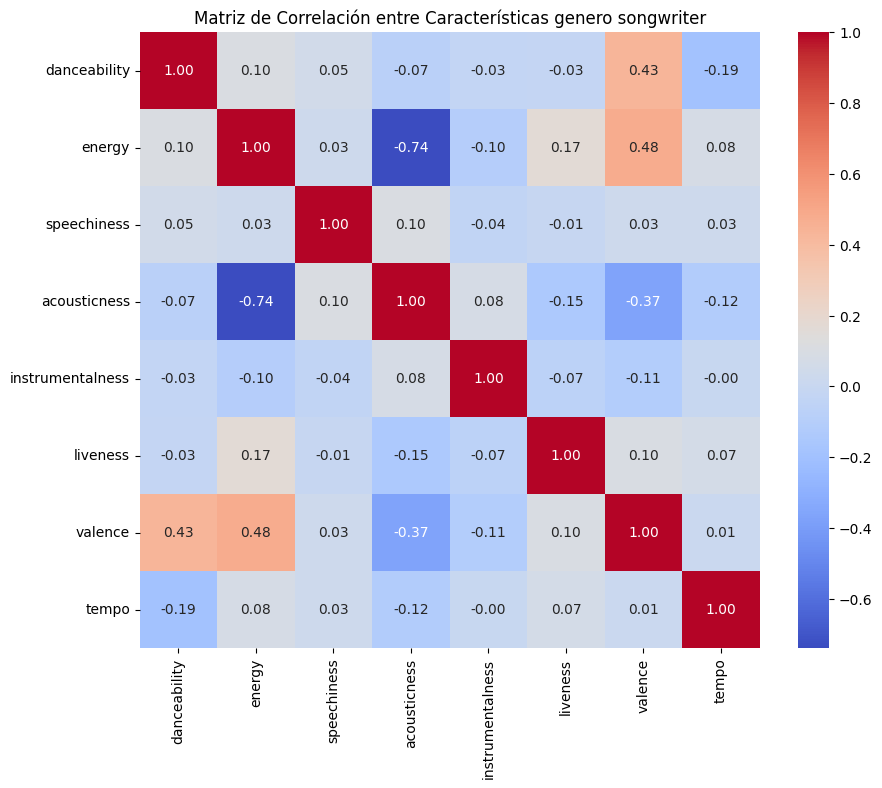

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, songwriter)
garage_df = df[df['track_genre'] == 'songwriter']

# Calcular la matriz de correlación para el género "songwriter"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero songwriter')
plt.show()

#### Matriz de correlación género funk

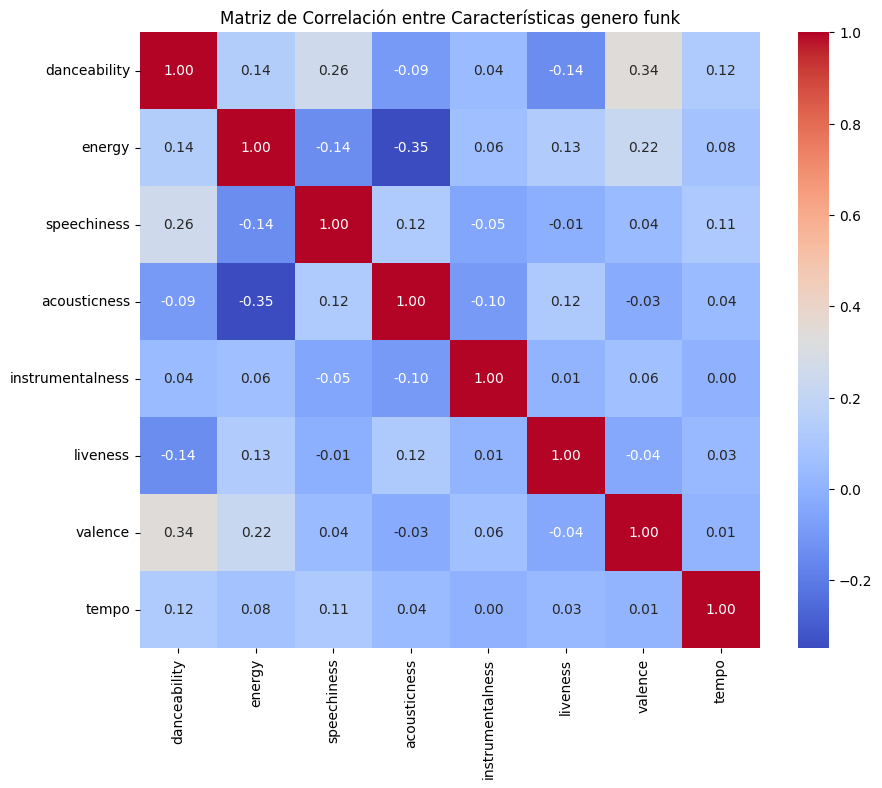

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, funk)
garage_df = df[df['track_genre'] == 'funk']

# Calcular la matriz de correlación para el género "funk"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero funk')
plt.show()

#### Matriz de correlación género spanish

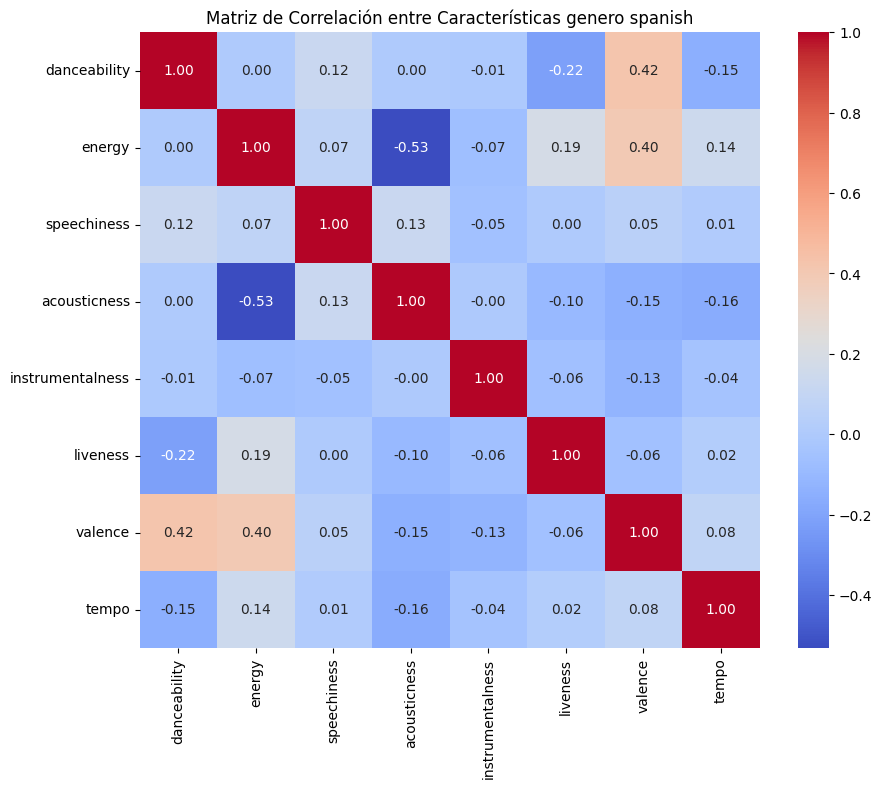

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, spanish)
garage_df = df[df['track_genre'] == 'spanish']

# Calcular la matriz de correlación para el género "spanish"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero spanish')
plt.show()

#### Matriz de correlación género indian

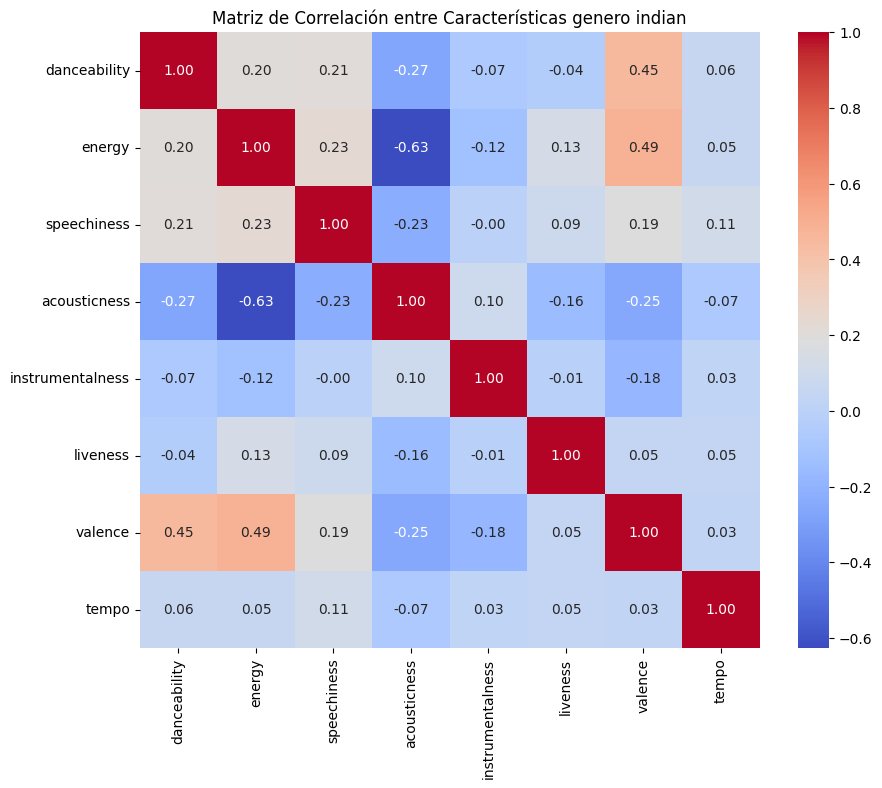

In [ ]:
# Filtrar el DataFrame por género (por ejemplo, indian)
garage_df = df[df['track_genre'] == 'indian']

# Calcular la matriz de correlación para el género "indian"
correlation_matrix = garage_df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Características genero indian')
plt.show()

### Cantidad de canciones explicitas y no explicitas por género

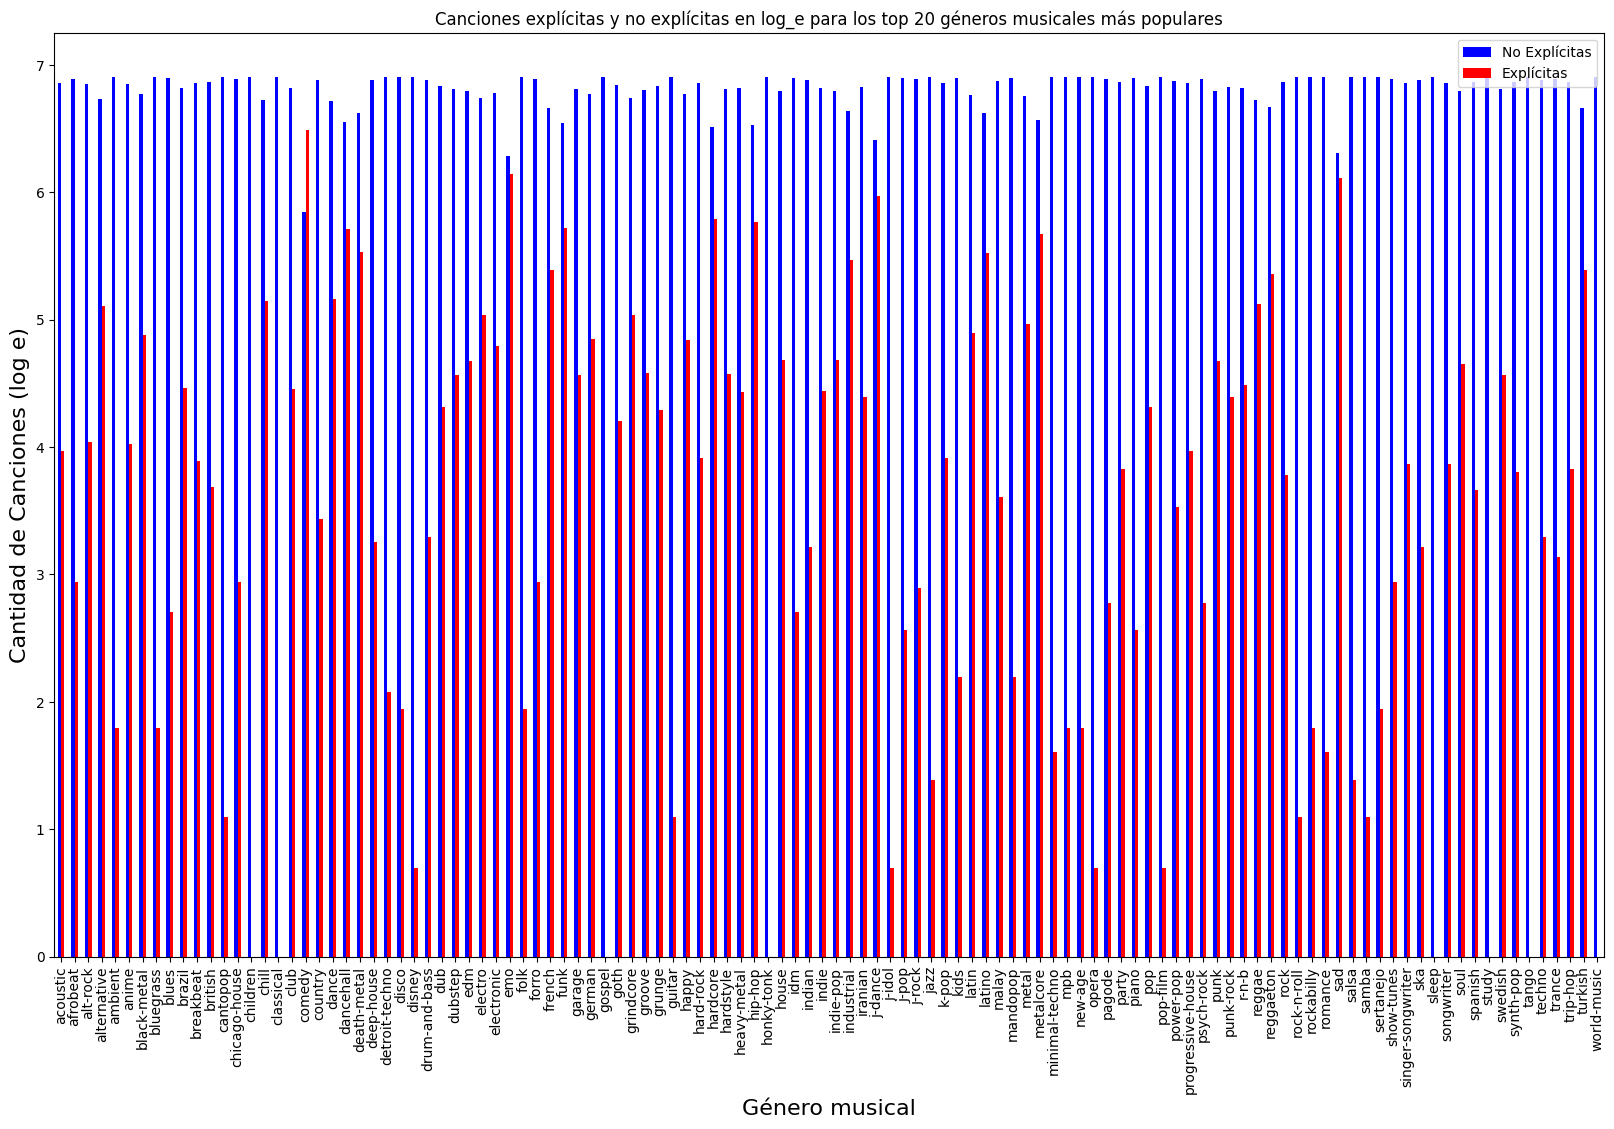

In [ ]:
# Promedio de popularidad para cada género
avg_popularity = df.groupby('track_genre')['popularity'].mean()
# Top 20 géneros de acuerdo a la popularidad
top_genres = avg_popularity.sort_values(ascending=False).head(114).index
# Filtrar el dataframe
filtered_df = df[df['track_genre'].isin(top_genres)]

# Agrupar por genero y clasificación en explicit
grouped = filtered_df.groupby(['track_genre', 'explicit']).size().unstack(fill_value=0)
# Aplicar logaritmo en base 'e' a los valores para normalizar la cantidad
grouped_log = np.log(grouped + 1)
#print(grouped_log)
#print(grouped_log.columns)
#df_sorted = grouped_log[grouped_log['Index'] == True].sort_values(by='explicit')
# Crear gráfico
plt.rcParams["figure.figsize"] = (20, 12)
grouped_log.plot(kind='bar', color=['blue', 'red'], width=0.5)
plt.xlabel('Género musical', fontsize=16)
plt.ylabel('Cantidad de Canciones (log e)', fontsize=16)
plt.title('Canciones explícitas y no explícitas en log_e para los top 20 géneros musicales más populares')
plt.legend(['No Explícitas', 'Explícitas'], loc='upper right')
plt.show()

### Duración promedio de las canciones por género

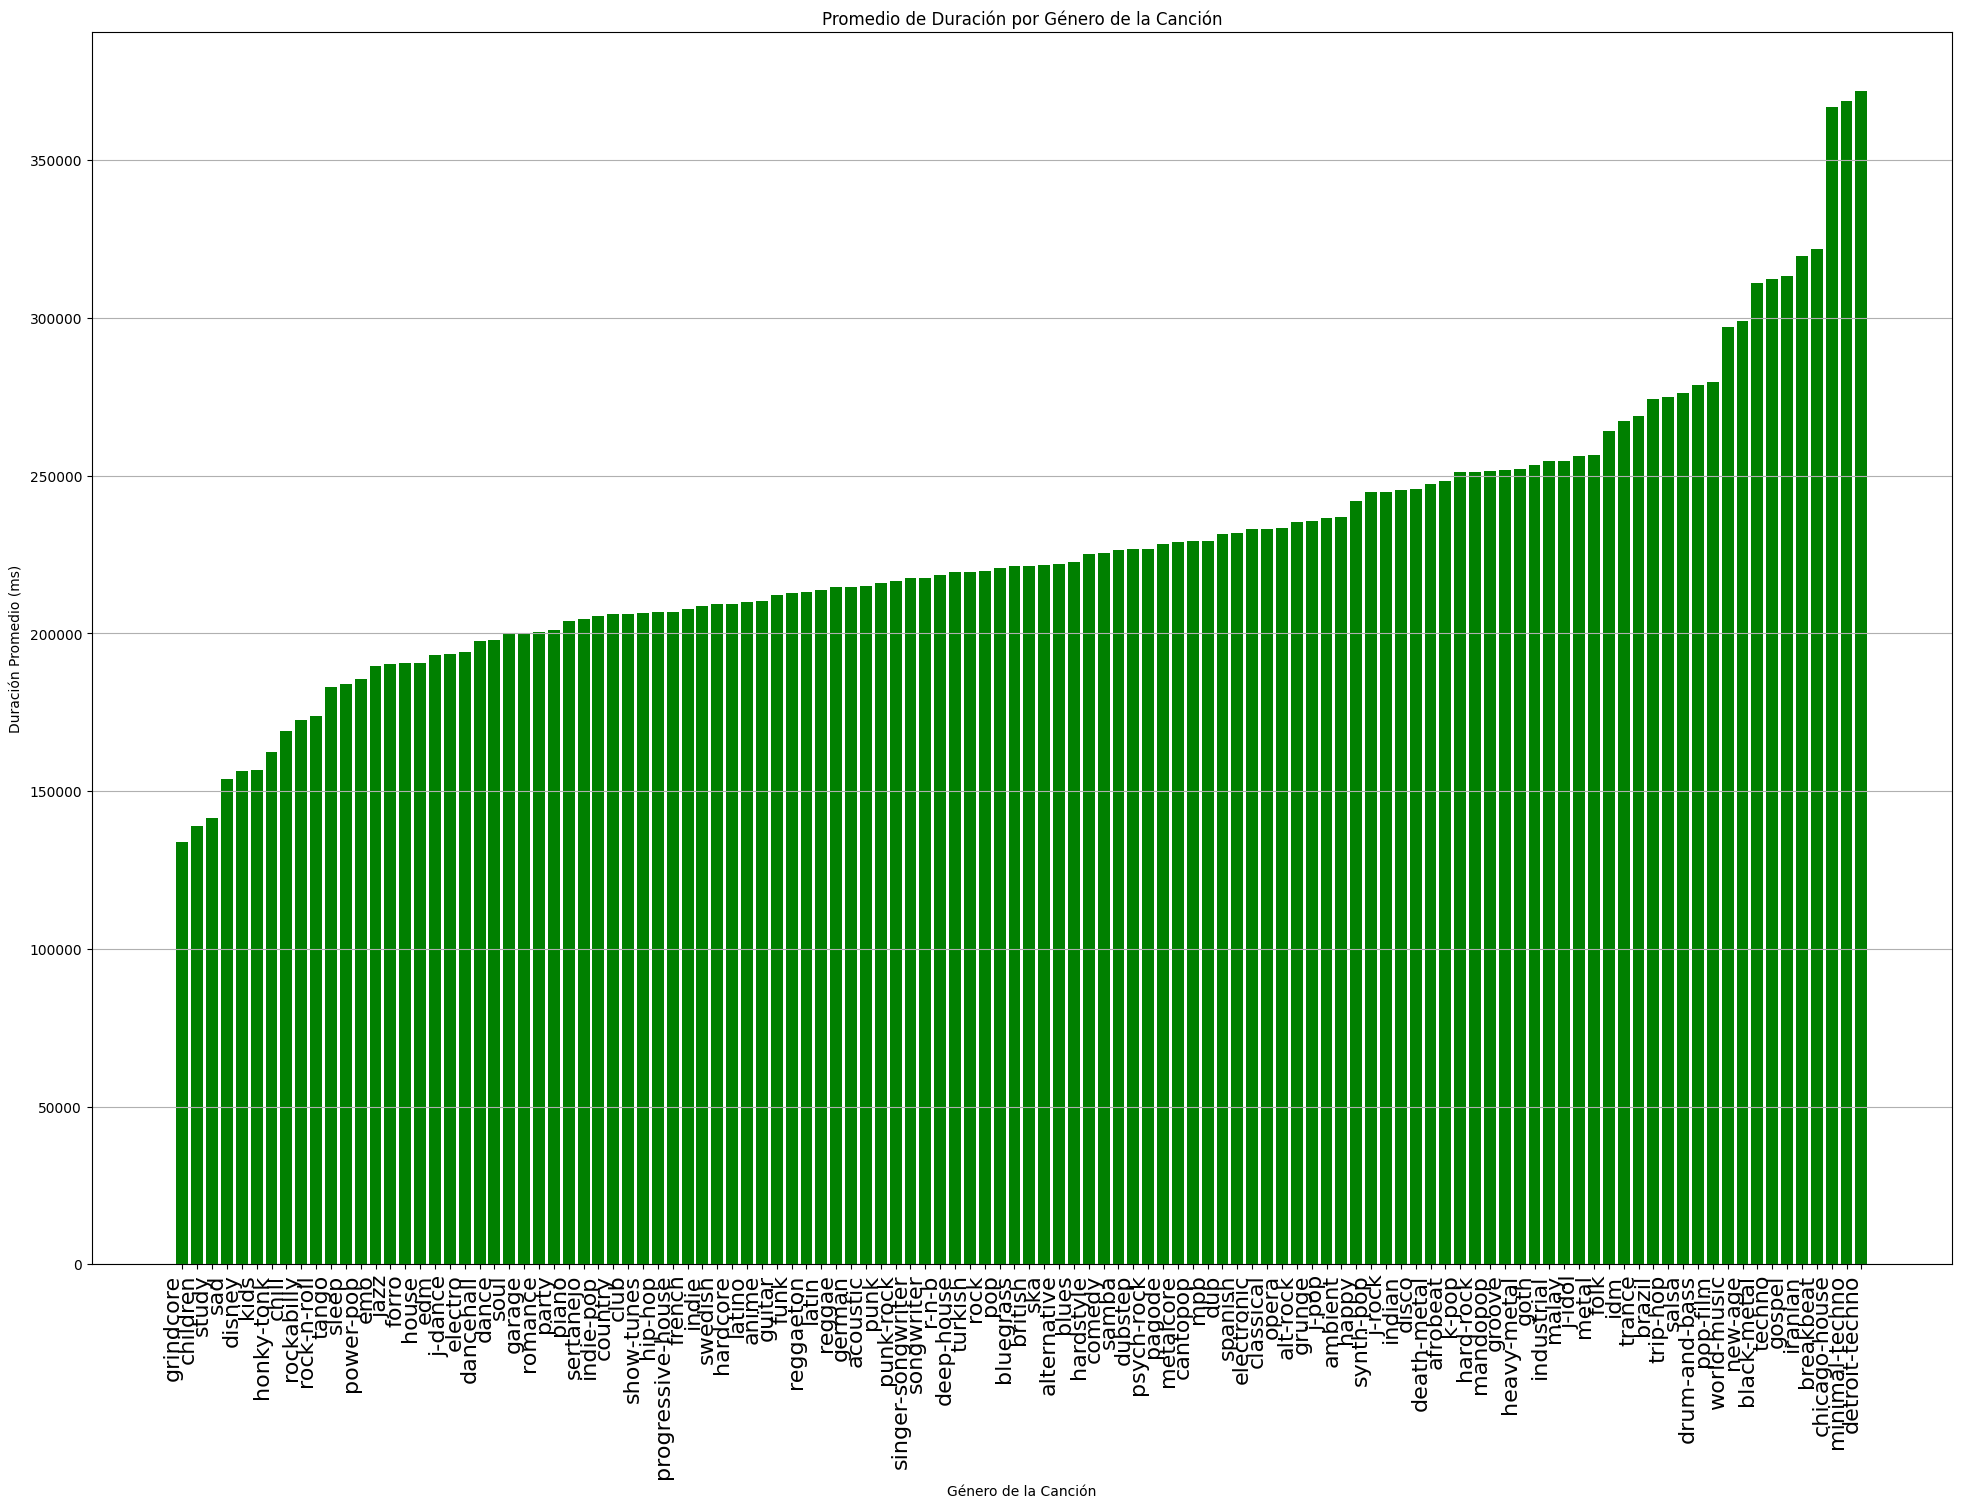

In [ ]:
# Agrupar por género de la canción y calcular el promedio de duración
avg_duration_by_genre = df.groupby('track_genre')['duration_ms'].mean().reset_index()
avg_duration_by_genre = avg_duration_by_genre.sort_values(by='duration_ms')

# Crear el gráfico de barras
plt.figure(figsize=(24, 16))
plt.bar(avg_duration_by_genre['track_genre'], avg_duration_by_genre['duration_ms'], color='green')
plt.title('Promedio de Duración por Género de la Canción')
plt.xlabel('Género de la Canción')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=90, ha='right', fontsize=16)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(axis='y')
plt.show()

### Análisis mediante funcionalidad describe()

In [ ]:
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

# Contribución de miembros Hito 1


| Tarea                                    | Encargado/a           |
|------------------------------------------|-----------------------|
|        Trabajo en la Presentación        |    Scarlett Plaza     |
|                                          |    Vicente Thiele     |
| Trabajo en el Informe                    |                       |
|                                          |    Javiera Romero     |
|                                          |    Patricio Espinoza  |
|                                          |    Rodrigo Díaz       |
| Revisión Problemas                       |                       |
|                                          |    Rodrigo Díaz       |
|                                          |    Vicente Thiele     |
|                                          |    Scarlett Plaza     |
| Gráficos de Matrices de Correlación por género | |
|                                          |    Javiera Romero     |
|                                          |    Scarlett Plaza     |
| Gráfico Cantidad de Aparición de los Géneros en las 300 Canciones más Populares | |
|                                          |    Javiera Romero     |
| Gráfico Popularidad Promedio por Género  |                       |
|                                          |    Rodrigo Díaz       |
| Gráfico Cantidad de Canciones por Género |                       |
|                                          |    Rodrigo Díaz       |
| Gráfico Género por Explícito             |                       |
|                                          |    Patricio Espinoza  |
| Gráfico de Duración Promedio por Género  |                       |
|                                          |    Patricio Espinoza  |
| Análisis mediante .describe()            |                       |
|                                          |    Patricio Espinoza  |


# Mejoras Hito 1

Retroalimentación: "Seria bien de ver una visualizacion de los generos con los una agregacion de embeddings. Porque no usaron el genero en las correlaciones? Demasiado matrices de correlaciones, no concluision"

Decisiones tomadas:
- Se realizó una reducción de las matrices de correlación, pasando de muchas matrices a una matriz que representa las similitudes entre géneros.

- Se agrega una matriz de correlación general, con las caacteristicas musicales y los géneros.

- Análisis de metricas de distancia y similitud entre géneros para considerarlo en el pre-procesamiento de las metdodologías del Hito 2.

- Conclusión Hito 1



## Mejorar fase exploratoria

### Matriz de correlacion entre generos, muestra similitud entre generos

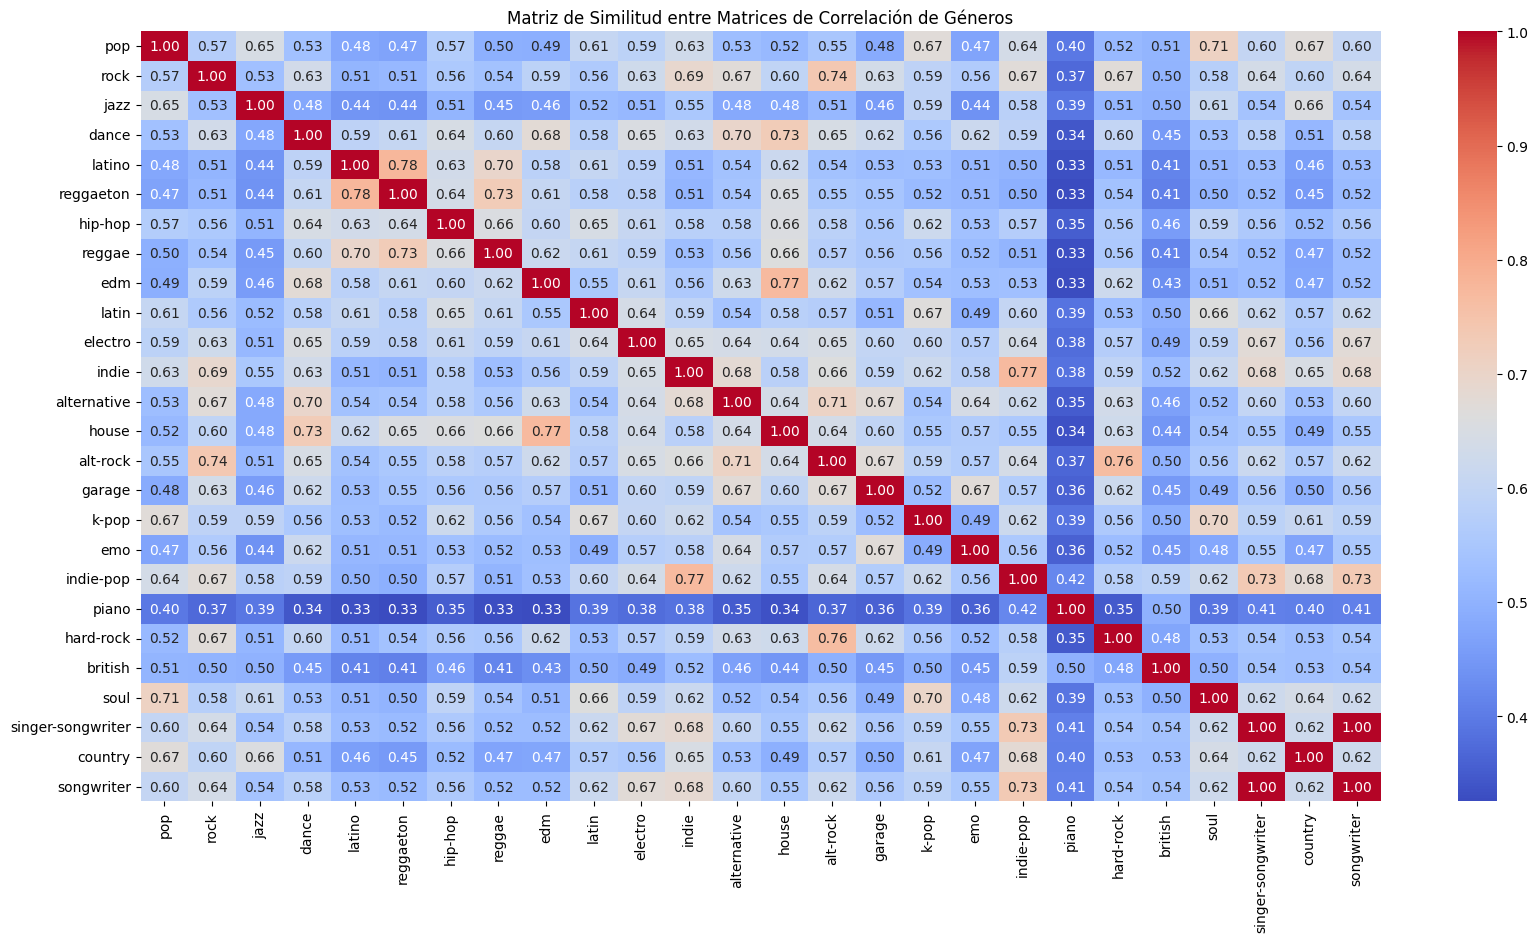

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
genres_of_interest = ['pop', 'rock', 'jazz', 'dance', 'latino', 'reggaeton', 'hip-hop', 'reggae', 'edm', 'latin', 'electro', 'indie', 'alternative', 'house', 'alt-rock', 'garage','k-pop', 'emo', 'indie-pop', 'piano', 'hard-rock', 'british', 'soul', 'singer-songwriter','country', 'songwriter']

correlation_matrices = {}

for genre in genres_of_interest:
    genre_df = df[df['track_genre'] == genre]
    correlation_matrix = genre_df[['danceability', 'energy', 'speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
    correlation_matrices[genre] = correlation_matrix

def get_upper_triangular(matrix):
    return matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool)).stack()

correlation_vectors = {genre: get_upper_triangular(matrix) for genre, matrix in correlation_matrices.items()}

correlation_df = pd.DataFrame(correlation_vectors).T

distances = pdist(correlation_df, metric='euclidean')
distance_matrix = squareform(distances)


similarity_matrix = 1 / (1 + distance_matrix)

plt.figure(figsize=(20, 10))
sns.heatmap(similarity_matrix, annot=True, xticklabels=genres_of_interest, yticklabels=genres_of_interest, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Similitud entre Matrices de Correlación de Géneros')
plt.show()


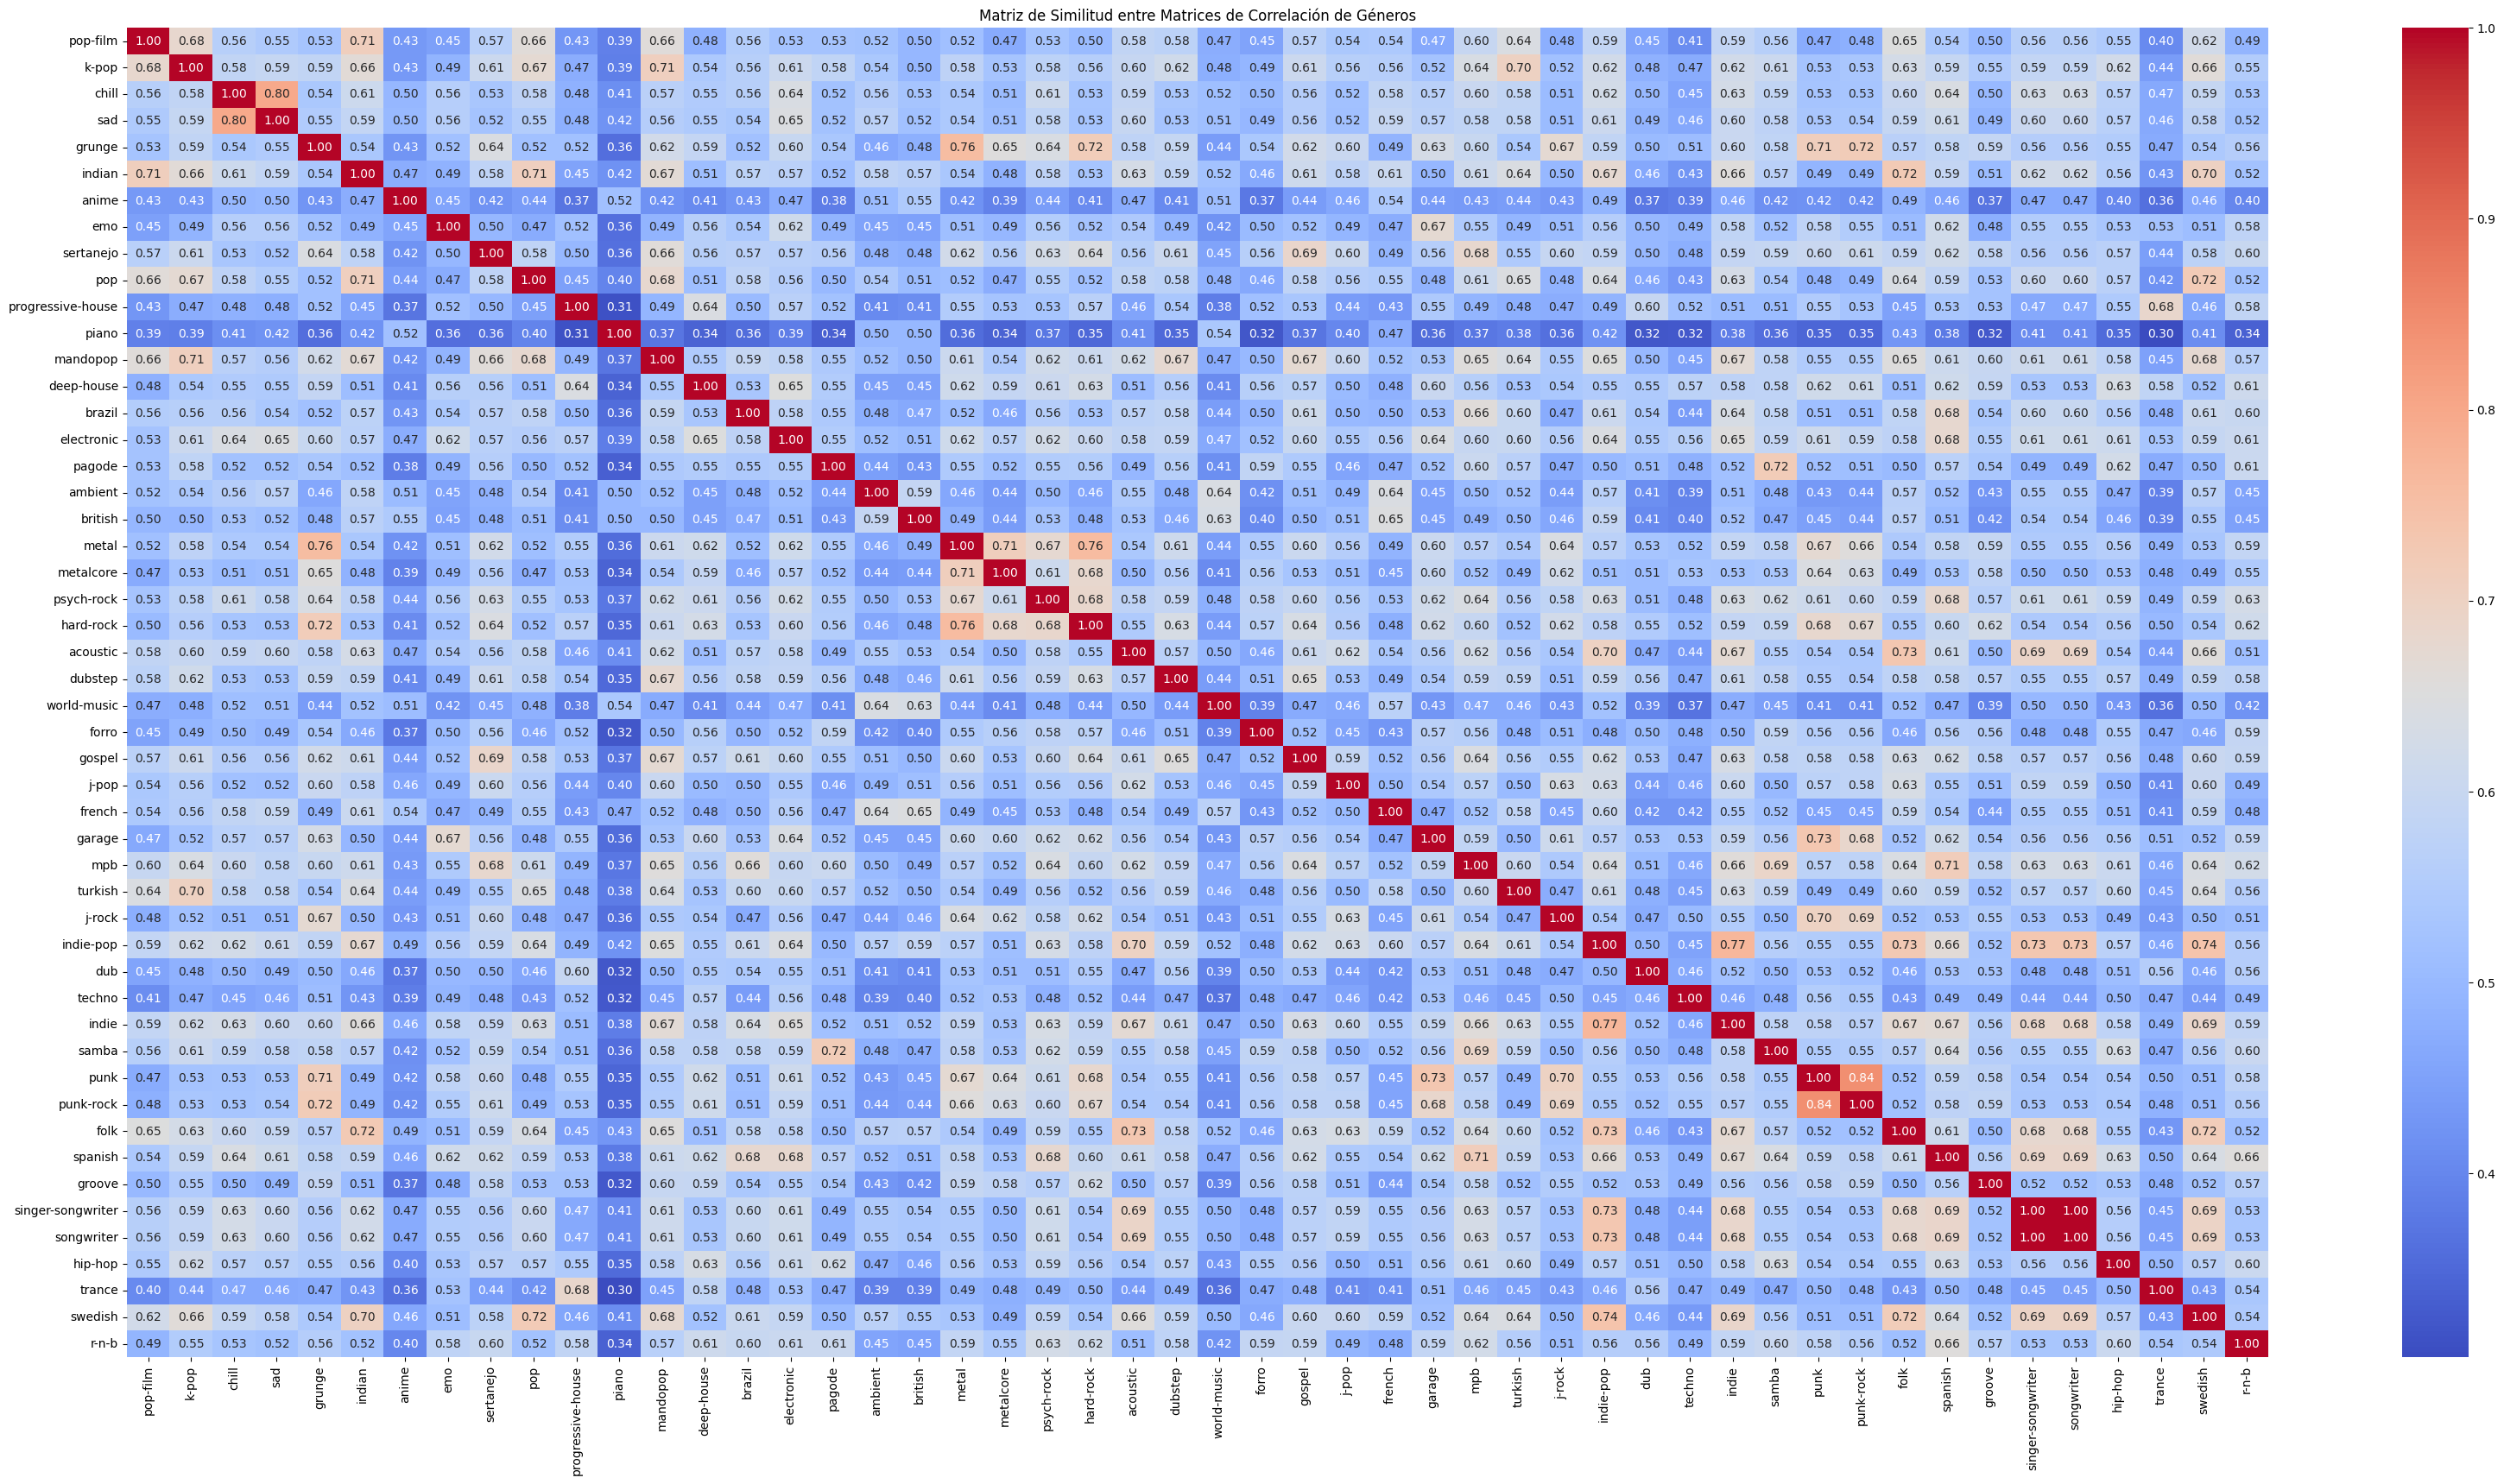

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform

genre_popularity = df.groupby('track_genre')['popularity'].mean()
top_50_genres = genre_popularity.sort_values(ascending=False).head(50).index

#Filtrar el DataFrame para incluir solo los 50 géneros más populares
df_50_genres = df[df['track_genre'].isin(top_50_genres)]

#Crear un diccionario para almacenar las matrices de correlación
correlation_matrices = {}

for genre in top_50_genres:
    genre_df = df_50_genres[df_50_genres['track_genre'] == genre]
    correlation_matrix = genre_df[['danceability', 'energy', 'speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
    correlation_matrices[genre] = correlation_matrix

#Función para obtener la parte triangular superior de la matriz
def get_upper_triangular(matrix):
    return matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool)).stack()

#Obtener los vectores de correlación para cada género
correlation_vectors = {genre: get_upper_triangular(matrix) for genre, matrix in correlation_matrices.items()}

# Convertir el diccionario en un DataFrame
correlation_df = pd.DataFrame(correlation_vectors).T

# Calcular la matriz de distancias
distances = pdist(correlation_df, metric='euclidean')
distance_matrix = squareform(distances)

# Convertir las distancias en similitudes
similarity_matrix = 1 / (1 + distance_matrix)

# Visualizar la matriz de similitud
plt.figure(figsize=(40, 20))
sns.heatmap(similarity_matrix, annot=True, xticklabels=top_50_genres, yticklabels=top_50_genres, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Similitud entre Matrices de Correlación de Géneros')
plt.show()


### Matriz de correlacion incluyendo los generos

<Axes: >

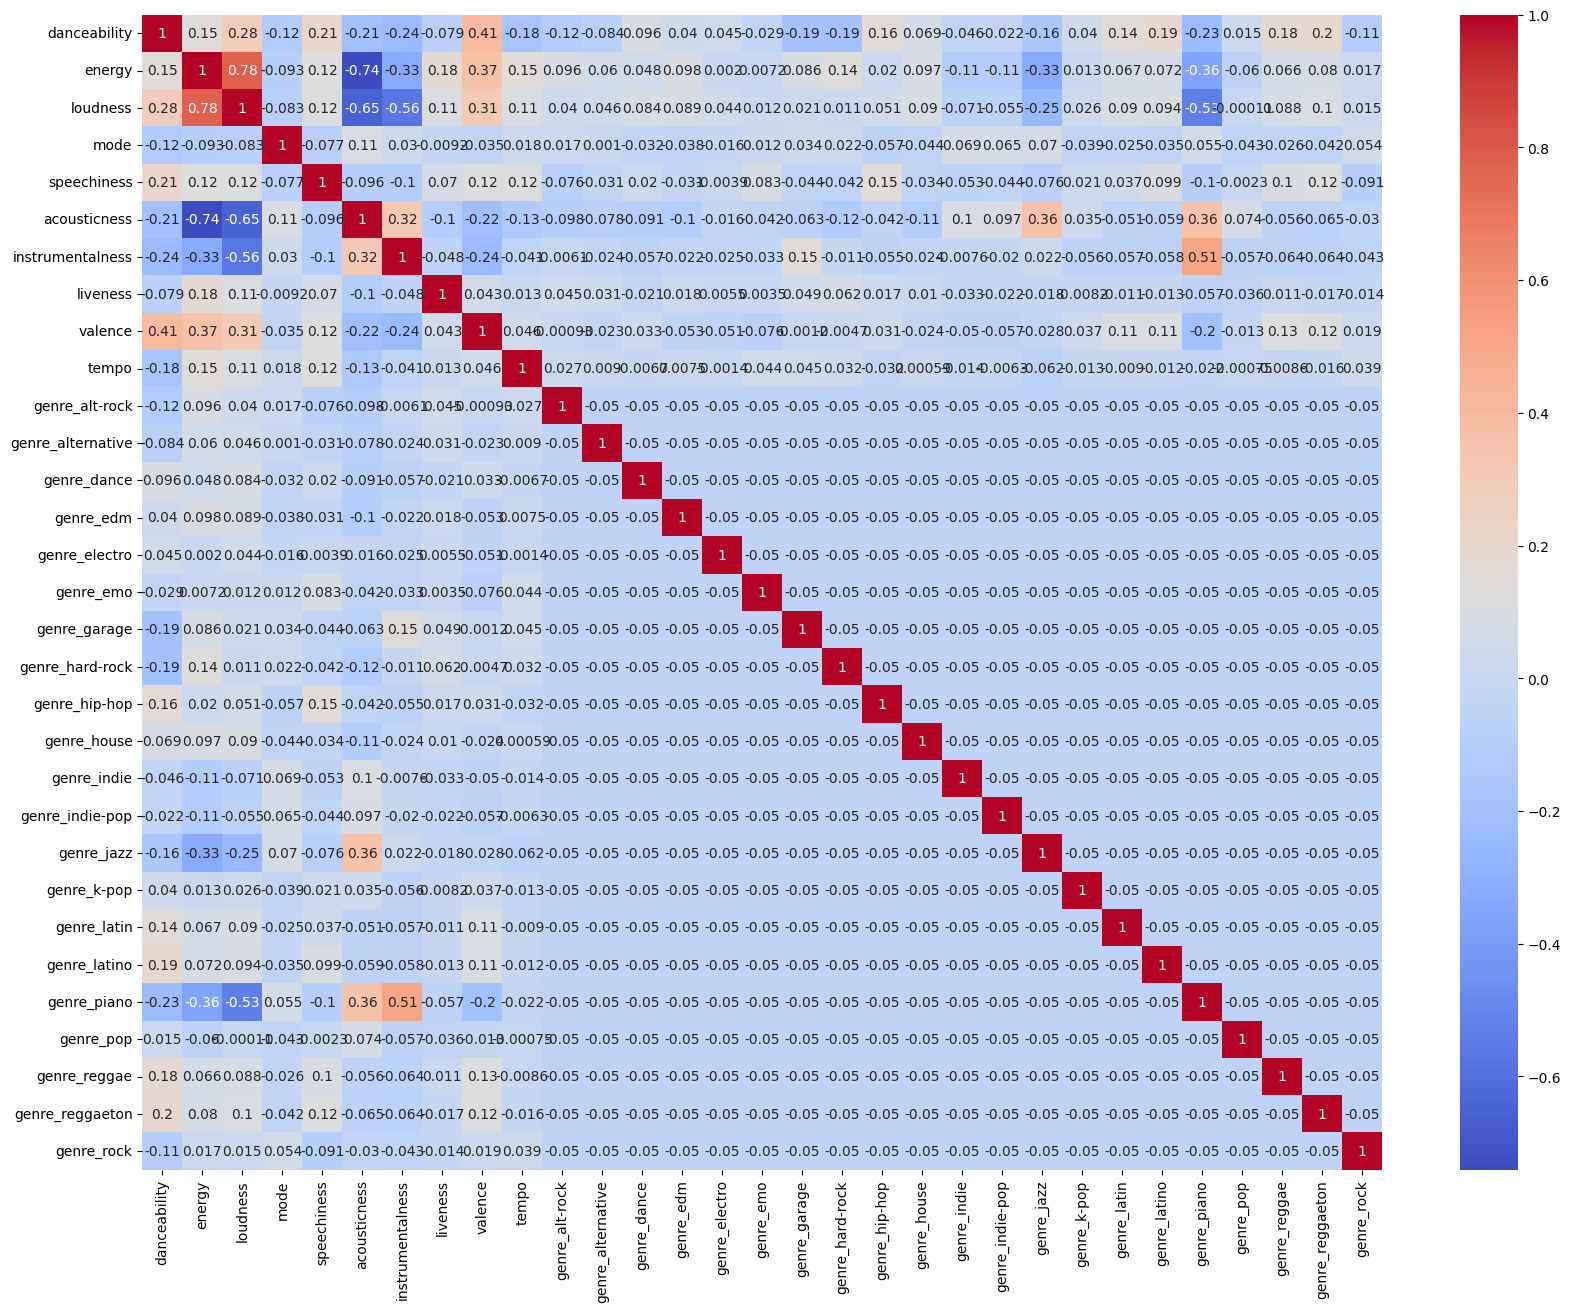

In [ ]:
#Lo haremos con algunos generos de interes
top_20_genres = ['pop', 'rock', 'jazz', 'dance', 'latino', 'reggaeton', 'hip-hop', 'reggae', 'edm', 'latin', 'electro', 'indie', 'alternative', 'house', 'alt-rock', 'garage','k-pop', 'emo', 'indie-pop', 'piano', 'hard-rock']
#Filtramos
df_top_20 = df[df['track_genre'].isin(top_20_genres)]

#Hacemos los generos una variable dummy
df_dummies = pd.get_dummies(df_top_20['track_genre'], prefix='genre')

#Combinamos
df_combined = pd.concat([df_top_20, df_dummies], axis=1)

columns_of_interest = ['danceability', 'energy', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence',
                       'tempo'] + list(df_dummies.columns)
df_numerical = df_combined[columns_of_interest]

#Matriz de correlación
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Loudness promedio por género

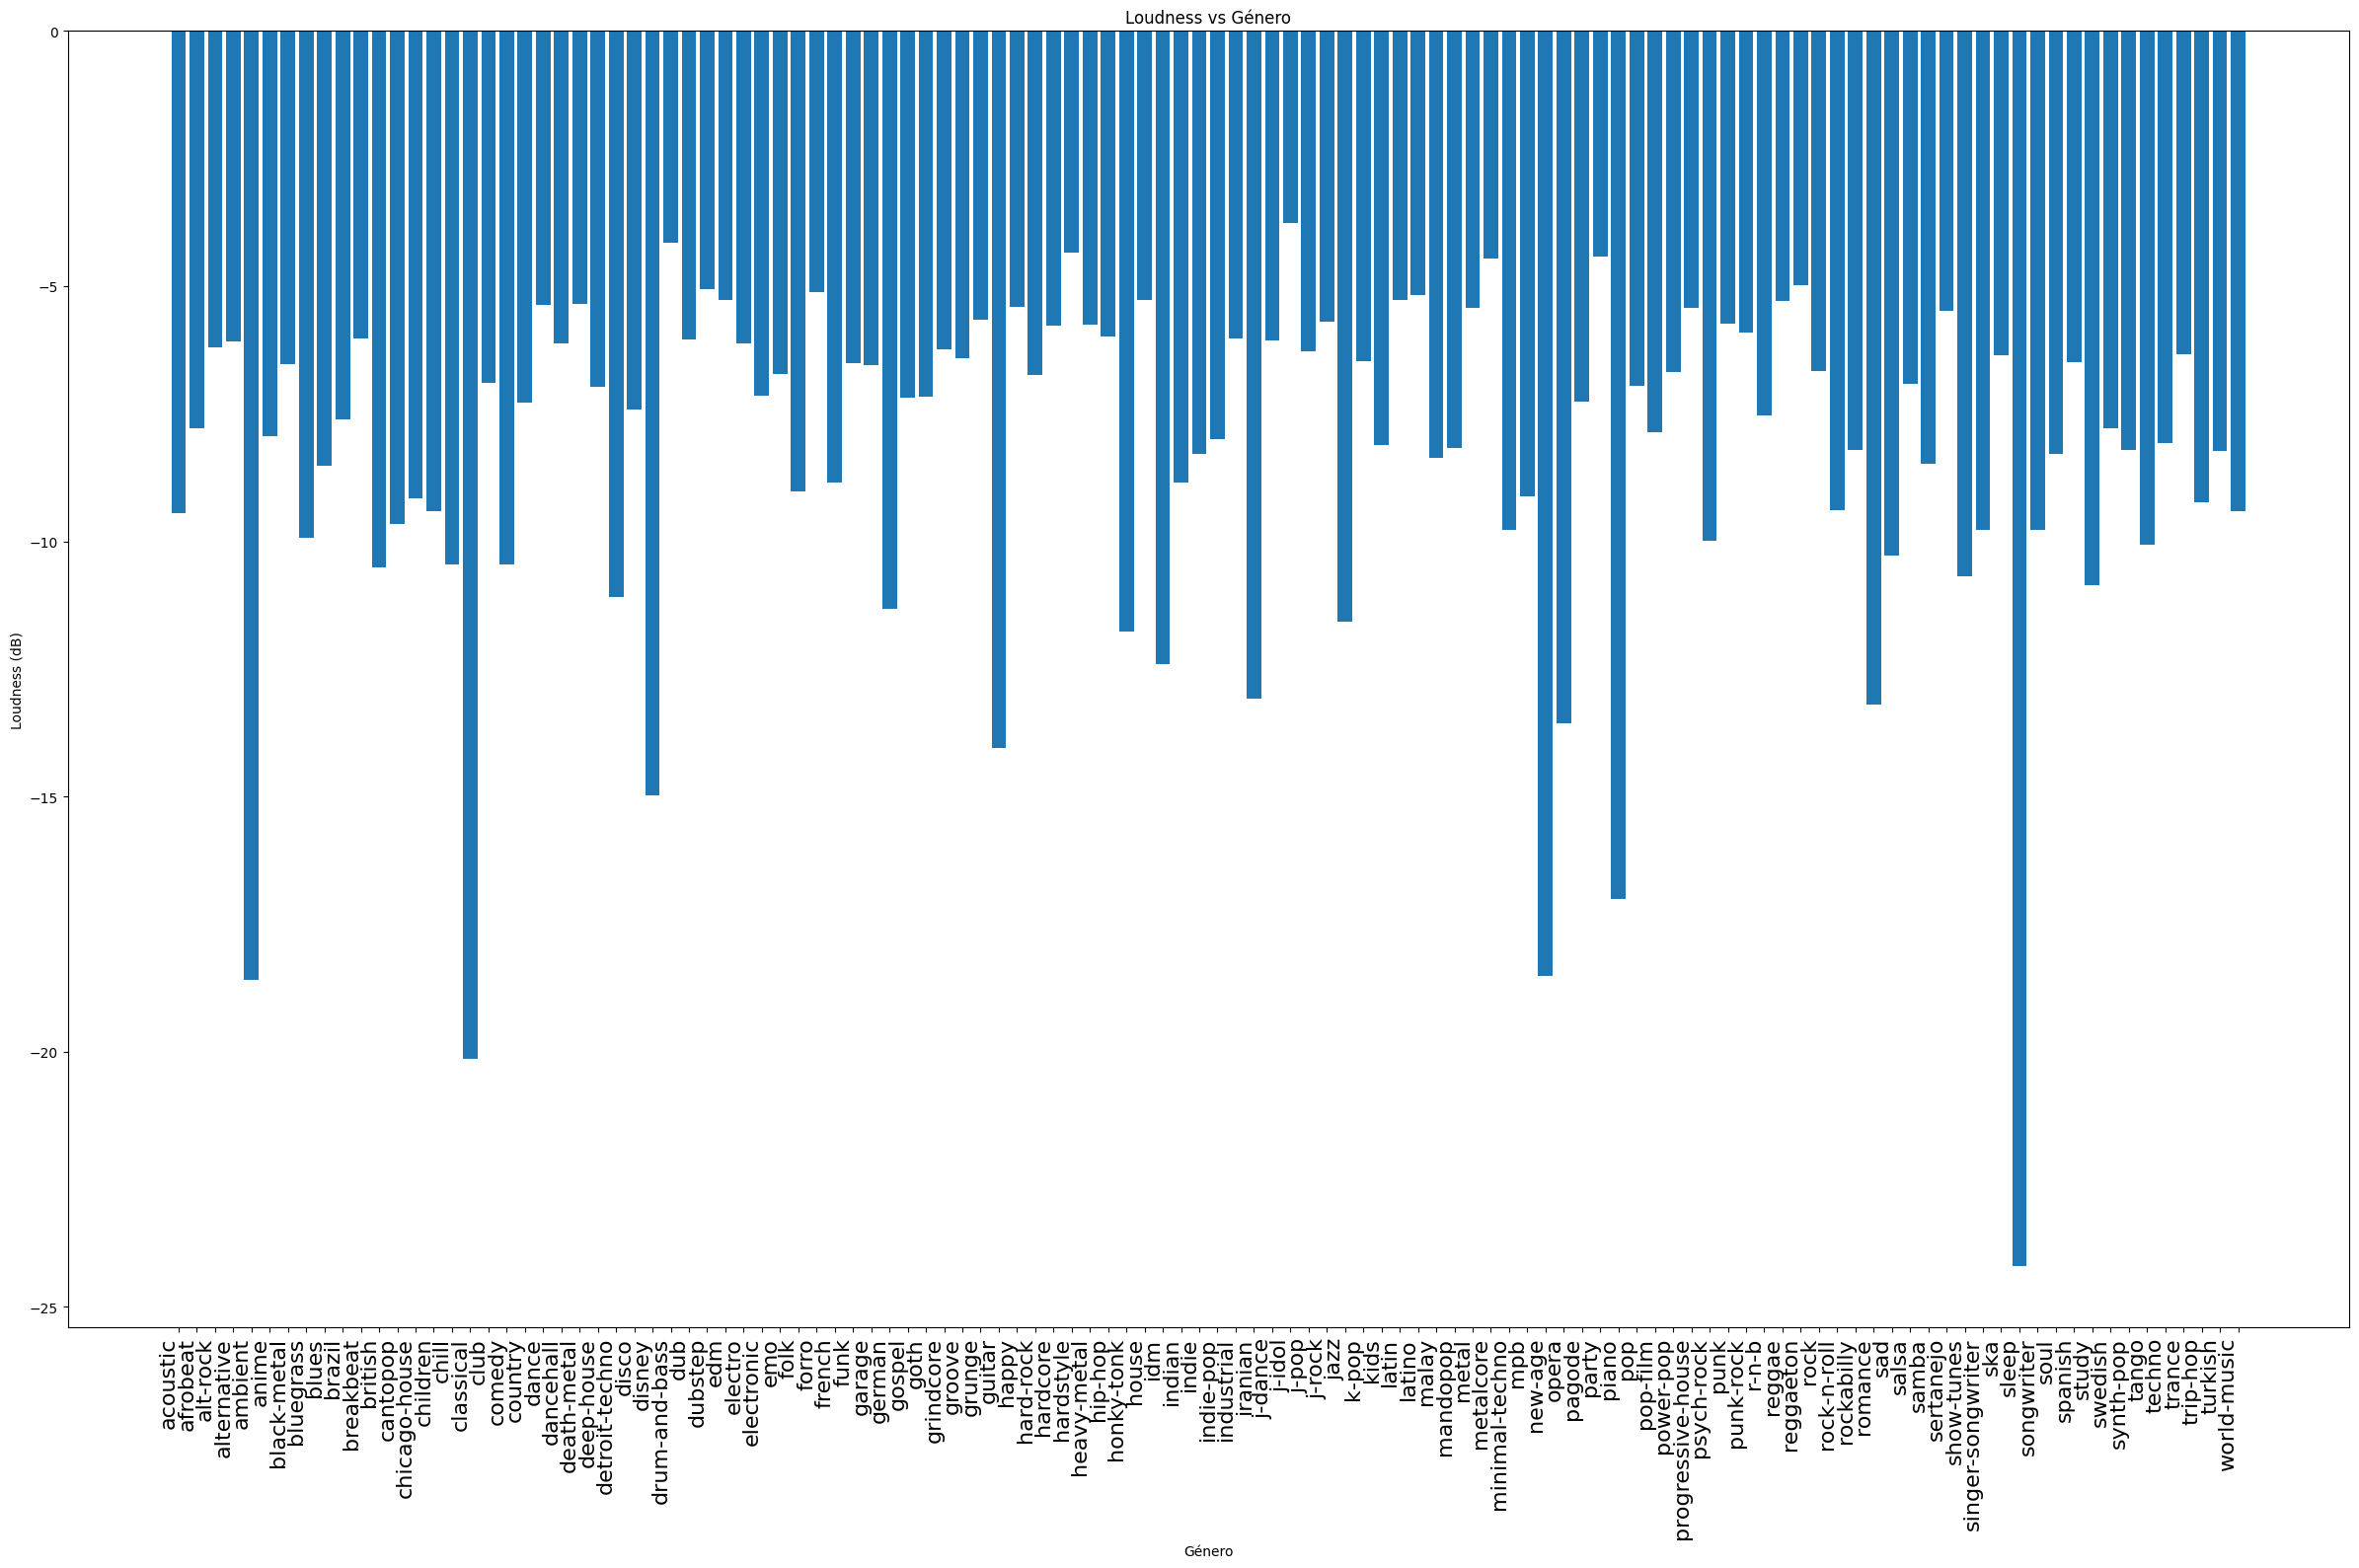

In [ ]:
# Agrupa los datos por género y calcula la media de loudness
loudness_df = df.groupby('track_genre')['loudness'].mean().reset_index()

# Gráfico de loudness vs género
plt.figure(figsize=(24, 16))
plt.bar(loudness_df['track_genre'], loudness_df['loudness'])
plt.xlabel('Género')
plt.ylabel('Loudness (dB)')
plt.title('Loudness vs Género')
plt.xticks(rotation=90, ha='right', fontsize=16)
plt.tight_layout()
plt.show()

### Keys por género

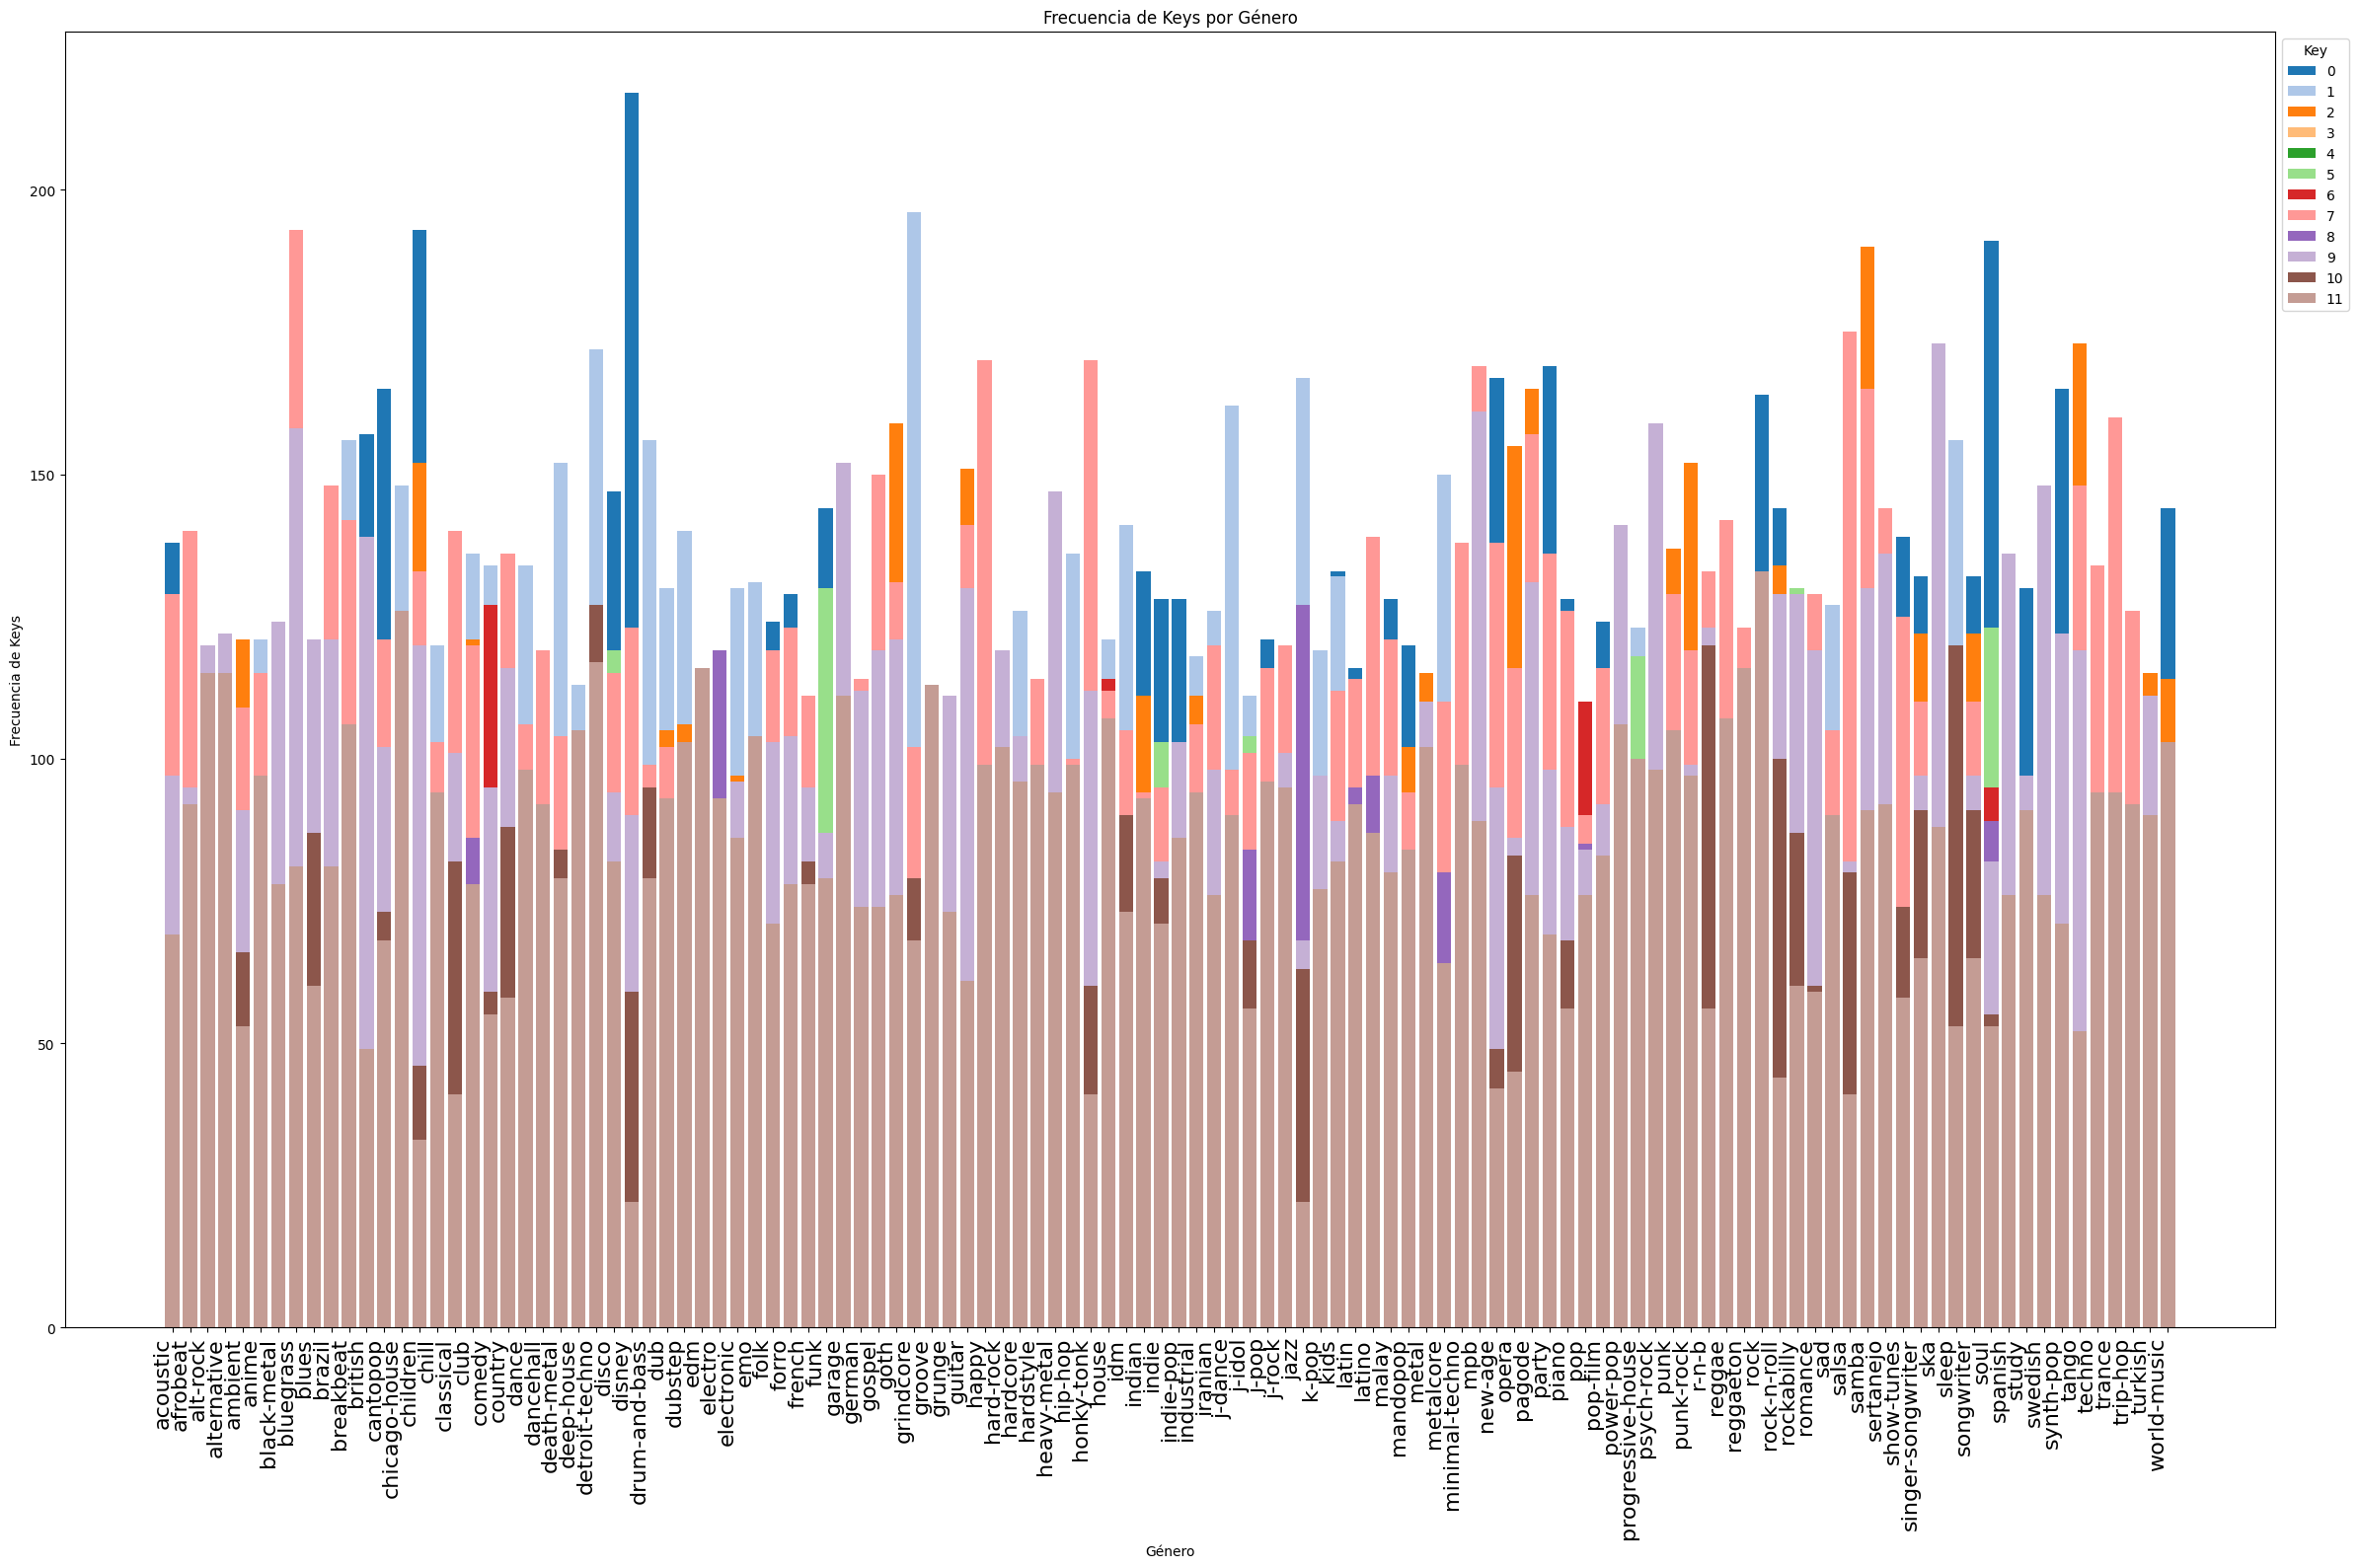

In [ ]:
# Agrupa los datos por género y cuenta la frecuencia de keys
key_counts_df = df.groupby('track_genre')['key'].value_counts().unstack(fill_value=0)

# Reorganiza el DataFrame para tener una fila por género
key_counts_df = key_counts_df.reset_index()

# Define los colores para cada barra en el gráfico
colors = plt.cm.tab20.colors[:len(key_counts_df.columns) - 1]

# Gráfico de frecuencia de keys por género
plt.figure(figsize=(24, 16))
for i, key in enumerate(key_counts_df.columns[1:]):  # Comienza desde la segunda columna (la primera es 'track_genre')
    plt.bar(key_counts_df['track_genre'], key_counts_df[key], label=key, color=colors[i])

plt.xlabel('Género')
plt.ylabel('Frecuencia de Keys')
plt.title('Frecuencia de Keys por Género')
plt.xticks(rotation=90, ha='right', fontsize=16)
plt.legend(title='Key', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Mode por género

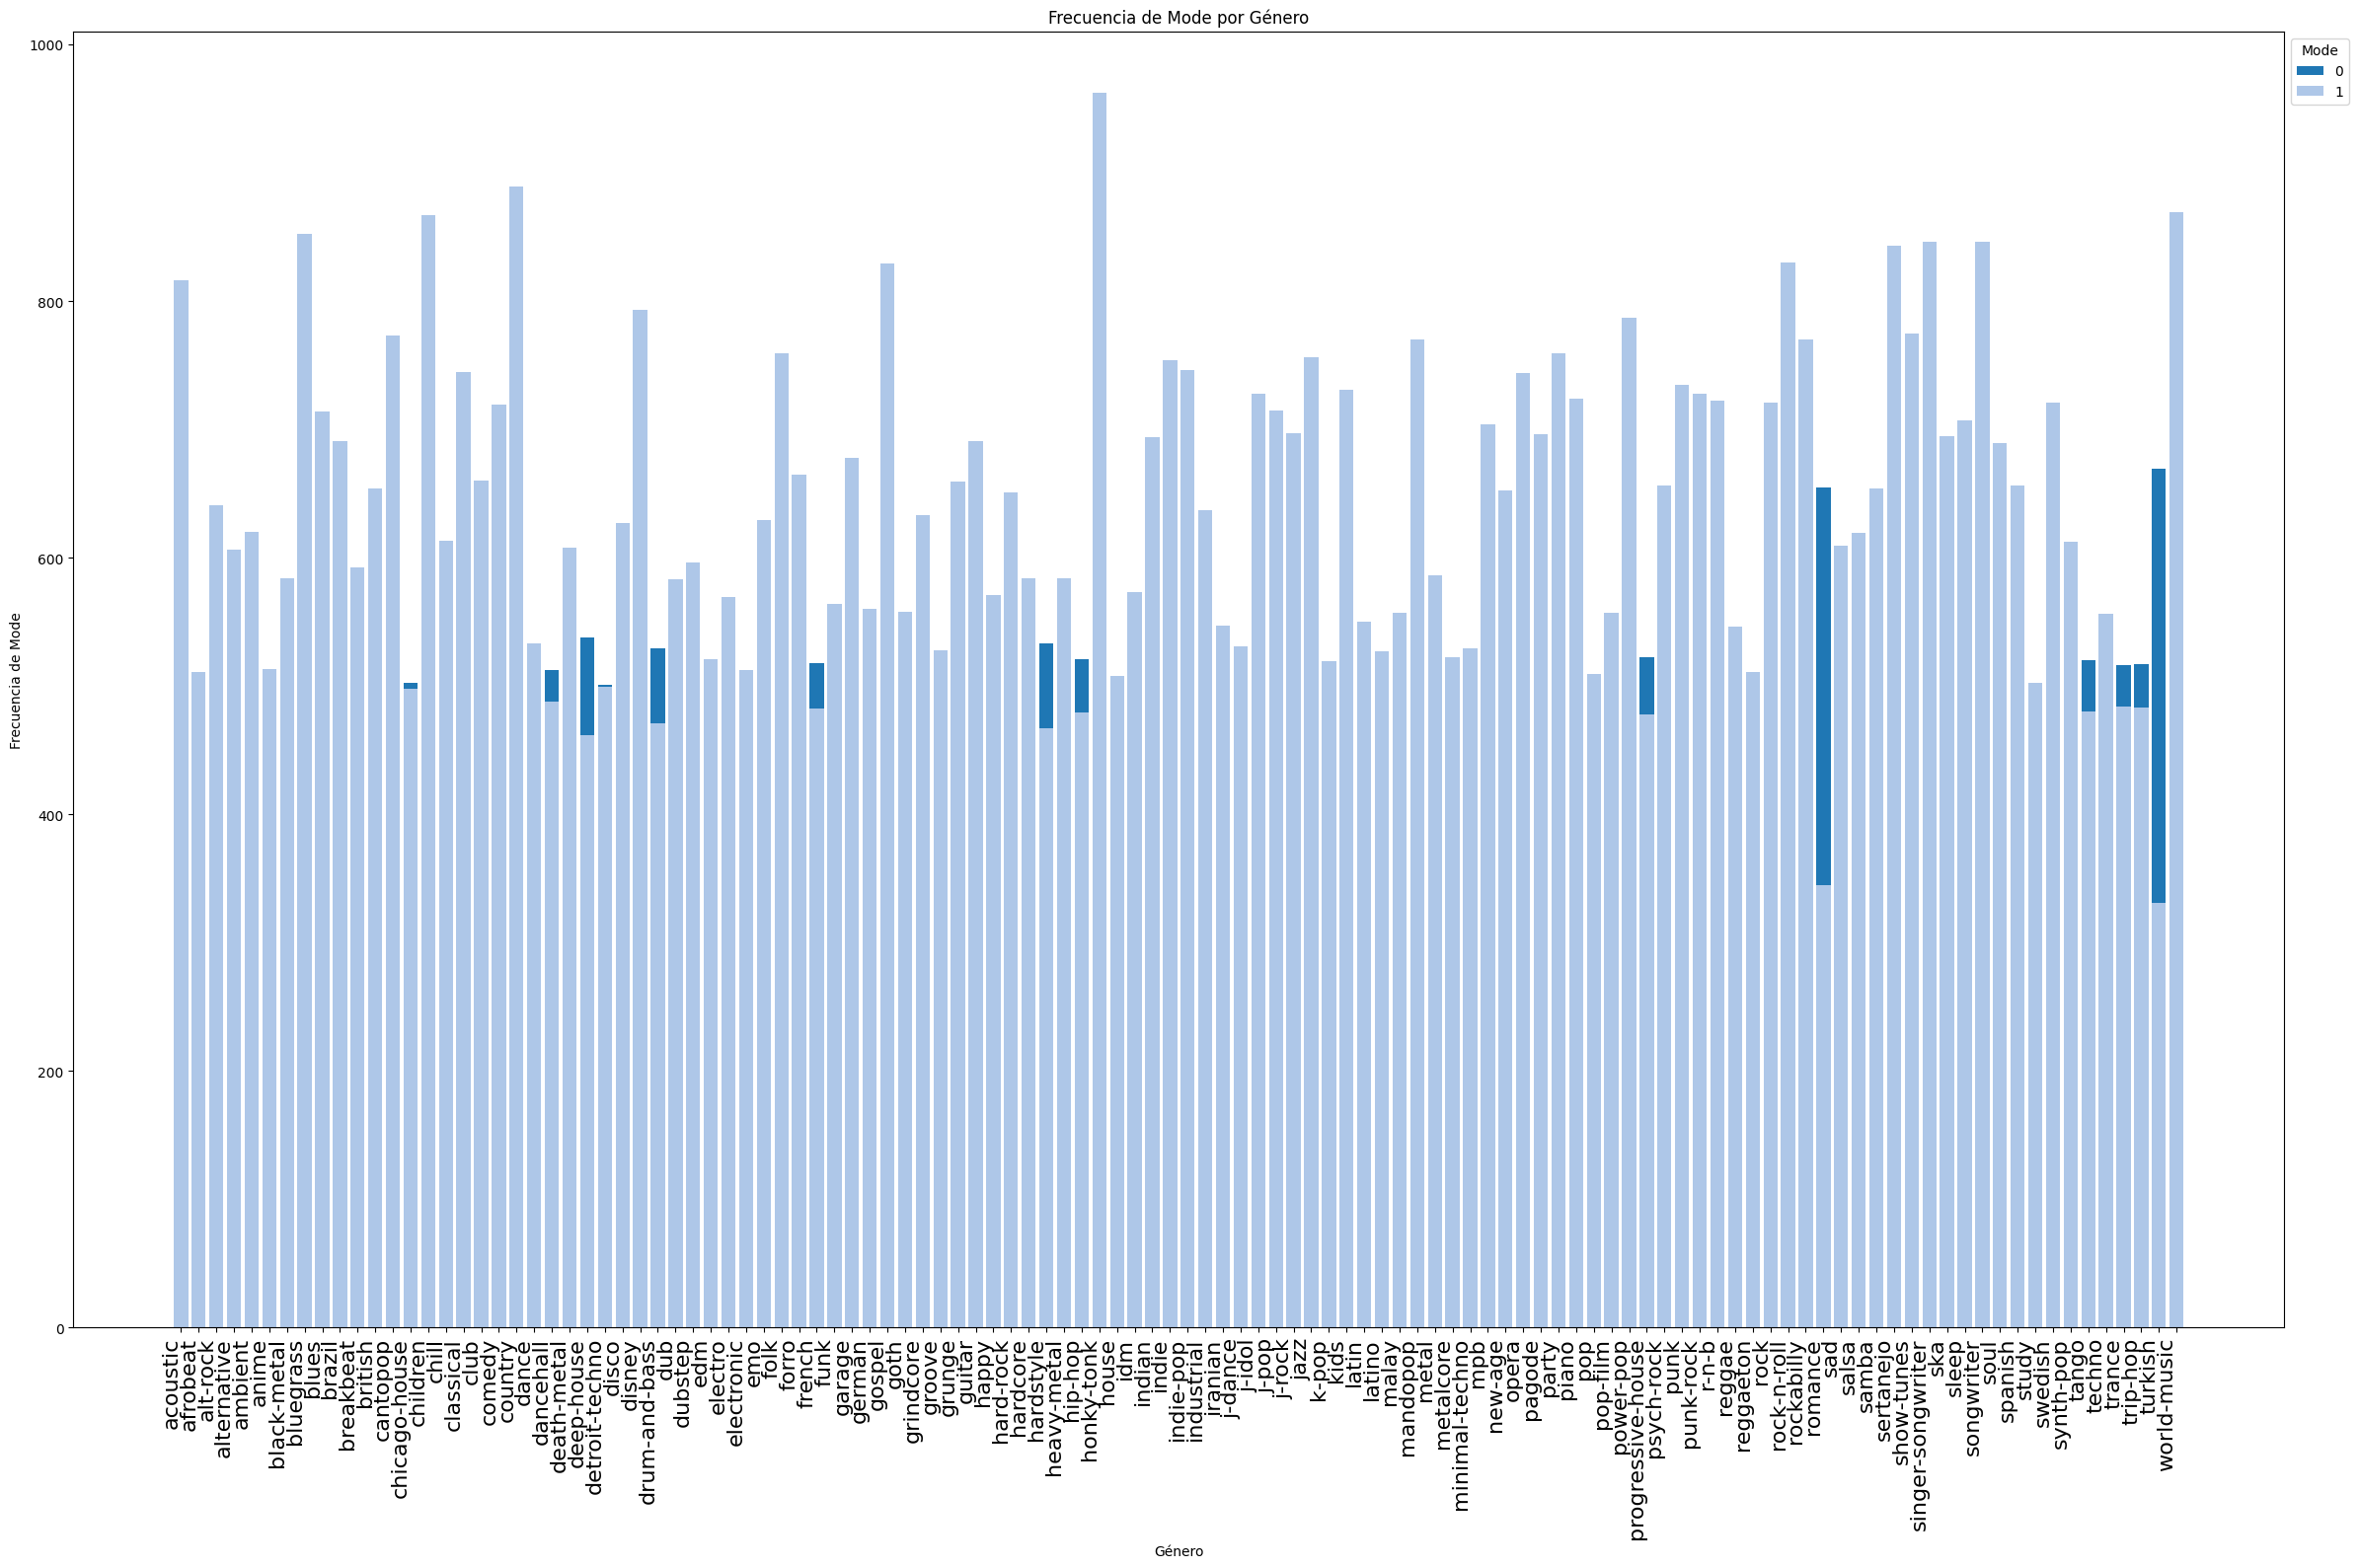

In [ ]:
# Agrupa los datos por género y cuenta la frecuencia de mode
mode_counts_df = df.groupby('track_genre')['mode'].value_counts().unstack(fill_value=0)

# Reorganiza el DataFrame para tener una fila por género
mode_counts_df = mode_counts_df.reset_index()

# Define los colores para cada barra en el gráfico
colors = plt.cm.tab20.colors[:len(mode_counts_df.columns) - 1]

# Gráfico de frecuencia de mode por género
plt.figure(figsize=(24, 16))
for i, mode in enumerate(mode_counts_df.columns[1:]):  # Comienza desde la segunda columna (la primera es 'track_genre')
    plt.bar(mode_counts_df['track_genre'], mode_counts_df[mode], label=mode, color=colors[i])

plt.xlabel('Género')
plt.ylabel('Frecuencia de Mode')
plt.title('Frecuencia de Mode por Género')
plt.xticks(rotation=90, ha='right', fontsize=16)
plt.legend(title='Mode', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Time_signature por género

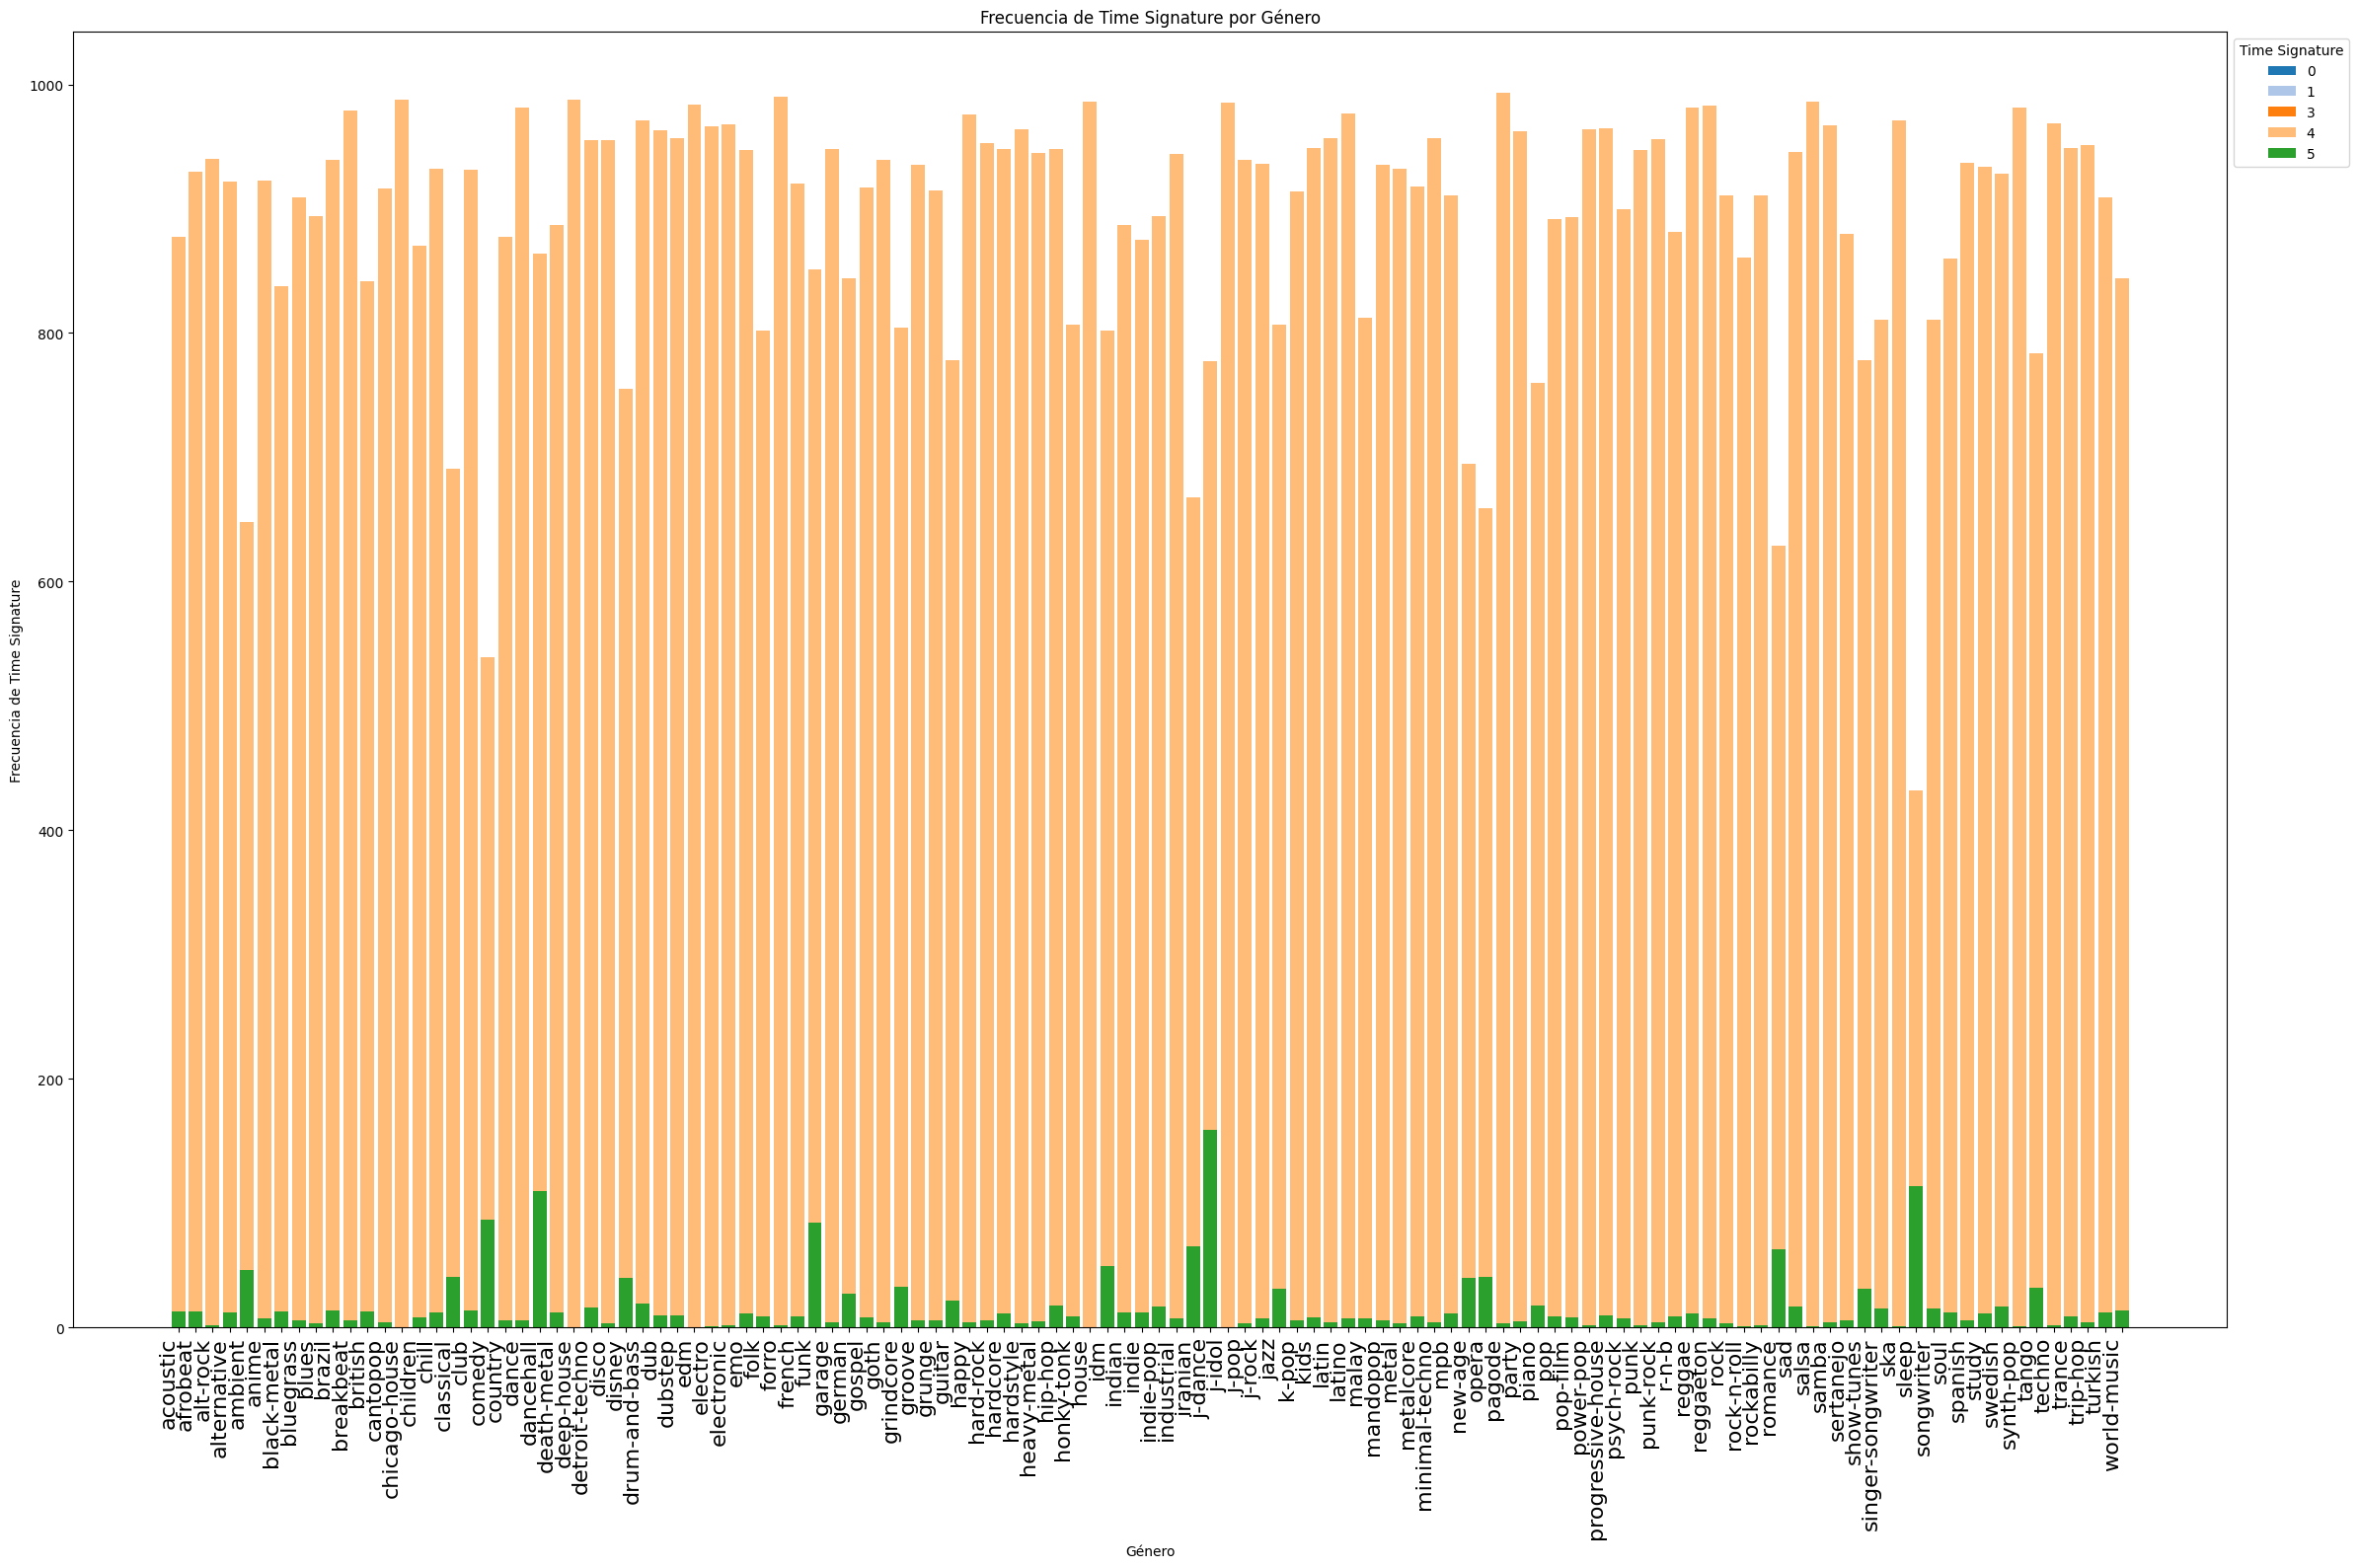

In [ ]:
# Agrupa los datos por género y cuenta la frecuencia de time_signature
time_signature_counts_df = df.groupby('track_genre')['time_signature'].value_counts().unstack(fill_value=0)

# Reorganiza el DataFrame para tener una fila por género
time_signature_counts_df = time_signature_counts_df.reset_index()

# Define los colores para cada barra en el gráfico
colors = plt.cm.tab20.colors[:len(time_signature_counts_df.columns) - 1]

# Gráfico de frecuencia de time_signature por género
plt.figure(figsize=(24, 16))
for i, time_signature in enumerate(time_signature_counts_df.columns[1:]):  # Comienza desde la segunda columna (la primera es 'track_genre')
    plt.bar(time_signature_counts_df['track_genre'], time_signature_counts_df[time_signature], label=time_signature, color=colors[i])

plt.xlabel('Género')
plt.ylabel('Frecuencia de Time Signature')
plt.title('Frecuencia de Time Signature por Género')
plt.xticks(rotation=90, ha='right', fontsize=16)
plt.legend(title='Time Signature', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df['time_signature'].value_counts()

time_signature
4    101843
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

## Conclusión Hito 1

En base a los gráficos de Mode y Time_signature podemos concluir que no son atributos que permitan clasificar a que género se pertenece.

Mode: La mayoría de los géneros tienen Mode tipo 1, lo que significa que no será un atributo musical que permita distinguir claramente a los géneros, a excepción de "sad" o "turkish"

Time_signature: Al igual que para Mode, la mayoría de los géneros tienen principalmente Time_signature 4, lo que significa que no será un atributo musical que permita distinguir al momento de clasificar por géneros.

Por otro lado, duration_ms es un atributo musical que permitirá distinguir con claridad algunos géneros, es por ello que para el Hito 2 se debe evaluar si dentro de los géneros con los que se trabajará se encuentran aquellos distinguibles por este atributo.

Para 'explicit' ocurre similar, hay géneros en que la mayoría de canciones son no explicitas, otros en los que hay igual cantidad de explicitas y no explicitas, y aquellos que tienen más explicitas que no explicitas. Por ello, será importante evaluar que tanto se sigue cumpliendo una vez que se reduzca la cantidad de géneros.

Los atributos utilizados en las matrices de correlación (danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo) mostrarón diferentes valores dependiendo de cada género. Por ello, se tendrán en cuenta al momento de clasificar géneros, y en caso de que el modelo no sea óptimo se evaluará eliminar los atributos menos relevantes para distinguir entre géneros, como es el caso de 'keys' en donde todos los géneros tienen gran cantidad de canciones con key igual a 11.

# Informe Hito 2

## 2. Propuesta metodológica experimental inicial:

Preguntas:

(1)  ¿Es posible predecir el género al que pertenece una canción de acuerdo a las variables musicales tales como el tempo, la valencia musical, cantidad de beats, entre otros?

**Metodología**:

Se tienen las opciones de clustering, regresión y clasificación, entre estas se  
optará por la clasificación, ya que nos permitirá responder directamente la pregunta sobre si es posible predecir el género al que pertenece una canción dados los atributos musicales, el tipo de clasificación a realizar será  multiclase (cada instancia pertenece a una sola y única clase/etiqueta).

La elección de este método radica en que se desea predecir una categoría, i.e. etiqueta/clase, en base a otros atributos de la instancia, esto puede resultar ventajoso en una clara interpretabilidad usando árboles de decisiones o SVM.

Por otro lado, la regresión no es útil ya que no se desea predecir un valor continuo sino que una etiqueta. Y en el caso de clustering tampoco es de utilidad, ya que solo nos sirve para observar, descubrir e identificar patrones mediante la agrupación de datos.

Las etapas consisten en:
- Preprocesamiento en los datos
- División en los conjuntos Test y Training
- Resampling para el conjunto de Training
- Implementación de modelos
- Evaluación de modelos
- Conclusión (Modelo seleccionado y argumentos)

**Preprocesamiento**

>Para darle respuesta a este problema primero se tendrá que realizar una reducción de géneros (columna track genre) del dataset basado en los 10 más populares, esto con tal de centrar el modelo clasificatorio en dichas etiquetas. Esta reducción se realizará juntando los géneros que se asemejan más en base al promedio de los atributos danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence  y tempo de las instancias pertenecientes a la etiqueta. Para ello se tendrá en cuenta métricas de distancia como distancia euclidiana , y distancia Manhattan junto con métricas de similitud como similitud coseno y coeficiente de correlación de Pearson.
<br> <br>
Además de la reducción de etiquetas, se eliminarán las columnas que no entreguen información relevante para la clasificación del género musical:
'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', ‘popularity’
Esto con el fin de reducir dimensiones y evitar que la maldición de la dimensionalidad afecte a las métricas y al modelo.
<br> <br>
Con respecto a las métricas de distancia y similitud, se aplicará una estandarización de los datos con el fin de mejorar la precisión de los cálculos.
<br> <br>
A priori similitud coseno nos será útil para determinar si la orientación de los vectores es similar, para la magnitud esta métrica pierde relevancia por lo que se utilizará el coeficiente de correlación de Pearson para ello,  esto nos permitirá observar tanto la orientación como la magnitud entre las relaciones de cada clase normalizando los valores.
<br> <br>
Por el lado de las métricas de distancia, tenemos que la distancia euclidiana proporciona una interpretación clara de la similitud (valor más bajo indica mayor similitud), sin embargo se puede ver afectada por la maldición de la dimensionalidad. Además, para compensar la sensibilidad de la distancia euclidiana a los outliers se implementará la distancia de Manhattan, proporcionando así un análisis más exhaustivo para determinar correctamente qué géneros se pueden combinar.

**División en los conjuntos Test y Training**

>Las particiones que se tomarán para cada conjunto serán 0.80 para Training y 0.20 para Testing. Esta decisión se basa en que cada clase contiene 1.000 instancias, y por ende una variedad de valores en los atributos musicales que debería permitirle al modelo generalizar correctamente. Estas particiones pueden ser actualizadas en la fase de Evaluación del modelo en caso de que el modelo no tenga la capacidad de generalizar correctamente, sin embargo, se realizarán técnicas de resampling, por lo que lo esperado es no modificar estas particiones y que esta técnica compense correctamente el balance de las clases..
Los atributos musicales corresponderán a las features (X), mientras que los géneros a las labels (Y), obteniéndose los conjuntos X_test, X_train, Y_test e Y_train.

**Resampling**

>Dentro de la metodología se menciona que se realizará una combinación de géneros, por lo que se espera que se pierda el equilibrio entre la cantidad de instancias por clase, en base a ello se realizará Random Oversampling en las clases minoritarias y Random Subsampling en aquellas mayoritarias. Con esto se espera que se recupere el equilibrio en el conjunto de datos, además de que la precisión del modelo aumente al reducir el sesgo con Subsampling y se reduzca el overfitting, obteniendo mejores métricas al evaluar el modelo.

**Implementación de modelos**

>Teniendo todo lo anterior listo nos enfocaremos en encontrar el clasificador que se adapte más a nuestro modelo. Para esto utilizaremos técnicas de aprendizaje supervisado, como lo son el modelo Gaussiano de Bayes en el que se tienen variables independientes y es eficaz al trabajar en problemas de multiclase, SVM pues es más potente, y debería poseer mayor precisión que bayes al maximizar el margen entre clases, además de ser robusto ante el overfitting y Gradient Boosting Machine ya que captura relaciones no lineales, tiene alta precisión en clasificación, permite el uso de funciones de pérdida, y también posee robustez ante overfitting. Además, dependiendo del modelo se evaluará la opción de utilizar la función GridSearchCV para complementar la búsqueda de los mejores hiperparametros.

**Evaluación de modelos**

>Las métricas a considerar serán recall, f1 y precision, con énfasis en precision ya que nos importa que las instancias clasificadas sean correctas. Es decir, queremos reducir los falsos positivos, de forma que las canciones etiquetadas para una clase, sean realmente de dicha clase.

**Conclusión**

>Se concluirá cuál fue el mejor modelo argumentando en base al desempeño y se dará feedback respecto a la metodología empleada.


(2) ¿Existen géneros que, pese a ser distintos, sus canciones tienen atributos similares? ¿Y viceversa?

**Metodología**:

Para responder esta pregunta se aplicarán técnicas de clustering debido a que se busca encontrar similitudes entre grupos de datos.

**Preprocesamiento**

>Para empezar se hará un preprocesamiento similar al del método 1, donde se eliminarán columnas que no aportan información relevante en relación con los atributos musicales, estás corresponden a las columnas “track_id “popularity”,  “album_name”, “artists”, “duration_ms” “track_name” y “Unnamed: 0” en este caso no se harán merge de géneros como en el método anterior, ya que de hacerlo podría verse afectado el resultado del método. Dado que los datos cuentan con muchos géneros musicales se elegirán 10 para hacer el proceso más simple, dichos géneros serán elegidos tal que podamos visualizar tanto casos donde canciones de distintos géneros no tienen características parecidas como cuando si.
<br> <br>
Además dado que los datos sobre las características musicales (valence, tempo, loudness, etc) están evaluados en rangos numéricos distintos, a estos se les aplicará un escalamiento tal que influyan de manera equitativa en el cálculo posterior de clusters. Por último se definirán los atributos relevantes para definir la similitud entre canciones, estos corresponden a “explicit”, “danceability”, “energy”, “key”, “loudness”, “mode”, “speechiness”, “acousticness”, “instrumentalness”, “liveness”, “valence”, “tempo” y “time_signature” dado que son los atributos que más caracterizan a una canción de otra en contexto del género al que pertenecen.

**Implementación y evaluación de los modelos**

>Las técnicas específicas de clustering que se utilizaran son K-means y DBSCAN, K-means nos servirá gracias a su simpleza mientras que DBSCAN nos permitirá manejar ruido de manera más certera. Dado que en nuestro caso sabemos las cantidades de clusters que queremos, que corresponde a la cantidad de géneros que estamos analizando para luego ver el solapamiento entre clusters, no se utilizarán técnicas como el método del codo o Silhoutte. Luego de aplicar ambos métodos estos serán comparados y nos quedaremos con el que dé mejores resultados, para evaluar su rendimiento en el caso de K-means se utilizará medirán los coeficientes de cohesión y separación de forma independiente para cada cluster ya que se trabajará con una cantidad reducida de estos, y para ambos métodos utilizaremos Matriz de similitud y Coeficiente de Silhoutte esto dado que ya que se utilizará DBSCAN la matriz de similitud puede no darnos las mejores conclusiones por sí sola.

**Visualización de clusters y conclusión**

>Finalmente para la visualización de los datos se creará una columna en el data frame que contenga el atributo labels_ para poder así visualizar en base a esto y los géneros. Se reducirán dimensiones utilizando técnicas de PCA para así poder contar con una mejor visualización de los resultados al ayudarnos a mantener una buena varianza y pocas dimensiones logrando obtener resultados visuales más fáciles de interpretar. Para poder ver la distribución de géneros en cada cluster utilizaremos gráficos de barra que nos mostrarán la proporción de canciones pertenecientes a cada género en cada cluster.


(3) ¿Los géneros con más canciones explícitas comparten características entre ellos?

**Metodología**:

Dado que la pregunta tiene un carácter similar a la anterior, es decir, se buscan similitudes entre grupos de datos, las técnicas a utilizar serán de clustering.

**Preprocesamiento**

>Al igual que en las preguntas anteriores, en el dataset original hay atributos que no son necesarios para responder la pregunta y que solo nos molestarán en el desarrollo de los modelos. En este caso, como se desean comparar características musicales para obtener una respuesta, las columnas que se eliminarán corresponden a aquellos atributos que no son imprescindibles al crear una canción como lo son “Unnamed: 0”, “track_id”, “artists”, “album_name”, “track_name”, “popularity” y “duration_ms”.
<br> <br>
En cuanto a los atributos que nos interesan, dado que los valores de “key”, “loudness”, “tempo” y “time_signature” se mueven por rangos diferentes a los demás, estos serán normalizados a rango entre 0 y 1, como la mayoría de atributos, para así evitar posibles errores en el entrenamiento del modelo. Por ejemplo, para el método K-means, al haber columnas con un rango muy alto puede que estas generen una dominancia por sobre las demás debido a que en el cálculo de la distancia el valor que más afecta será el mayor haciendo insignificante al atributo de mucho menor valor, lo cual también generaría un sesgo en nuestra respuesta.
<br> <br>
Por último, solo se escogerán solo las instancias del dataset cuyo “track_genre” este en los 10 géneros con más canciones explícitas de todo el dataset, ya que la pregunta hace mención justamente a este tipo de géneros, además, serán 10 los escogidos porque será más fácil trabajar con esa cantidad y generar un modelo más correcto aun teniendo una cantidad de géneros considerables.

**Implementación y evaluación de los modelos**

>Las técnicas específicas de clustering a utilizar serán las mencionadas en la pregunta 2, K-means por su simpleza y DBSCAN por su manejo de ruido, estas además se aplicarán de forma muy parecida a la pregunta 2, pues como se mencionó antes, ambas preguntas son de carácter similar, ya que el único cambio que existe entre cada pregunta es que en una se trabaja con 10 géneros cualquiera (pregunta 2) y en la otra son los 10 géneros con más canciones explícitas en el dataset (pregunta 3). Entonces luego de realizar todo el proceso mencionado en la pregunta 2 (es importante recordar que la cantidad de cluster que queremos, corresponde a la cantidad de géneros que estamos analizando para luego ver el solapamiento entre clusters).

**Conclusión**

>Finalmente, será gracias al gráfico de barras que podremos contestar la pregunta y ver como los cluster son formados por un género o por una mezcla de géneros haciendo ver que los géneros con más canciones explícitas en el dataset no comparten características o si lo hacen, respectivamente.




## 3. Resultado preliminar

### Importar librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
# Metricas de similitud
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
# Graficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Procesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Estandarizacion
from sklearn.preprocessing import MinMaxScaler # Normalizacion
from sklearn.decomposition import PCA
# Split
from sklearn.model_selection import train_test_split
# Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Models
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.ensemble import GradientBoostingClassifier # GradientBoost
from sklearn.naive_bayes import GaussianNB # Bayes
# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import cross_val_score
# GridSearch
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import confusion_matrix

### Pre-procesamiento

In [88]:
##### FILTRADO DE GÉNEROS POR POPULARIDAD #####

# Top 10 géneros más populares:
num_genres = 10
# 1. Promedio de popularidad por género
genre_popularity = df.groupby('track_genre')['popularity'].mean()
# 2. 50 género más populares
top_genres = genre_popularity.sort_values(ascending=False).head(num_genres).index
# 3. Creamos el nuevo dataframe
df_top_genres = df[df['track_genre'].isin(top_genres)].copy()

# Eliminar columnas que no aportan información relevante: Unnamed, track_id, artists, album_name, track_name
df_top_genres.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity'], axis='columns', inplace=True)

# Atributos musicales que se tendrán en cuenta
# Eliminados: time_signature, mode, duration_ms, keys, explicit
musical_attributes = df_top_genres[['track_genre', 'danceability', 'energy',
                         'loudness', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo']]

print(f"\n *** Se estan considerando los {num_genres} generos mas populares *** \n")
musical_attributes


 *** Se estan considerando los 10 generos mas populares *** 



track_genre  danceability  energy  loudness  speechiness  acousticness  \
5000        anime         0.541   0.846    -2.729       0.0551       0.01220   
5001        anime         0.436   0.934    -2.685       0.0507       0.00001   
5002        anime         0.577   0.941    -5.170       0.1050       0.00207   
5003        anime         0.508   0.889    -2.755       0.0862       0.04950   
5004        anime         0.691   0.773    -5.244       0.0494       0.01740   
...           ...           ...     ...       ...          ...           ...   
97995   sertanejo         0.769   0.718    -5.809       0.0241       0.23400   
97996   sertanejo         0.529   0.564    -4.713       0.0247       0.66800   
97997   sertanejo         0.690   0.926    -5.584       0.1830       0.33600   
97998   sertanejo         0.763   0.769    -6.245       0.0292       0.23500   
97999   sertanejo         0.771   0.722    -8.718       0.0327       0.13800   

       instrumentalness  liveness  valence    tempo  
5000           0.000149    0.1630    0.524  129.138  
5001           0.140000    0.3210    0.384   91.481  
5002           0.000003    0.0891    0.292  101.921  
5003           0.000000    0.0984    0.332  135.014  
5004           0.000451    0.1170    0.502  128.162  
...                 ...       ...      ...      ...  
97995          0.000000    0.1680    0.725  105.015  
97996          0.000000    0.1960    0.594  160.445  
97997          0.000000    0.0319    0.867  178.119  
97998          0.000041    0.0545    0.857   92.035  
97999          0.000000    0.1270    0.940  130.065  

[10000 rows x 10 columns]

##### Metricas de distancia y similitud

In [ ]:
# Separar los atributos musicales de los géneros
attributes = musical_attributes.drop('track_genre', axis=1)
genres = musical_attributes['track_genre']

# Estandarizar los datos
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Crear un DataFrame estandarizado y agregar la columna de géneros de nuevo
musical_attributes_scaled = pd.DataFrame(attributes_scaled, columns=attributes.columns)
musical_attributes_scaled['track_genre'] = genres.values

# Calcular el centroide de cada género mediante el promedio
genre_centroids = musical_attributes_scaled.groupby('track_genre').mean()

# Diccionarios para las distancias eucledianas y manhattan
dicc_euclidean = {}
dicc_manhattan = {}
# Limites
euclid_lim = 1
manhatt_lim = 2

# Diccionarios para similitud coseno y correlacion de Pearson
dicc_cosine = {}
dicc_pearson = {}
# Limites
cosine_lim = 0.7
pear_lim = 0.7
# Generos vistos
dicc_genres = {}

# Calcular las distancias entre todos los generos
for genre1 in genre_centroids.index:
    for genre2 in genre_centroids.index:
        if genre1 != genre2 and (genre2, genre1) not in dicc_genres:
          # Guardar que ya se vio el caso
          dicc_genres[(genre1, genre2)] = 1
          # Calculo de metricas
          distance_euclid = euclidean(genre_centroids.loc[genre1], genre_centroids.loc[genre2])
          distance_manhatt = cityblock(genre_centroids.loc[genre1], genre_centroids.loc[genre2])
          cosine_sim = cosine_similarity(genre_centroids.loc[genre1].values.reshape(1, -1), genre_centroids.loc[genre2].values.reshape(1, -1))[0][0]
          pearson_corr, _ = pearsonr(genre_centroids.loc[genre1], genre_centroids.loc[genre2])
          # Distancia euclediana
          if 0 < distance_euclid < euclid_lim:
            dicc_euclidean[(genre1, genre2)] = distance_euclid
          # Distancia manhattan
          if 0 < distance_manhatt < manhatt_lim:
            dicc_manhattan[(genre1, genre2)] = distance_manhatt
          # Similitud coseno
          if cosine_lim <= cosine_sim:
                dicc_cosine[(genre1, genre2)] = cosine_sim
          # Correlacion de Pearson
          if pear_lim <= pearson_corr:
                dicc_pearson[(genre1, genre2)] = pearson_corr
# Mostrar las distancias calculadas
for pair, distance in dicc_euclidean.items():
    print(f"Distancia euclidiana entre {pair[0]} y {pair[1]}: {distance}")
print("\n")

for pair, distance in dicc_manhattan.items():
    print(f"Distancia manhattan entre {pair[0]} y {pair[1]}: {distance}")
print("\n")

for pair, distance in dicc_cosine.items():
    print(f"Similitud Coseno entre {pair[0]} y {pair[1]}: {distance}")
print("\n")

for pair, distance in dicc_pearson.items():
    print(f"Correlación de Pearson entre {pair[0]} y {pair[1]}: {distance}")
print("\n")

Distancia euclidiana entre chill y sad: 0.5848205433948878
Distancia euclidiana entre emo y k-pop: 0.7863926991097293
Distancia euclidiana entre emo y pop: 0.7930656593261709
Distancia euclidiana entre indian y pop: 0.8002791474779437
Distancia euclidiana entre indian y pop-film: 0.48516890326023265
Distancia euclidiana entre k-pop y pop: 0.47668062492395546
Distancia euclidiana entre k-pop y pop-film: 0.8217132662131349
Distancia euclidiana entre pop y pop-film: 0.5148214329997334


Distancia manhattan entre chill y sad: 1.4733272367327162
Distancia manhattan entre emo y k-pop: 1.885545813332767
Distancia manhattan entre indian y pop-film: 1.2062134589628986
Distancia manhattan entre k-pop y pop: 1.1950155609940454
Distancia manhattan entre pop y pop-film: 1.2373181145239005


Similitud Coseno entre chill y sad: 0.9227687466640525
Similitud Coseno entre indian y pop-film: 0.7156395644728744
Similitud Coseno entre k-pop y pop: 0.760057998619438


Correlación de Pearson entre chill y sa

##### Dataset para el modelo

In [87]:
# DATAFRAME ESTANDARIZADO

# Definición: Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.

##### FILTRADO DE GÉNEROS POR POPULARIDAD #####

# Top 10 géneros más populares:
num_genres = 10
# 1. Promedio de popularidad por género
genre_popularity = df.groupby('track_genre')['popularity'].mean()
# 2. Género más populares
top_genres = genre_popularity.sort_values(ascending=False).head(num_genres).index
# 3. Creamos el nuevo dataframe
df_top_genres = df[df['track_genre'].isin(top_genres)].copy()

# Eliminar columnas que no aportan información relevante: Unnamed, track_id, artists, album_name, track_name
df_top_genres.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity'], axis = 'columns', inplace=True)

# Atributos musicales que se tendrán en cuenta
# Eliminados: time_signature, mode, duration_ms, keys, explicit
musical_attributes = df_top_genres[['track_genre', 'danceability', 'energy',
                         'loudness', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo']]

# Separar los atributos musicales de los géneros
attributes = musical_attributes.drop('track_genre', axis=1)
genres = musical_attributes['track_genre']

# Estandarizar los datos
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Crear un DataFrame estandarizado y agregar la columna de géneros de nuevo
df_model = pd.DataFrame(attributes_scaled, columns=attributes.columns)
df_model['track_genre'] = genres.values

# Merge:
# Combinar con pop
df_model['track_genre'] = df_model['track_genre'].replace('k-pop', 'pop')
df_model['track_genre'] = df_model['track_genre'].replace('indian', 'pop')
df_model['track_genre'] = df_model['track_genre'].replace('pop-film', 'pop')
# Combinar sad con chill
df_model['track_genre'] = df_model['track_genre'].replace('sad', 'chill')

df_model

danceability    energy  loudness  speechiness  acousticness  \
0        -0.400210  1.020159  1.264896    -0.354629     -1.105335   
1        -1.100814  1.417516  1.276165    -0.405292     -1.144952   
2        -0.160003  1.449123  0.639754     0.219933     -1.138258   
3        -0.620400  1.214322  1.258238     0.003465     -0.984107   
4         0.600653  0.690533  0.620802    -0.420260     -1.088434   
...            ...       ...       ...          ...           ...   
9995      1.121102  0.442185  0.476105    -0.711571     -0.384470   
9996     -0.480279 -0.253190  0.756792    -0.704663      1.026059   
9997      0.593981  1.381392  0.533728     1.118047     -0.052963   
9998      1.081067  0.672471  0.364445    -0.652848     -0.381220   
9999      1.134447  0.460246 -0.268893    -0.612548     -0.696476   

      instrumentalness  liveness   valence     tempo track_genre  
0            -0.316035 -0.248729  0.209662  0.251332       anime  
1             0.334837  0.603849 -0.423663 -0.988431       anime  
2            -0.316713 -0.647498 -0.839848 -0.644720       anime  
3            -0.316728 -0.597314 -0.658898  0.444785       anime  
4            -0.314629 -0.496947  0.110140  0.219200       anime  
...                ...       ...       ...       ...         ...  
9995         -0.316728 -0.221748  1.118936 -0.542858   sertanejo  
9996         -0.316728 -0.070659  0.526325  1.282038   sertanejo  
9997         -0.316728 -0.956152  1.761309  1.863910   sertanejo  
9998         -0.316537 -0.834201  1.716071 -0.970192   sertanejo  
9999         -0.316728 -0.442987  2.091543  0.281851   sertanejo  

[10000 rows x 10 columns]

In [ ]:
# Géneros
df_model['track_genre'].unique()

array(['anime', 'chill', 'emo', 'grunge', 'pop', 'sertanejo'],
      dtype=object)

### Crear modelos

In [ ]:
# Codigo General para el Split

### SPLIT ###
# Separar las características y la variable objetivo
X = df_model.drop(columns='track_genre', axis=1)
y = df_model['track_genre']

## 4.000 -> Pop
## 2.000 -> Chill
## 1.000 -> grunge, sertanejo, emo, anime

# Training = 0.80
# Pop -> 3200
# Chill -> 1800
# Los demas -> 800

# Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39, stratify=y)

# Agrupar los datos por género y contar la cantidad de canciones en cada grupo
songs_per_genre = df_model.groupby('track_genre').size()

# Imprimir la cantidad de canciones por género en X_train
print("Cantidad de canciones por género en df_model:")
print(songs_per_genre)

# Definir las clases para subsampling y oversampling para los conjuntos de Training
over_classes = ['grunge', 'sertanejo', 'emo', 'anime', 'chill']
sub_class = ['pop']

# Configuración deseada de Random Oversampling y Undersampling
target_samples_over = 2000
target_samples_sub = 2000
ros = RandomOverSampler(sampling_strategy={cls: target_samples_over for cls in over_classes})
rus = RandomUnderSampler(sampling_strategy={cls: target_samples_sub for cls in sub_class})

# Aplicar Random Oversampling y Undersampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Imprimir resultado de X_train como resampled
print('\n Valores finales de X_resampled que será usado para el entrenamiento')
print(y_resampled.value_counts())

Cantidad de canciones por género en df_model:
track_genre
anime        1000
chill        2000
emo          1000
grunge       1000
pop          4000
sertanejo    1000
dtype: int64

 Valores finales de X_resampled que será usado para el entrenamiento
track_genre
anime        2000
chill        2000
emo          2000
grunge       2000
pop          2000
sertanejo    2000
Name: count, dtype: int64


#### Support Vector Machine (SVM)

In [ ]:
### Modelo Base SVM ###

# Instanciar el modelo
nb_clf = SVC()  # kernel='rbf'

# Entrenar el modelo
nb_clf.fit(X_resampled, y_resampled)

# Predecir
y_pred = nb_clf.predict(X_test)

# Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anime       0.46      0.50      0.48       200
       chill       0.59      0.63      0.61       400
         emo       0.28      0.21      0.24       200
      grunge       0.47      0.77      0.58       200
         pop       0.75      0.58      0.66       800
   sertanejo       0.60      0.76      0.67       200

    accuracy                           0.58      2000
   macro avg       0.52      0.57      0.54      2000
weighted avg       0.60      0.58      0.58      2000



In [ ]:
### Modelo GridSearch SVM ###
# Parámetros a explorar mediante GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'linear']}

# Instanciar el modelo
svm_clf = SVC()

# Instanciar GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, n_jobs=-1)

# Entrenar GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo SVM con los mejores hiperparámetros encontrados
best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train, y_train)

# Predecir con el modelo mejorado
y_pred_best = best_svm_clf.predict(X_test)

# Resultados del modelo mejorado
print("Resultados del modelo SVM con mejores hiperparámetros:")
print(classification_report(y_test, y_pred_best))

Mejores hiperparámetros encontrados: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Resultados del modelo SVM con mejores hiperparámetros:
              precision    recall  f1-score   support

       anime       0.60      0.42      0.49       200
       chill       0.66      0.53      0.59       400
         emo       0.46      0.11      0.18       200
      grunge       0.57      0.69      0.62       200
         pop       0.63      0.88      0.74       800
   sertanejo       0.80      0.56      0.66       200

    accuracy                           0.64      2000
   macro avg       0.62      0.53      0.55      2000
weighted avg       0.63      0.64      0.61      2000



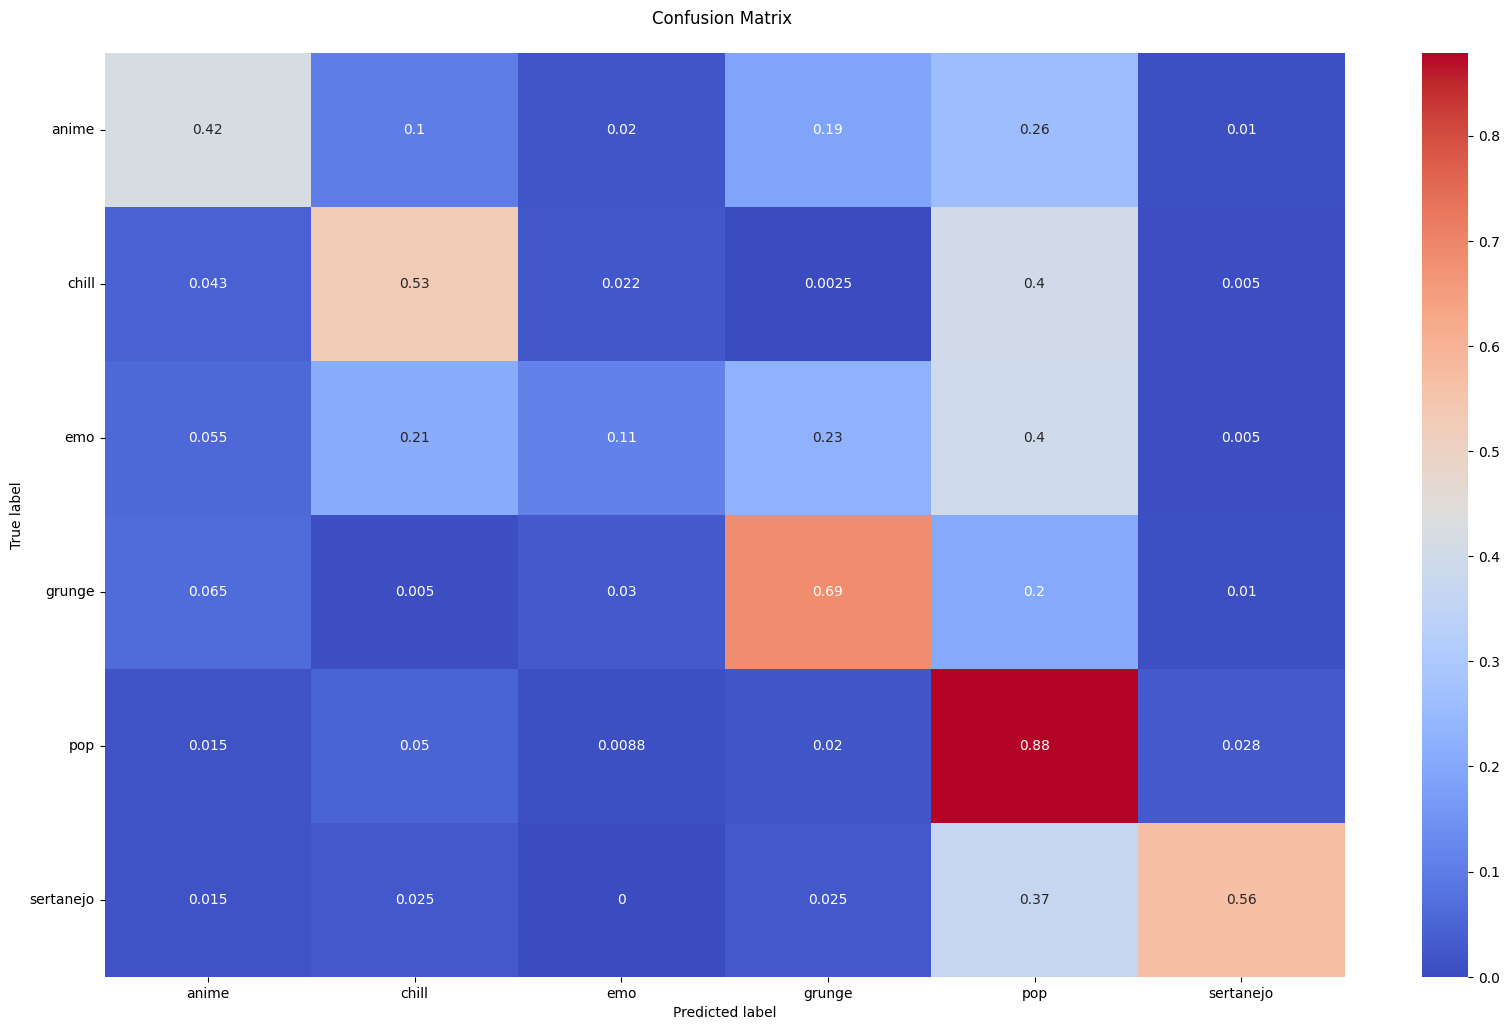

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best, normalize='true') # calcula valores de la matriz de confusión

fig, ax = plt.subplots()

labels = np.array(['anime', 'chill', 'emo', 'grunge', 'pop', 'sertanejo'])

ax = sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels) # transforma la matriz en un heatmap para su visualización

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.xticks()
plt.yticks(rotation=0)

plt.show()

#### GradientBoost

In [ ]:
# Intanciamos el modelo
GB_clf = GradientBoostingClassifier()
# Entrenar el modelo
GB_clf.fit(X_resampled, y_resampled)


GradientBoostingClassifier()

In [ ]:
# Predecir
y_pred = GB_clf.predict(X_test)
# Resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anime       0.46      0.50      0.48       200
       chill       0.59      0.63      0.61       400
         emo       0.28      0.21      0.24       200
      grunge       0.47      0.77      0.58       200
         pop       0.75      0.58      0.66       800
   sertanejo       0.60      0.76      0.67       200

    accuracy                           0.58      2000
   macro avg       0.52      0.57      0.54      2000
weighted avg       0.60      0.58      0.58      2000



In [90]:
# Definimos semilla
np.random.seed(7)

# Set scoring metric
score = make_scorer(precision_score, average='macro')

# Configure tuned_parameters
# Los parametros de GBC son loss, learning_rate, n_estimators, subsample,
# criterion, min_samples_split, min_samples_leaf, max_depth, max_features

tuned_parameters = {
    "learning_rate": [0.1],
    "n_estimators": [10, 100],
    "max_depth": [3, 8],
}

# Construcción del clf para gridsearch
clf_GB = GridSearchCV(
        GradientBoostingClassifier(),
        param_grid=tuned_parameters,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
)

# Entrenar clf
clf_GB.fit(X_resampled, y_resampled)

print("Mejor combinación de parámetros:")
print(clf_GB.best_params_)

y_pred = clf_GB.predict(X_test)
print(classification_report(y_test, y_pred))

Mejor combinación de parámetros:
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
              precision    recall  f1-score   support

       anime       0.52      0.54      0.53       200
       chill       0.55      0.65      0.60       400
         emo       0.29      0.24      0.26       200
      grunge       0.67      0.70      0.69       200
         pop       0.78      0.72      0.75       800
   sertanejo       0.72      0.74      0.73       200

    accuracy                           0.64      2000
   macro avg       0.59      0.60      0.59      2000
weighted avg       0.64      0.64      0.64      2000



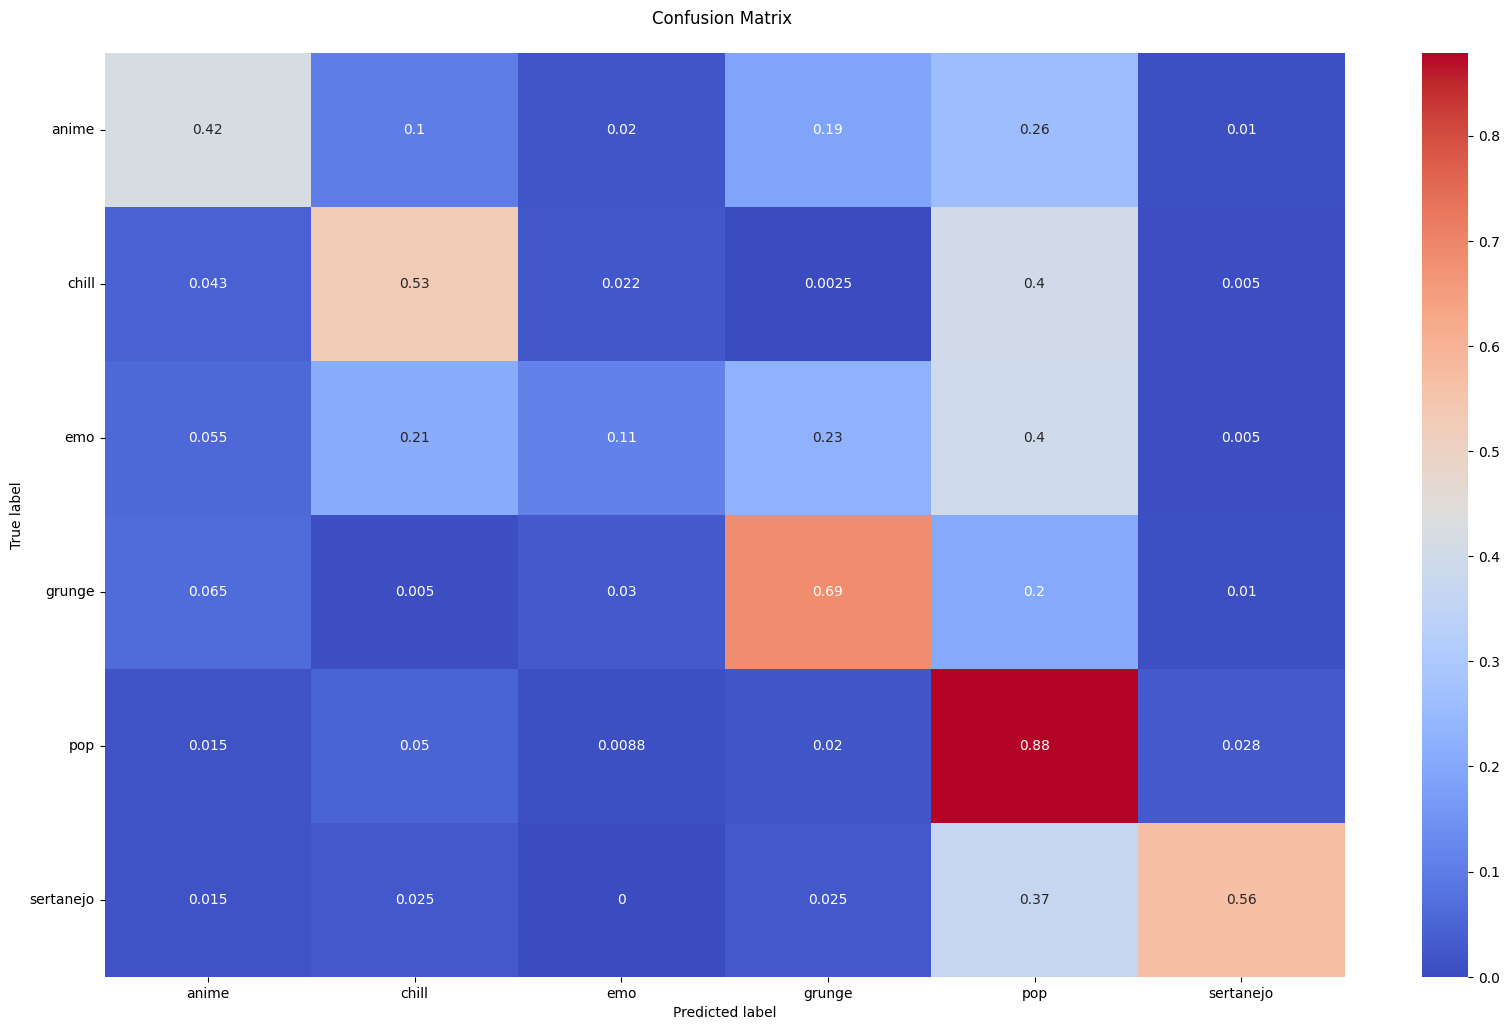

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best, normalize='true') # calcula valores de la matriz de confusión

fig, ax = plt.subplots()

labels = np.array(['anime', 'chill', 'emo', 'grunge', 'pop', 'sertanejo'])

ax = sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels) # transforma la matriz en un heatmap para su visualización

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.xticks()
plt.yticks(rotation=0)

plt.show()

In [92]:
# Intento de hacer cross validation
from sklearn.model_selection import cross_validate

clf_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=8, n_estimators=100)

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

# Configurando validación cruzada
cv_results = cross_validate(clf_GB, X, y, cv=5, scoring=scoring)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:   ', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score: ', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary: ', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.5911450125821642
Promedio Recall:    0.5537500000000001
Promedio F1-score:  0.565136144507209
Promedio Accucary:  0.6327


#### Bayes

In [93]:
# Modelo Bayesiano
clf = GaussianNB()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anime       0.45      0.23      0.30       200
       chill       0.55      0.41      0.47       400
         emo       0.23      0.16      0.19       200
      grunge       0.48      0.58      0.53       200
         pop       0.58      0.19      0.28       800
   sertanejo       0.19      0.92      0.32       200

    accuracy                           0.35      2000
   macro avg       0.41      0.42      0.35      2000
weighted avg       0.48      0.35      0.34      2000



In [94]:
##Cuadricula de parámetros
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

GridSearchCV
clf = GridSearchCV(estimator=GaussianNB(),
                   param_grid=param_grid,
                   cv=5,
                   n_jobs=-1,
                   scoring='accuracy')

clf.fit(X_train, y_train)

print("Mejores parámetros encontrados por GridSearchCV:")
print(clf.best_params_)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


Mejores parámetros encontrados por GridSearchCV:
{'var_smoothing': 0.2848035868435802}
              precision    recall  f1-score   support

       anime       0.69      0.20      0.31       200
       chill       0.58      0.37      0.45       400
         emo       0.31      0.09      0.13       200
      grunge       0.45      0.69      0.54       200
         pop       0.56      0.82      0.67       800
   sertanejo       0.70      0.56      0.62       200

    accuracy                           0.56      2000
   macro avg       0.55      0.45      0.46      2000
weighted avg       0.56      0.56      0.52      2000



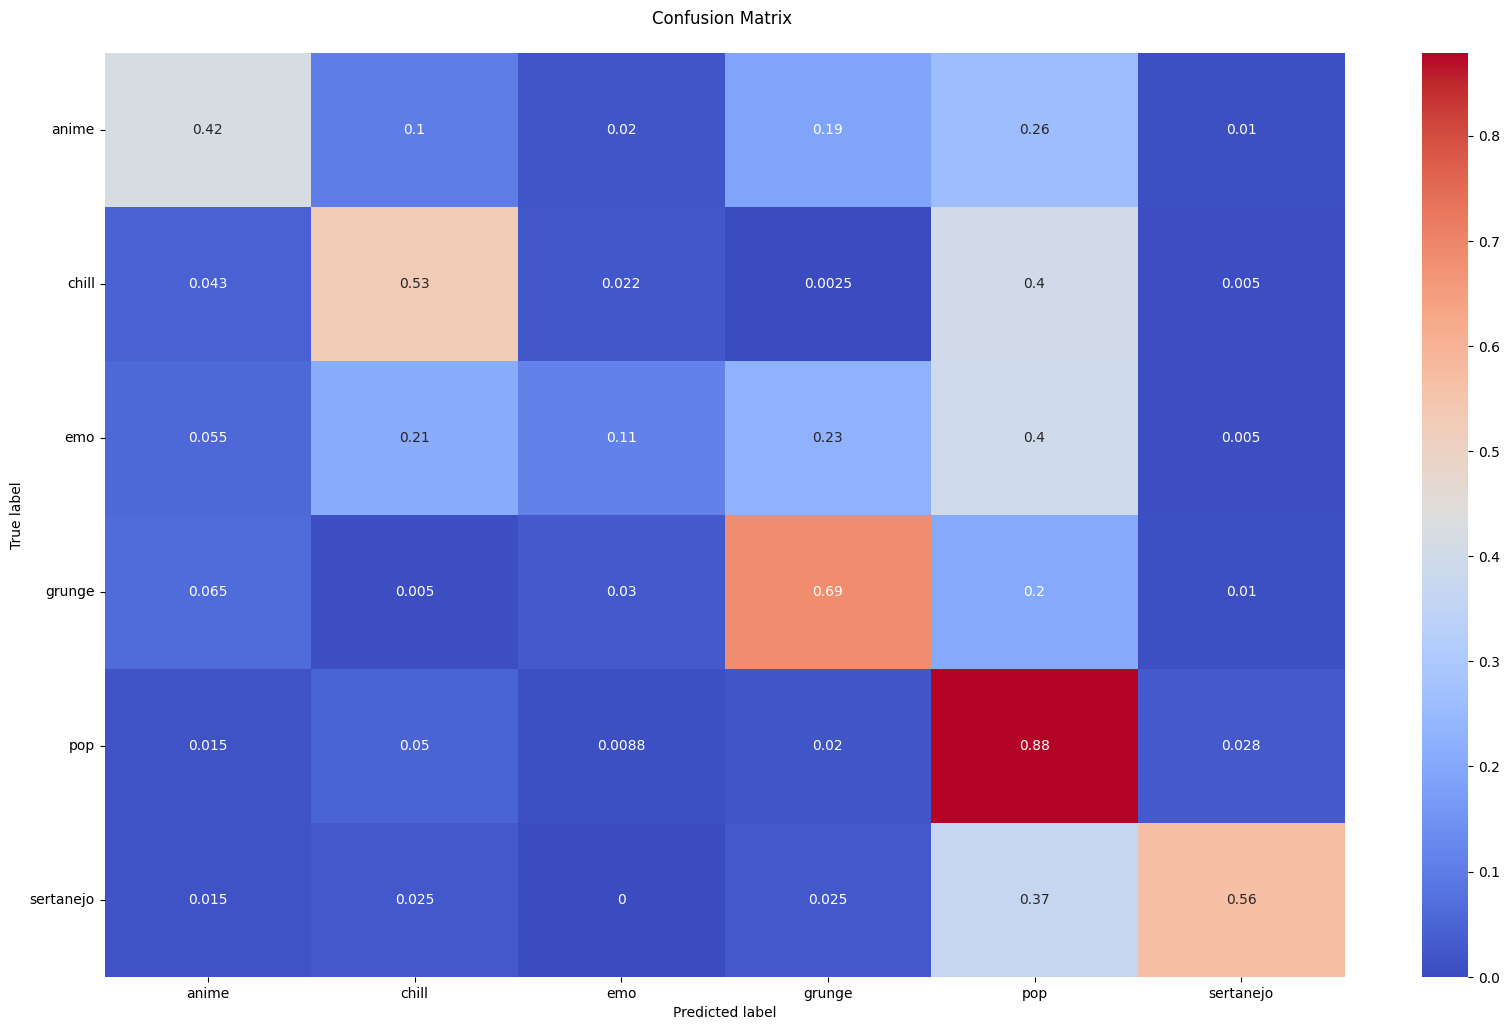

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best, normalize='true') # calcula valores de la matriz de confusión

fig, ax = plt.subplots()

labels = np.array(['anime', 'chill', 'emo', 'grunge', 'pop', 'sertanejo'])

ax = sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels) # transforma la matriz en un heatmap para su visualización

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.xticks()
plt.yticks(rotation=0)

plt.show()

### Conclusión

>Inicialmente se consideró trabajar con las 50 clases más populares, pero debido a la complejidad y mal desempeño del modelo, se redujo al top 10. Manteniendo el merge de clases similares y técnicas de sampling. Una vez realizado esto, se trabajó con las 6 clases restantes, notando una inmediata mejoría en el rendimiento del modelo, concluyendo que el reducir la cantidad de clases, ayuda significativamente el desempeño y complejidad de un modelo.

>Dentro del pre-procesamiento se construyeron tres dataframes, uno con los datos originales procesados, otro agregando estandarización y otro agregando normalización. A partir de los resultados se concluyó que la estandarización fue la técnica que más ayudó al desempeño de los modelos, permitiendoles mejorar cerca de 0.20 puntos en accuracy y hasta 0.43 puntos en la precision macro avg.

>Luego, una vez entrenados y testeados los modelos, se analizaron los resultados de las métricas obtenidas, en donde se obtuvo que:
<br> <br>
> **SVM Model**: <br>
> El modelo base tuvo un desempeño de 0.52 en precision (macro avg) y 0.58 en accuracy. Mientras que al utilizar GridSearch se obtuvo 0.62 en precision (macro avg) y 0.64 en accuracy, mejorando en comparación al modelo base con los hiperparámetros C = 10, gamma = 0.1 y kernel = rbf y una Cross Validation=5.
<br> <br>
>**Gradient Boost Model**: <br>
> El modelo base tuvo un desempeño de 0.52 en precision (macro avg) y 0.58 en accuracy. Mientras que al utilizar GridSearch se obtuvo 0.59 en precision (macro avg) y 0.64 en accuracy, mejorando en comparación al modelo base con los hiperparámetros max_depth=8 y n_estimators=100, utilizando una Cross Validation=3.
<br>
>Posteriormente se entreno con una Cross Validation de 5 y learning rate de 0.3, obteniendo 0.59 en precision (macro avg) y 0.63 en accuracy, no mejorando así al incrementar la Cross Validation y el learning rate.
<br> <br>
**Bayes Model**: <br>
> El modelo base tuvo un desempeño de 0.41 en precision (macro avg) y 0.35 en accuracy. Mientras que al utilizar GridSearch se obtuvo 0.55 en precision (macro avg) y 0.56 en accuracy. Mejorando en comparación al modelo base con los parámetros de var_smoothing=0.284 y Cross Validation = 5.

>Finalmente, en base a los resultados obtenidos, el mejor modelo realizado fue SVM, empatando con Gradient Boost en accuracy pero siendo superior en precision, métrica a la que damos prioridad de acuerdo a lo explicado en la metodología. Por otra parte, el modelo que peor se desempeño fue el de Bayes, levemente por debajo de los otros dos. Además, se concluyó efectivamente que las técnicas de pre-procesamiento, sampling y búsqueda de hiperparámetros mediante GridSearch fueron efectivas y permitieron mejorar los modelos.

# Contribución miembros Hito 2

| Tarea                                    | Encargado/a           |
|------------------------------------------|-----------------------|
|        Trabajo en la Presentación        |    Scarlett Plaza     |
|                                          |    Vicente Thiele     |
| Trabajo en el Informe                    |                       |
|                                          |    Javiera Romero     |
|                                          |    Patricio Espinoza  |
|                                          |    Rodrigo Díaz       |
| Mejorar Hito 1                           |                       |
|ㅤㅤㅤㅤReducción de matrices de correlación | |
|                                          |    Javiera Romero     |
|ㅤㅤㅤㅤMatriz de correlación para géneros y general| |
|                                          |    Javiera Romero     |
|ㅤㅤㅤㅤMejorar fase exploratoria | |
|                                          |    Patricio Espinoza  |
|ㅤㅤㅤㅤConclusión Hito 1 | |
|                                          |    Patricio Espinoza  |
| Propuestas de las metodologías 1, 2 y 3 | |
|                                          |    Javiera Romero     |
|                                          |    Patricio Espinoza  |
|                                          |    Rodrigo Díaz       |
|                                          |    Scarlett Plaza     |
|                                          |    Vicente Thiele     |
| Preprocesamiento | |
|                                          |    Patricio Espinoza  |
|                                          |    Vicente Thiele     |
| Train/Test split & Resampling: Bayes | |
|                                          |    Vicente Thiele     |
|                                          |    Rodrigo Díaz       |
| Train/Test split & Resampling: SVM | |
|                                          |    Patricio Espinoza  |
|                                          |    Javiera Romero     |
| Train/Test split & Resampling: GradientBoost | |
|                                          |    Scarlett Plaza     |
| Implementación modelo y métricas de evaluación: Bayes | |
|                                          |    Vicente Thiele     |
|                                          |    Rodrigo Díaz       |
| Implementación modelo y métricas de evaluación: SVM | |
|                                          |    Patricio Espinoza  |
|                                          |    Javiera Romero     |
| Implementación modelo y métricas de evaluación: GradientBoost | |
|                                          |    Scarlett Plaza     |
| Conclusión Hito 2 | |
|                                          |    Patricio Espinoza  |